# Assignement 1
## Digital Musicology

@authors: Joris Monnet, Xingyu Pan, Yutaka Osaki, Yiwei Liu

Due Date: 27/03/2024

In [2]:
# Imports 
import matplotlib.pyplot as plt
import music21
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import entropy
import warnings
warnings.filterwarnings("ignore") # Ignore warnings from music21

## Task A: Timing Function

In [1]:
from task_a.task_a_plotter import plot_timing, plot_timing_for_one_piece
from task_a.timing_function import timing
from task_a.timing_for_one_piece import get_tempo_map, get_average_timing_one_piece

### 1. Timing Function for a single piece

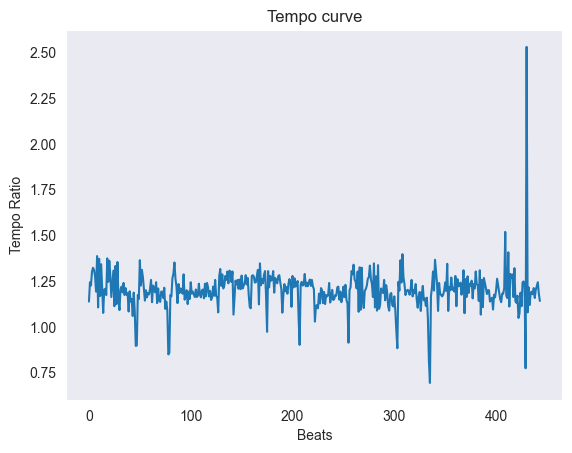

In [3]:
average = get_average_timing_one_piece('asap-dataset/Mozart/Piano_Sonatas/11-3')
plot_timing_for_one_piece(get_tempo_map(average))

### 2. Timing Function for multiple pieces
#### a. A single composer

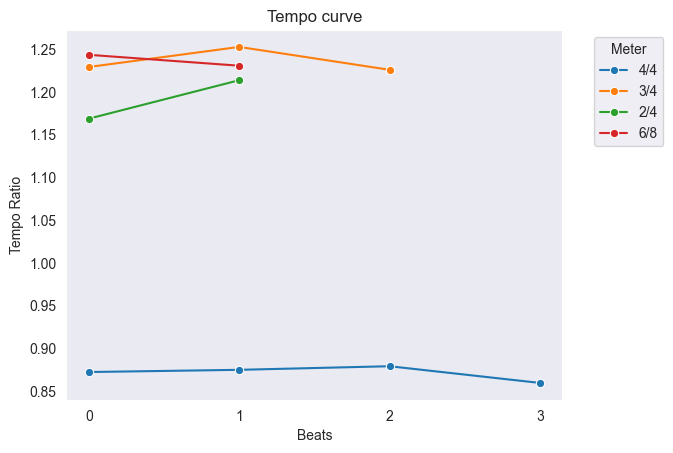

In [8]:
plot_timing(timing('asap-dataset/Mozart/Piano_Sonatas/'))

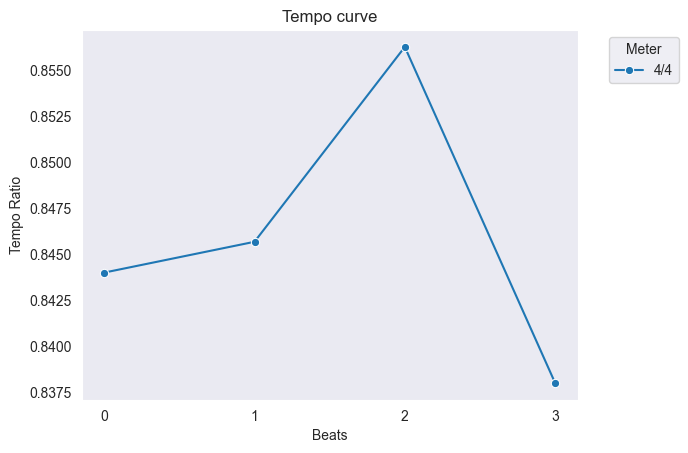

In [11]:
ratios = timing('asap-dataset/Mozart/Piano_Sonatas/')
# Print only 4/4 time signature
plot_timing({"4/4": ratios["4/4"]})

#### b. All pieces in the dataset

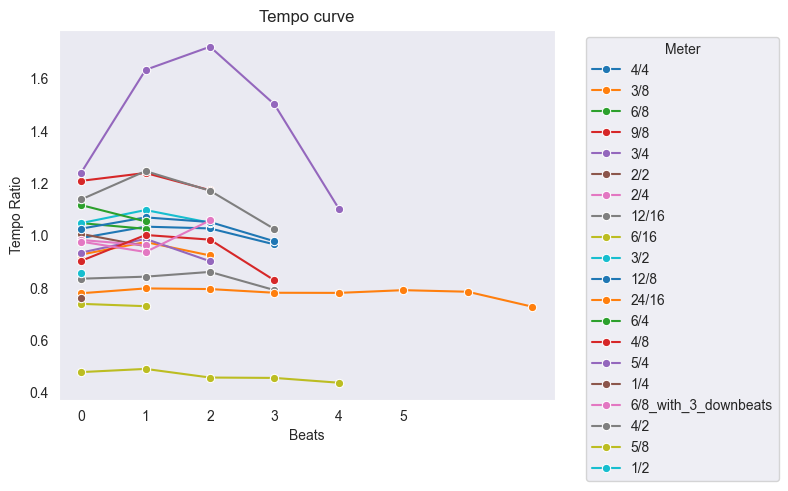

In [3]:
plot_timing(timing('asap-dataset/'))

## Task B: Empirical findings

### 1. Subcorpus Analysis
#### a. Note Onset Distribution

In [3]:
from task_b.q1 import parse_score_to_dataframe, extract_onset_in_measure

In [4]:
# 2/4
score1 = music21.converter.parse('./asap-dataset/Mozart/Piano_Sonatas/11-3/xml_score.musicxml')
# 3/4
score2 = music21.converter.parse('./asap-dataset/Mozart/Piano_Sonatas/12-1/xml_score.musicxml')
# 4/4
score3 = music21.converter.parse('./asap-dataset/Mozart/Piano_Sonatas/12-2/xml_score.musicxml')

In [5]:
# DataFrame
score1_df = parse_score_to_dataframe(score1)
score2_df = parse_score_to_dataframe(score2)
score3_df = parse_score_to_dataframe(score3)

# onsets
onsets_note_info1 = extract_onset_in_measure(score1_df).astype(float)
onsets_note_info2 = extract_onset_in_measure(score2_df).astype(float)
onsets_note_info3 = extract_onset_in_measure(score3_df).astype(float)

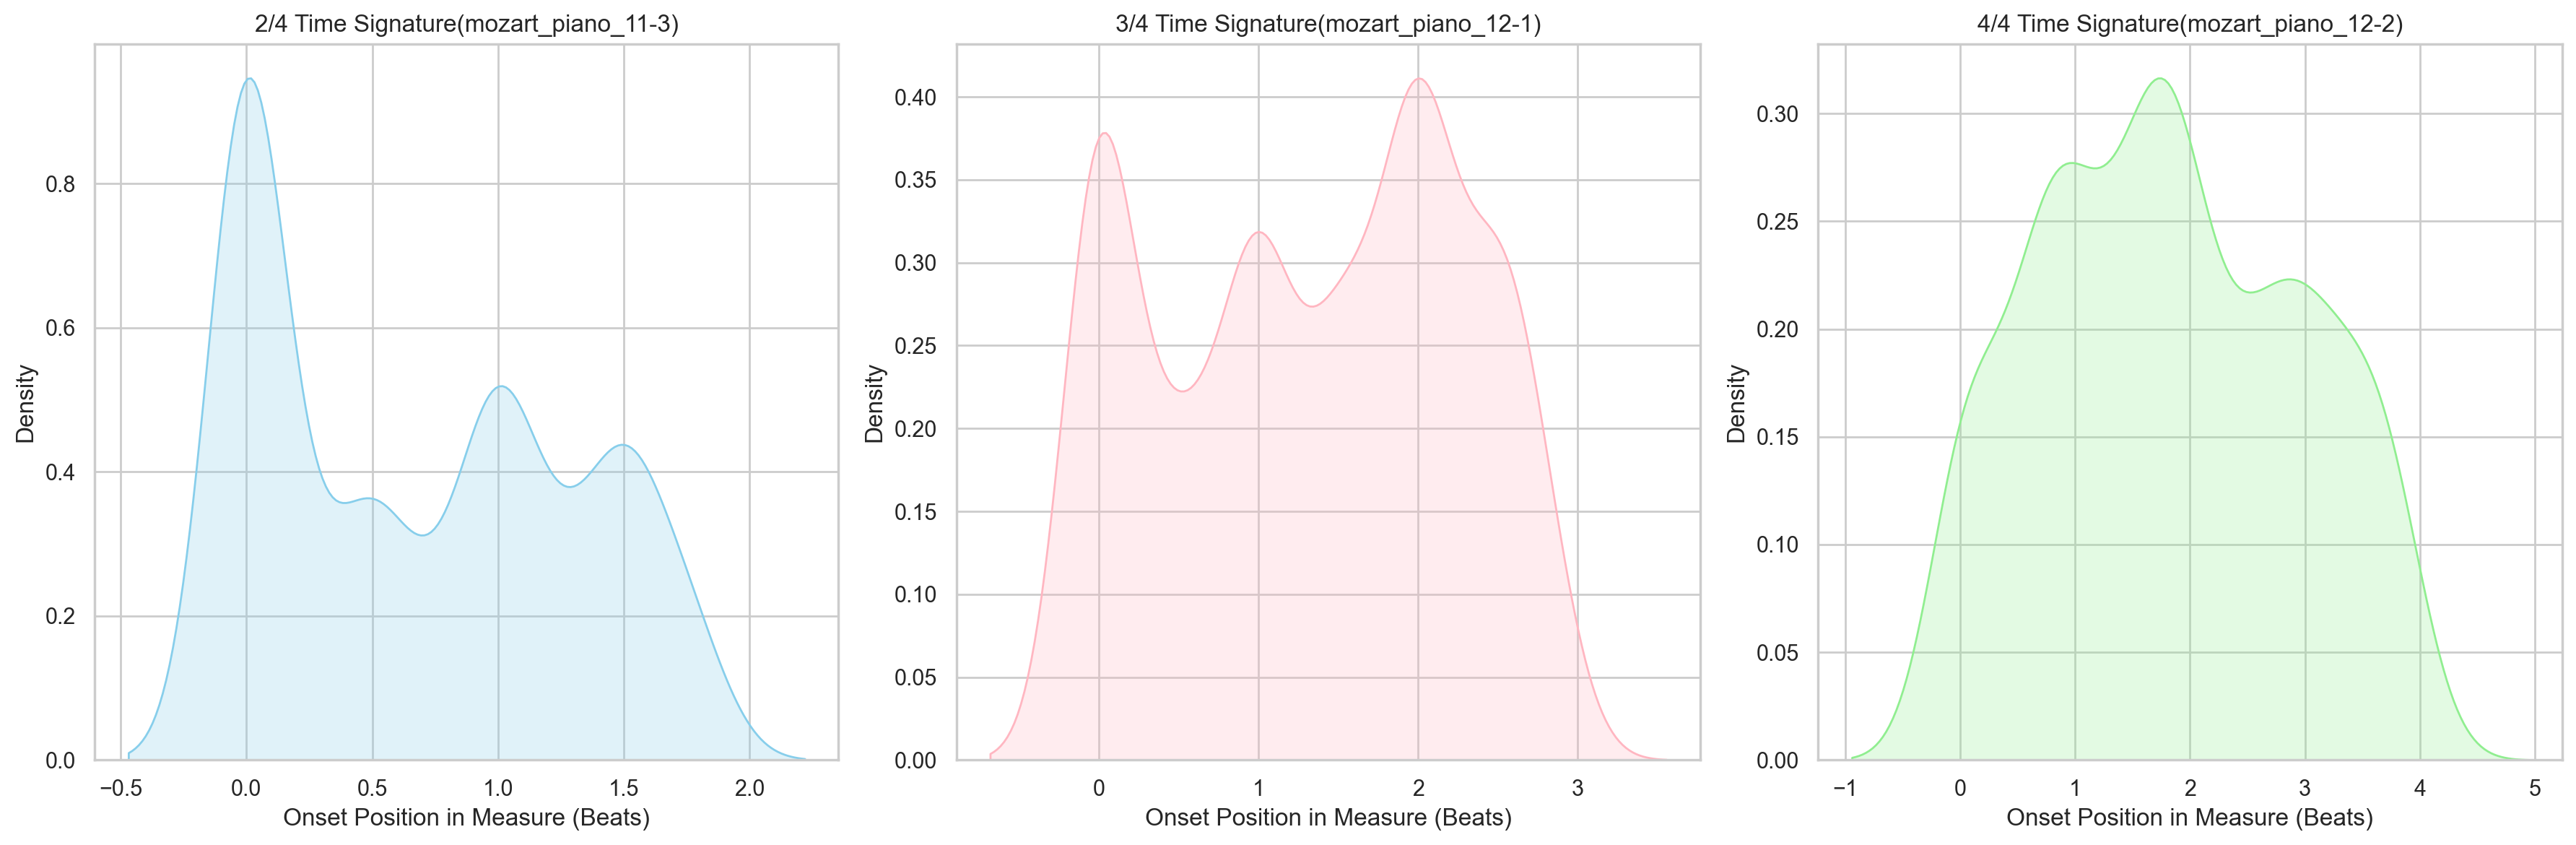

In [6]:
sns.set(style="whitegrid")
colors = ['skyblue', 'lightpink', 'lightgreen']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

titles = ['2/4 Time Signature(mozart_piano_11-3)', '3/4 Time Signature(mozart_piano_12-1)',
          '4/4 Time Signature(mozart_piano_12-2)']
onsets_note_infos = [onsets_note_info1, onsets_note_info2, onsets_note_info3]
time_signatures = [2, 3, 4]

for i, (onsets_note_info, ts) in enumerate(zip(onsets_note_infos, time_signatures)):
    sns.kdeplot(onsets_note_info, ax=axs[i], bw_adjust=1, fill=True, color=colors[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Onset Position in Measure (Beats)')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

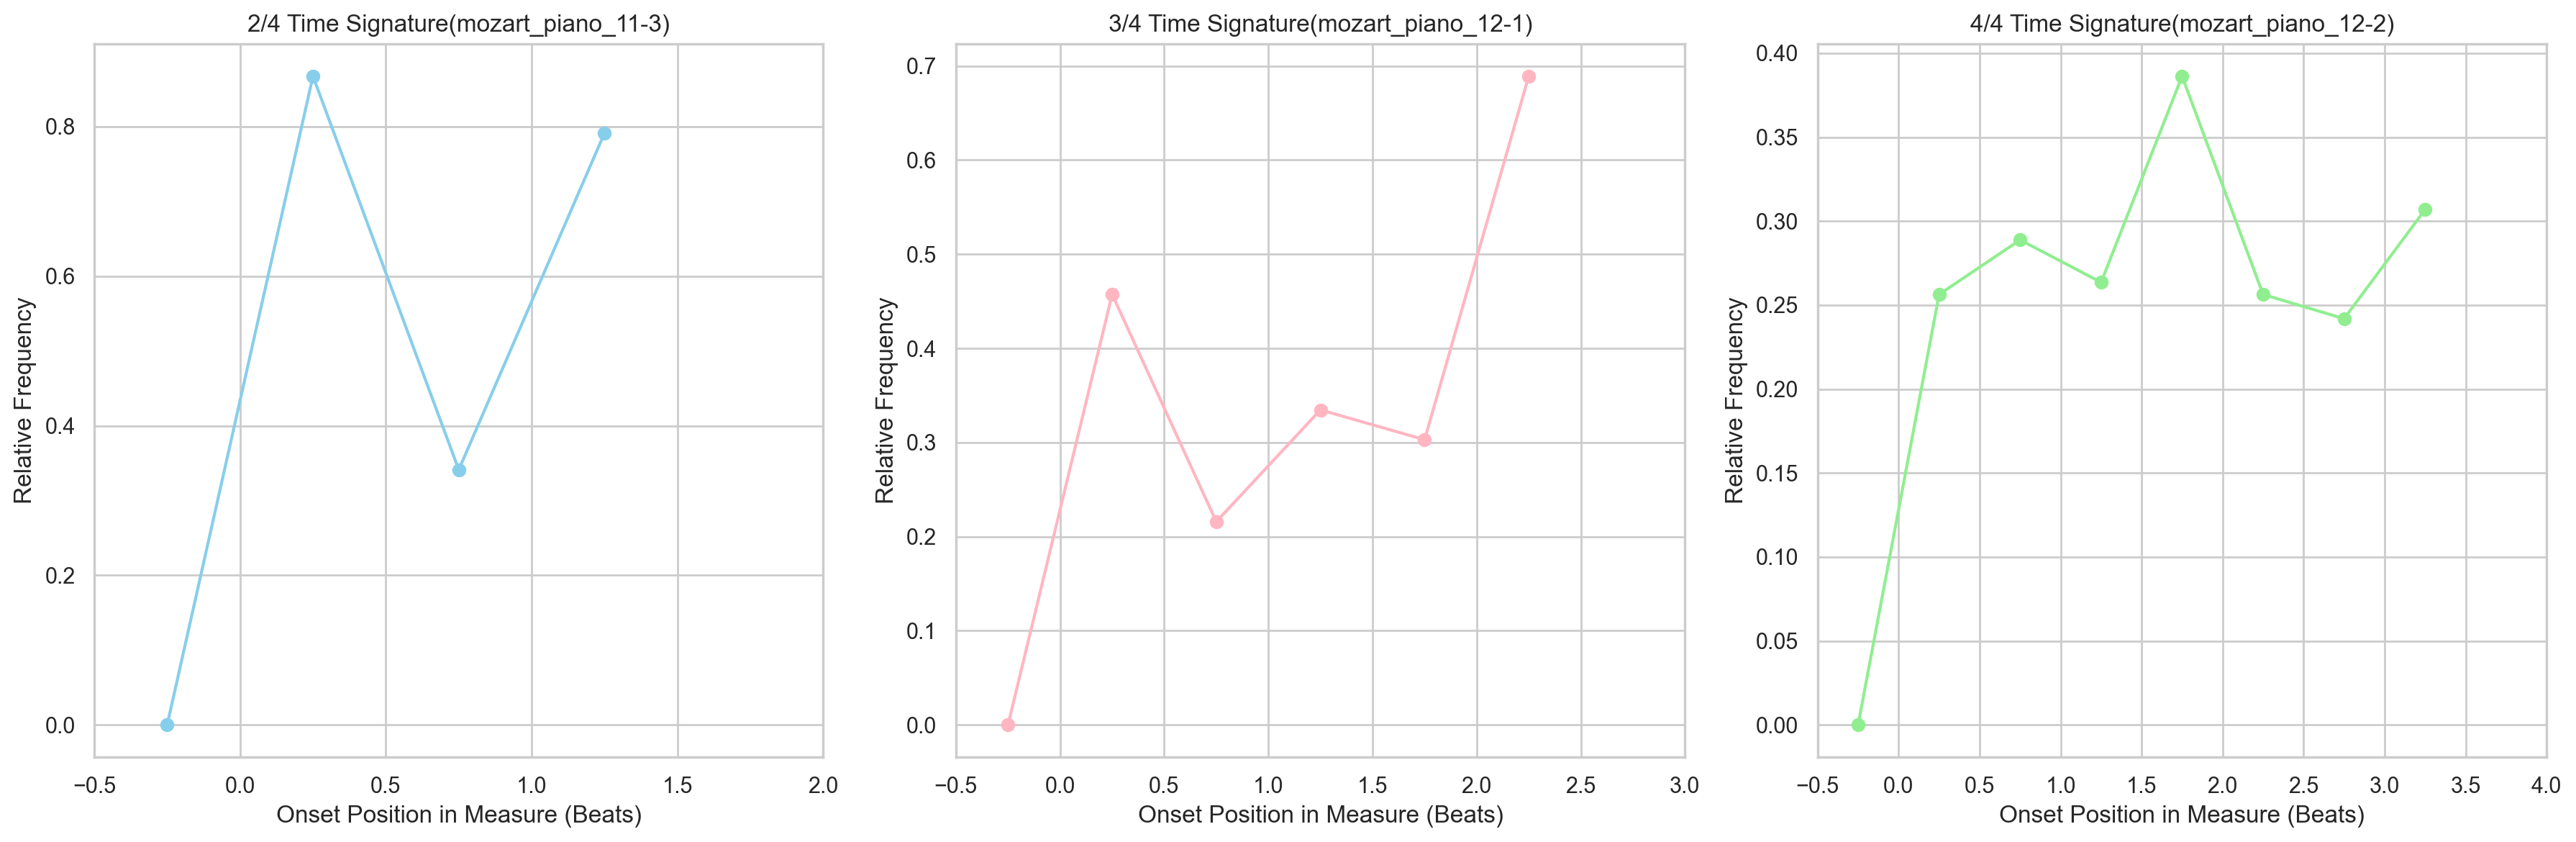

In [7]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

titles = ['2/4 Time Signature(mozart_piano_11-3)', '3/4 Time Signature(mozart_piano_12-1)',
          '4/4 Time Signature(mozart_piano_12-2)']
onsets_note_infos = [onsets_note_info1, onsets_note_info2, onsets_note_info3]
time_signatures = [2, 3, 4]

for i, (onsets_note_info, ts) in enumerate(zip(onsets_note_infos, time_signatures)):
    total_beats = ts

    frequencies, edges = np.histogram(onsets_note_info, bins=np.arange(-0.5, total_beats, 0.5), density=True)
    centers = (edges[:-1] + edges[1:]) / 2
    axs[i].plot(centers, frequencies, marker='o', linestyle='-', color=colors[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlim(-0.5, total_beats)
    axs[i].set_xlabel('Onset Position in Measure (Beats)')
    axs[i].set_ylabel('Relative Frequency')

plt.tight_layout()
plt.show()

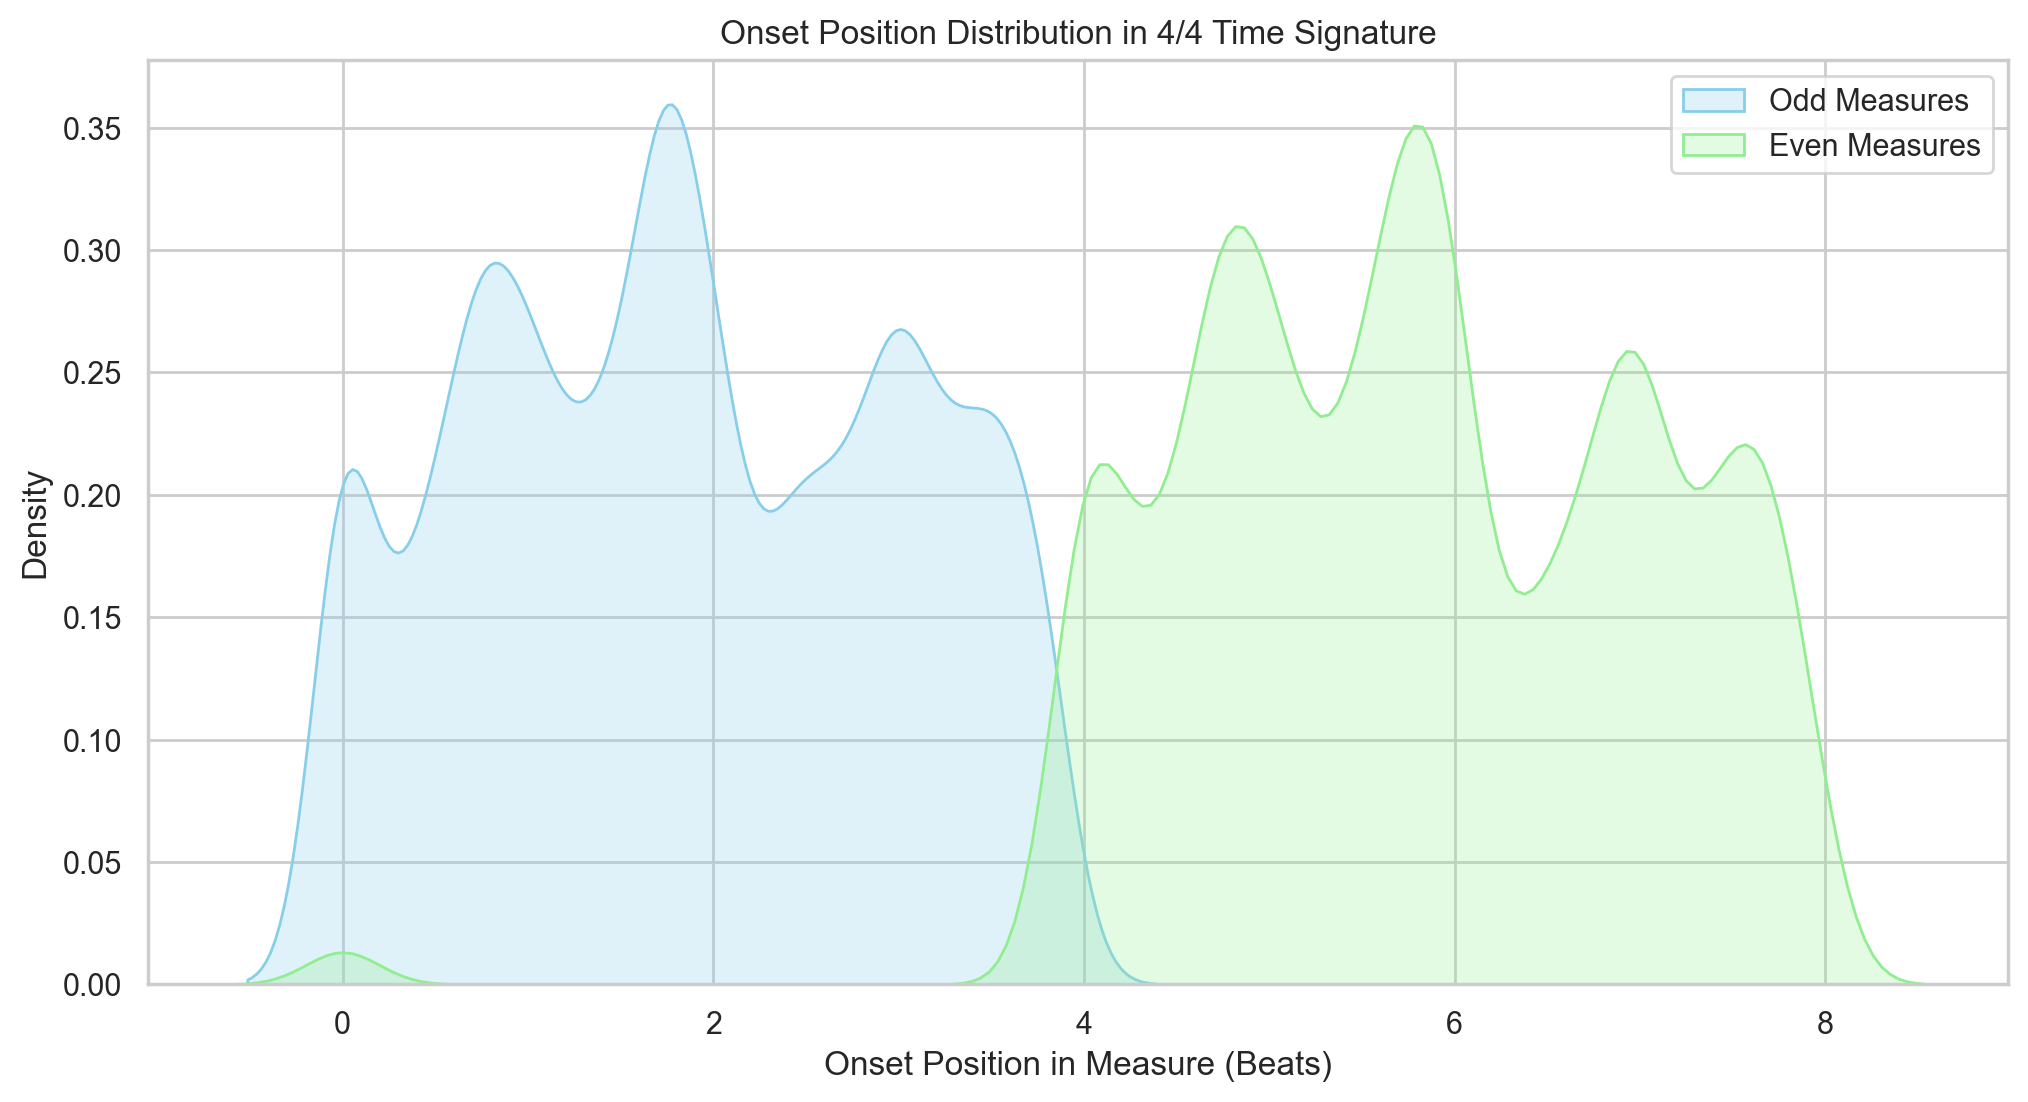

In [8]:
score3_df['onset_in_measure'] = pd.to_numeric(score3_df['onset_in_measure'], errors='coerce')
score3_df = score3_df.dropna(subset=['onset_in_measure'])

odd_measures_onsets = score3_df[score3_df['measure_number'] % 2 == 1]['onset_in_measure']
even_measures_onsets = score3_df[score3_df['measure_number'] % 2 == 0]['onset_in_measure'] + 4
even_measures_onsets = even_measures_onsets % 8

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(odd_measures_onsets, bw_adjust=0.5, fill=True, color='skyblue', label='Odd Measures', ax=ax)
sns.kdeplot(even_measures_onsets, bw_adjust=0.5, fill=True, color='lightgreen', label='Even Measures', ax=ax)
ax.set_title('Onset Position Distribution in 4/4 Time Signature')
ax.set_xlabel('Onset Position in Measure (Beats)')
ax.set_ylabel('Density')
ax.legend()

plt.show()

#### 1.b Expressive Timing

In [1]:
from task_b.q1b import get_rawdata, violin_plot_each_part, plot_third_part

In [2]:
ADIG01_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/ADIG01_annotations.txt')
MunA03M_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/MunA03M_annotations.txt')
TET01_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/TET01_annotations.txt')
Original_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/midi_score_annotations.txt')

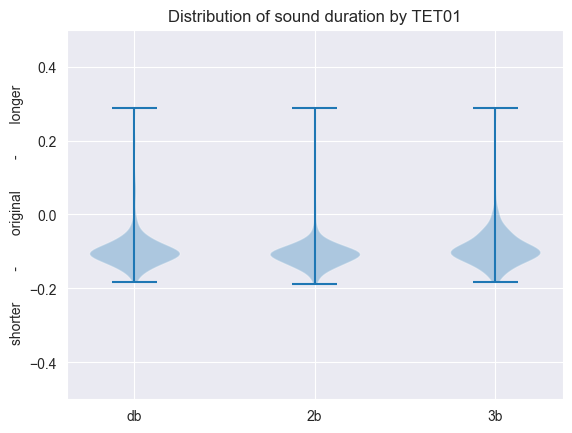

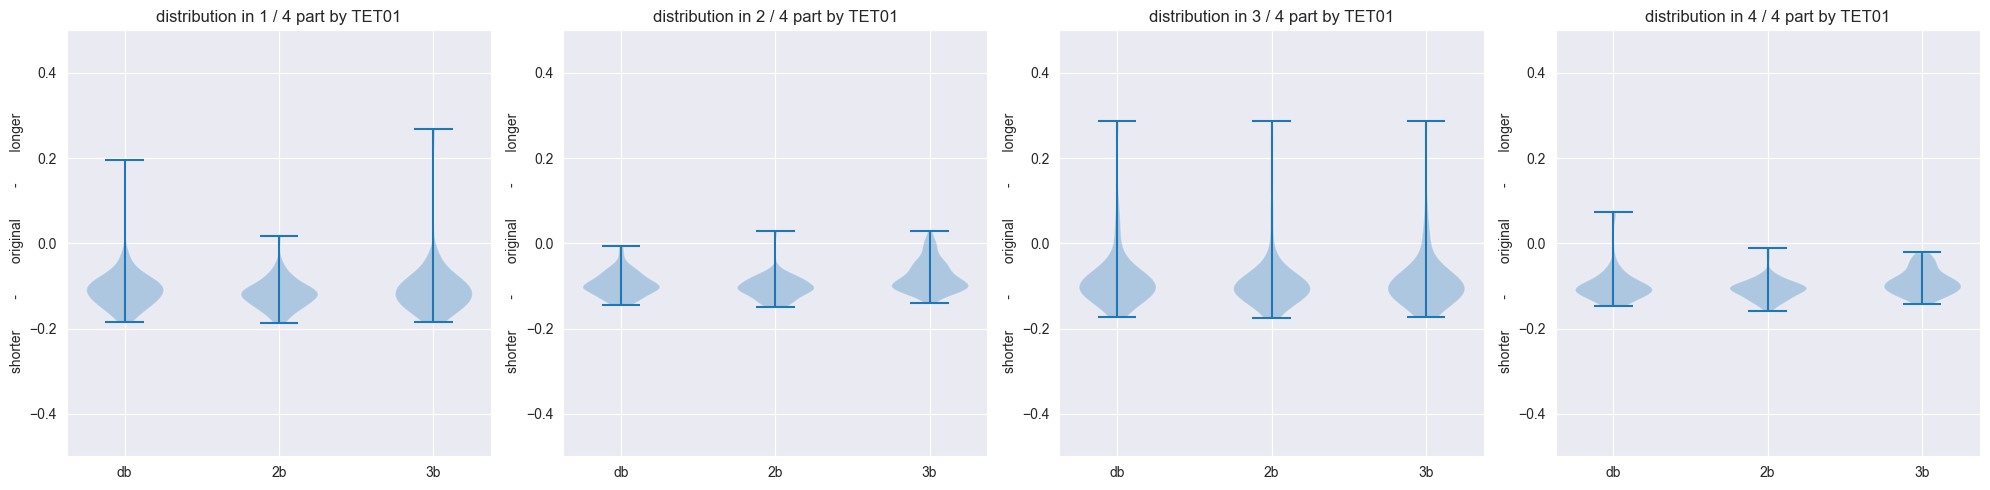

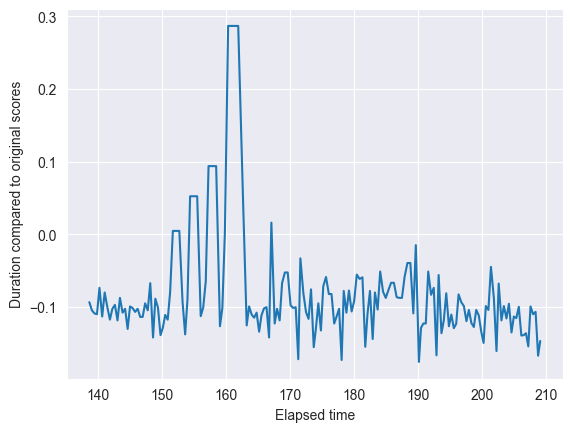

In [3]:
violin_plot_each_part(TET01_scores, Original_scores, "TET01")
plot_third_part(TET01_scores, Original_scores)

### 2. Empirical Question

In [12]:
from task_b.q2 import read_musicxml_and_normalize, plot_average_pitch_contours, plot_musician_contours_for_era, \
    calculate_entropy, perform_t_test, merge_music_data_by_era
from task_b.constants import Baroque_musician_paths, Classical_musician_paths, Impressionist_musician_paths, \
    Modern_musician_paths

Main genres in the history of Western classical music and corresponding composers:

# Baroque Period (Approx. 1600-1750):

Bach: A representative figure of the Baroque period, renowned for his polyphonic music.


# Classical Period (Approx. 1750-1820):

Haydn and Mozart: Core figures of Classical music, known for their clear forms and harmonic structures.
Beethoven: His works transitioned from Classicism to Romanticism, especially his later pieces.

# Romantic Period (Approx. 1820-1910):

Chopin, Liszt, Schumann, Brahms: Known for expressing personal emotions and musical innovations.
Tchaikovsky, Rachmaninoff: Russian Romantic composers, famous for their rich melodies and deep emotional music.
Schubert: An early Romantic figure, known for his songs and piano music.

# Impressionist Period (Approx. 1875-1925):

Debussy: A pioneer of Impressionist music, emphasizing timbre and bold harmonic innovations.
20th Century and Modern Music:

Prokofiev and Ravel: Their music often includes modernist traits, such as extended harmonies and rhythmic complexity.
Scriabin: Innovative harmonic language and elements of mysticism.
Balakirev and Glinka: Important figures in Russian nationalism in music.

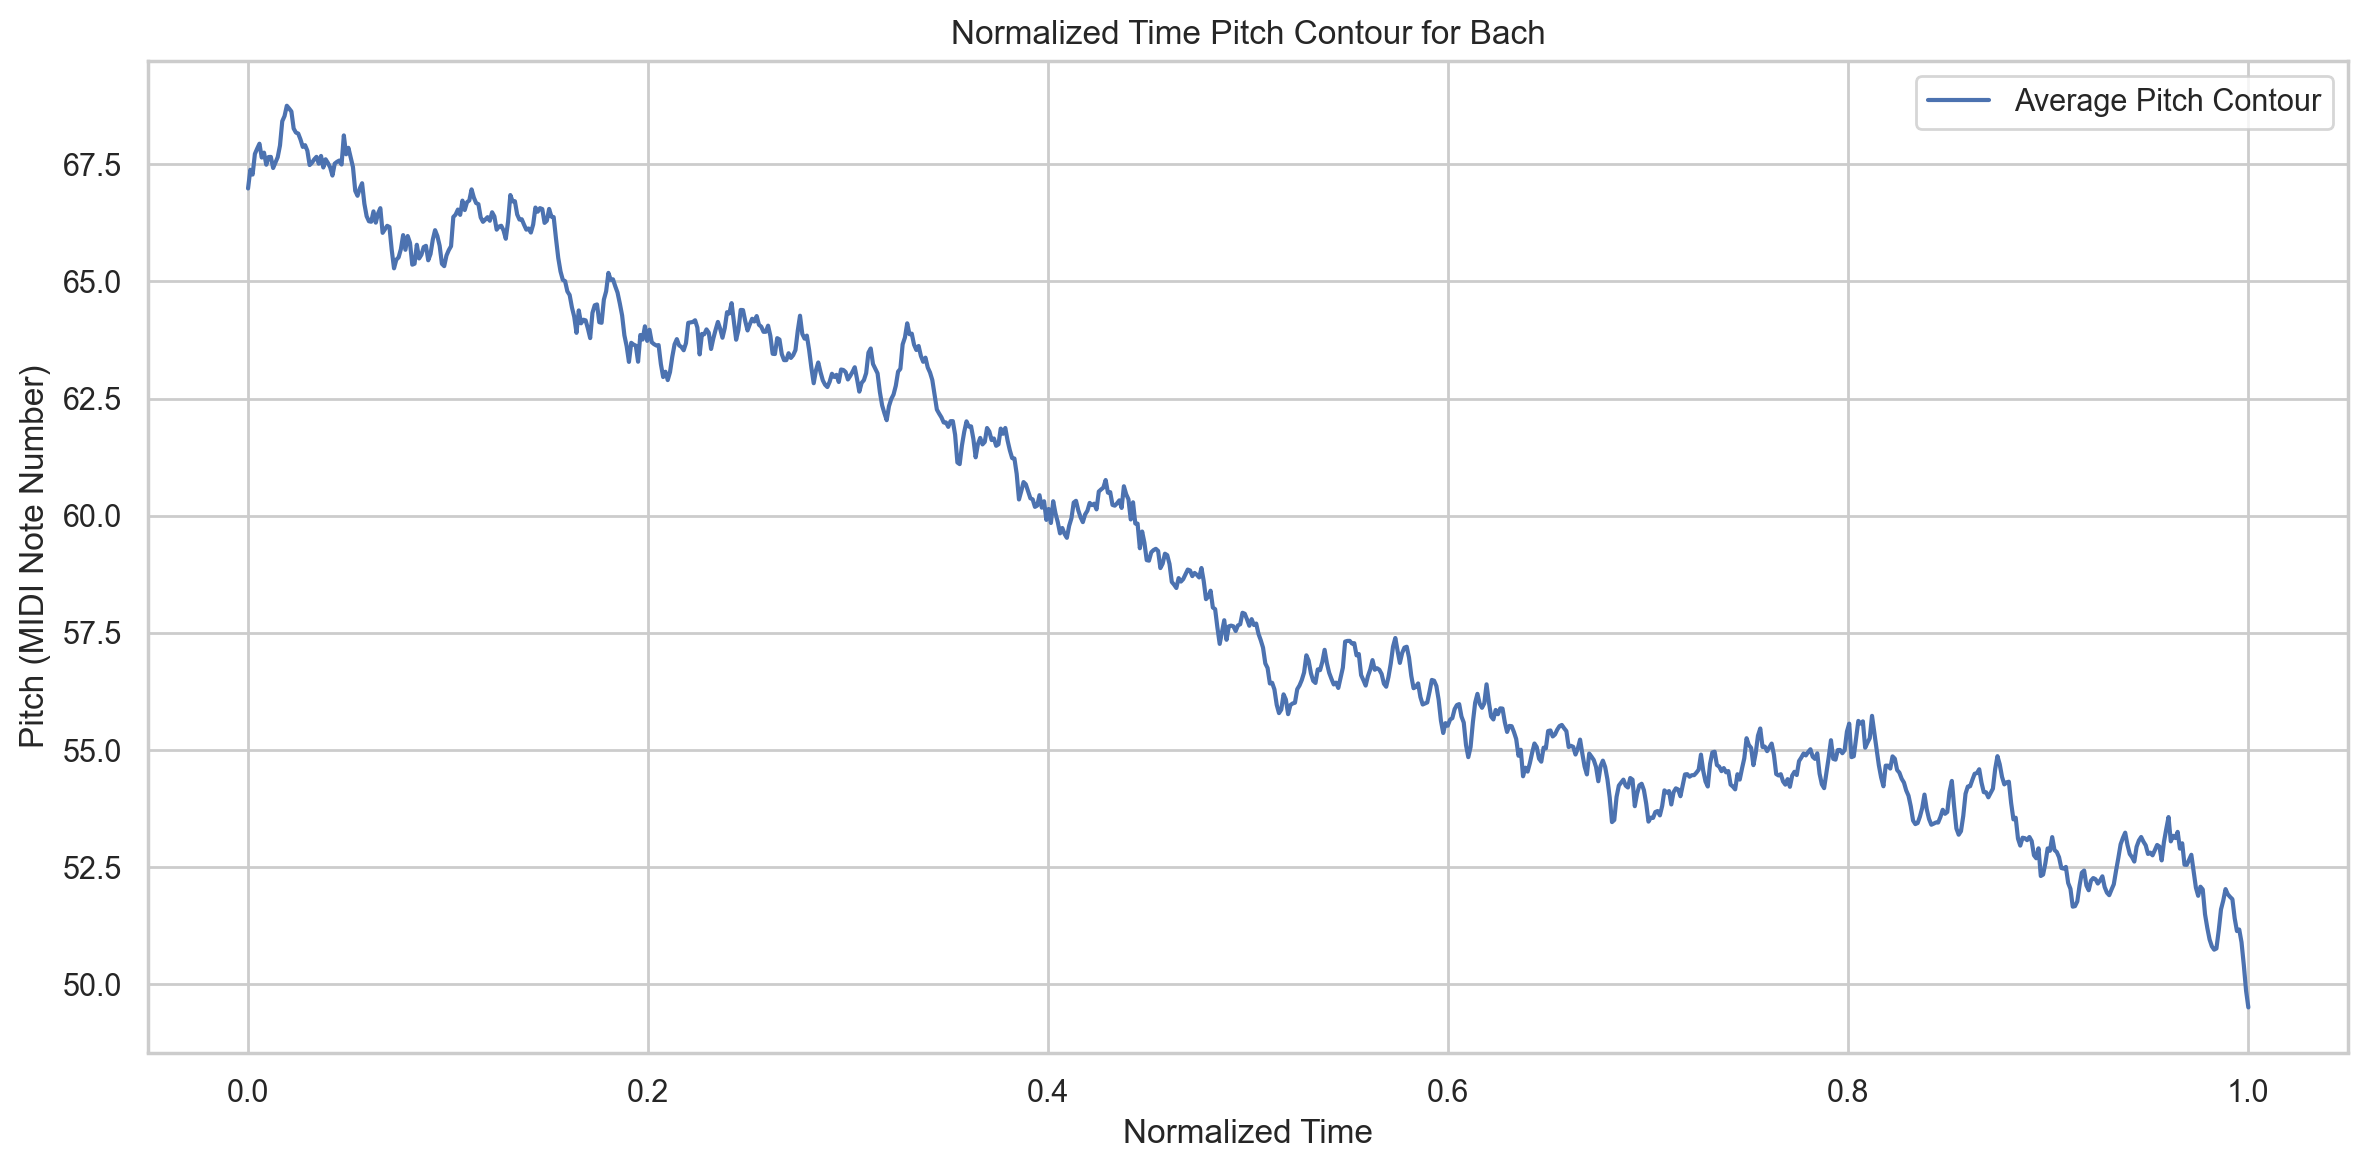

In [13]:
# 1. **Baroque** (1600-1750):
#    - **Bach**: A representative figure of the Baroque period, famous for his polyphonic music.

for musician, path in Baroque_musician_paths.items():
    music_data = read_musicxml_and_normalize(path)
    title = f"Normalized Time Pitch Contour for {musician}"
    # plot_pitch_contours(music_data, title)
    plot_average_pitch_contours(music_data, title)
    # plot_cdf(music_data)

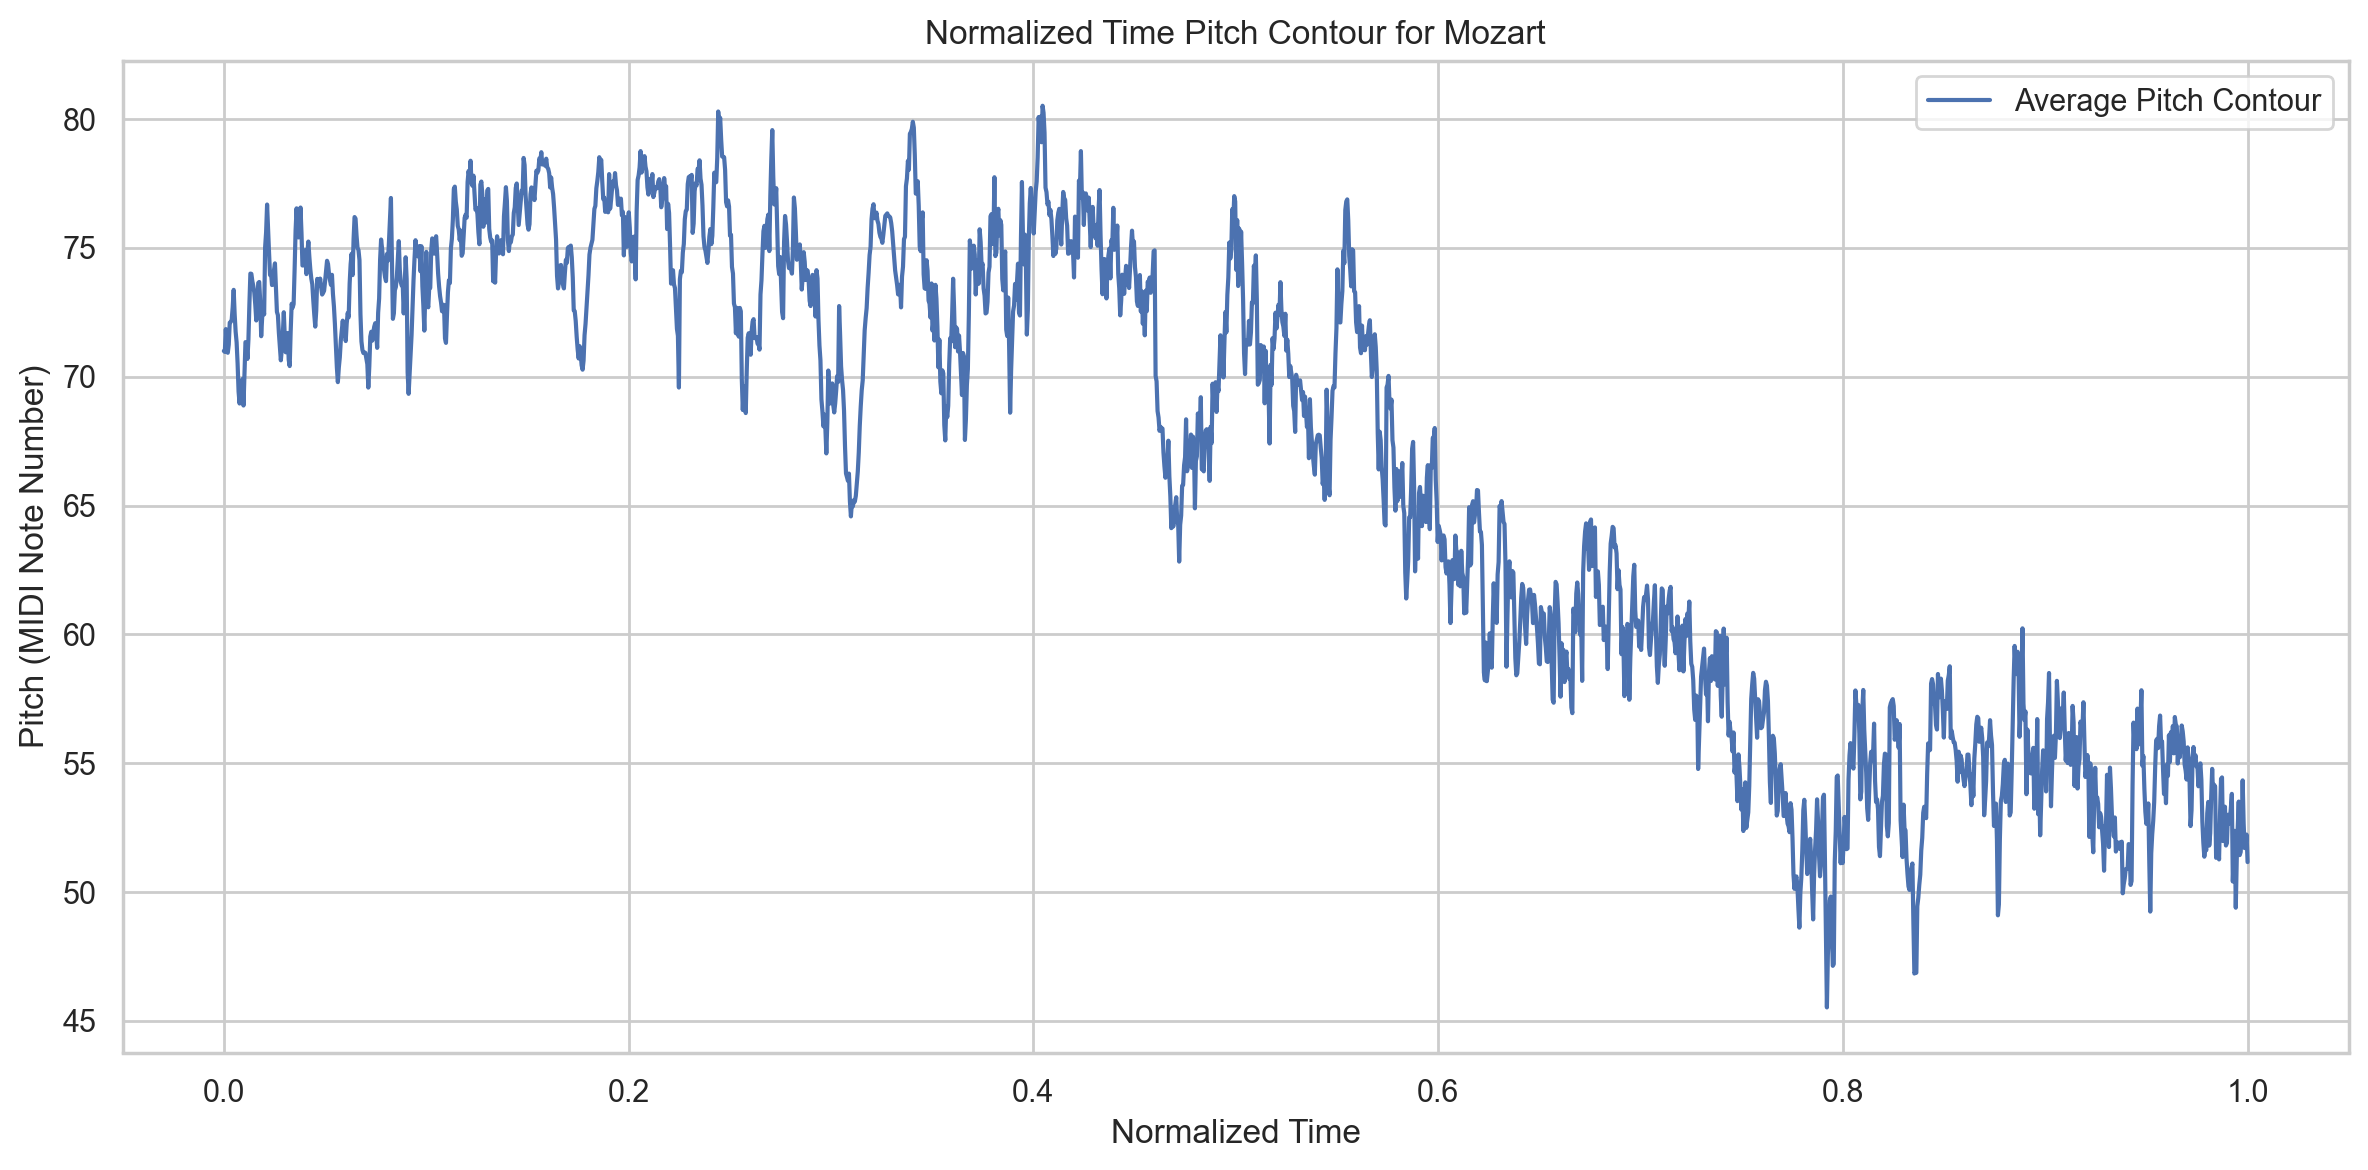

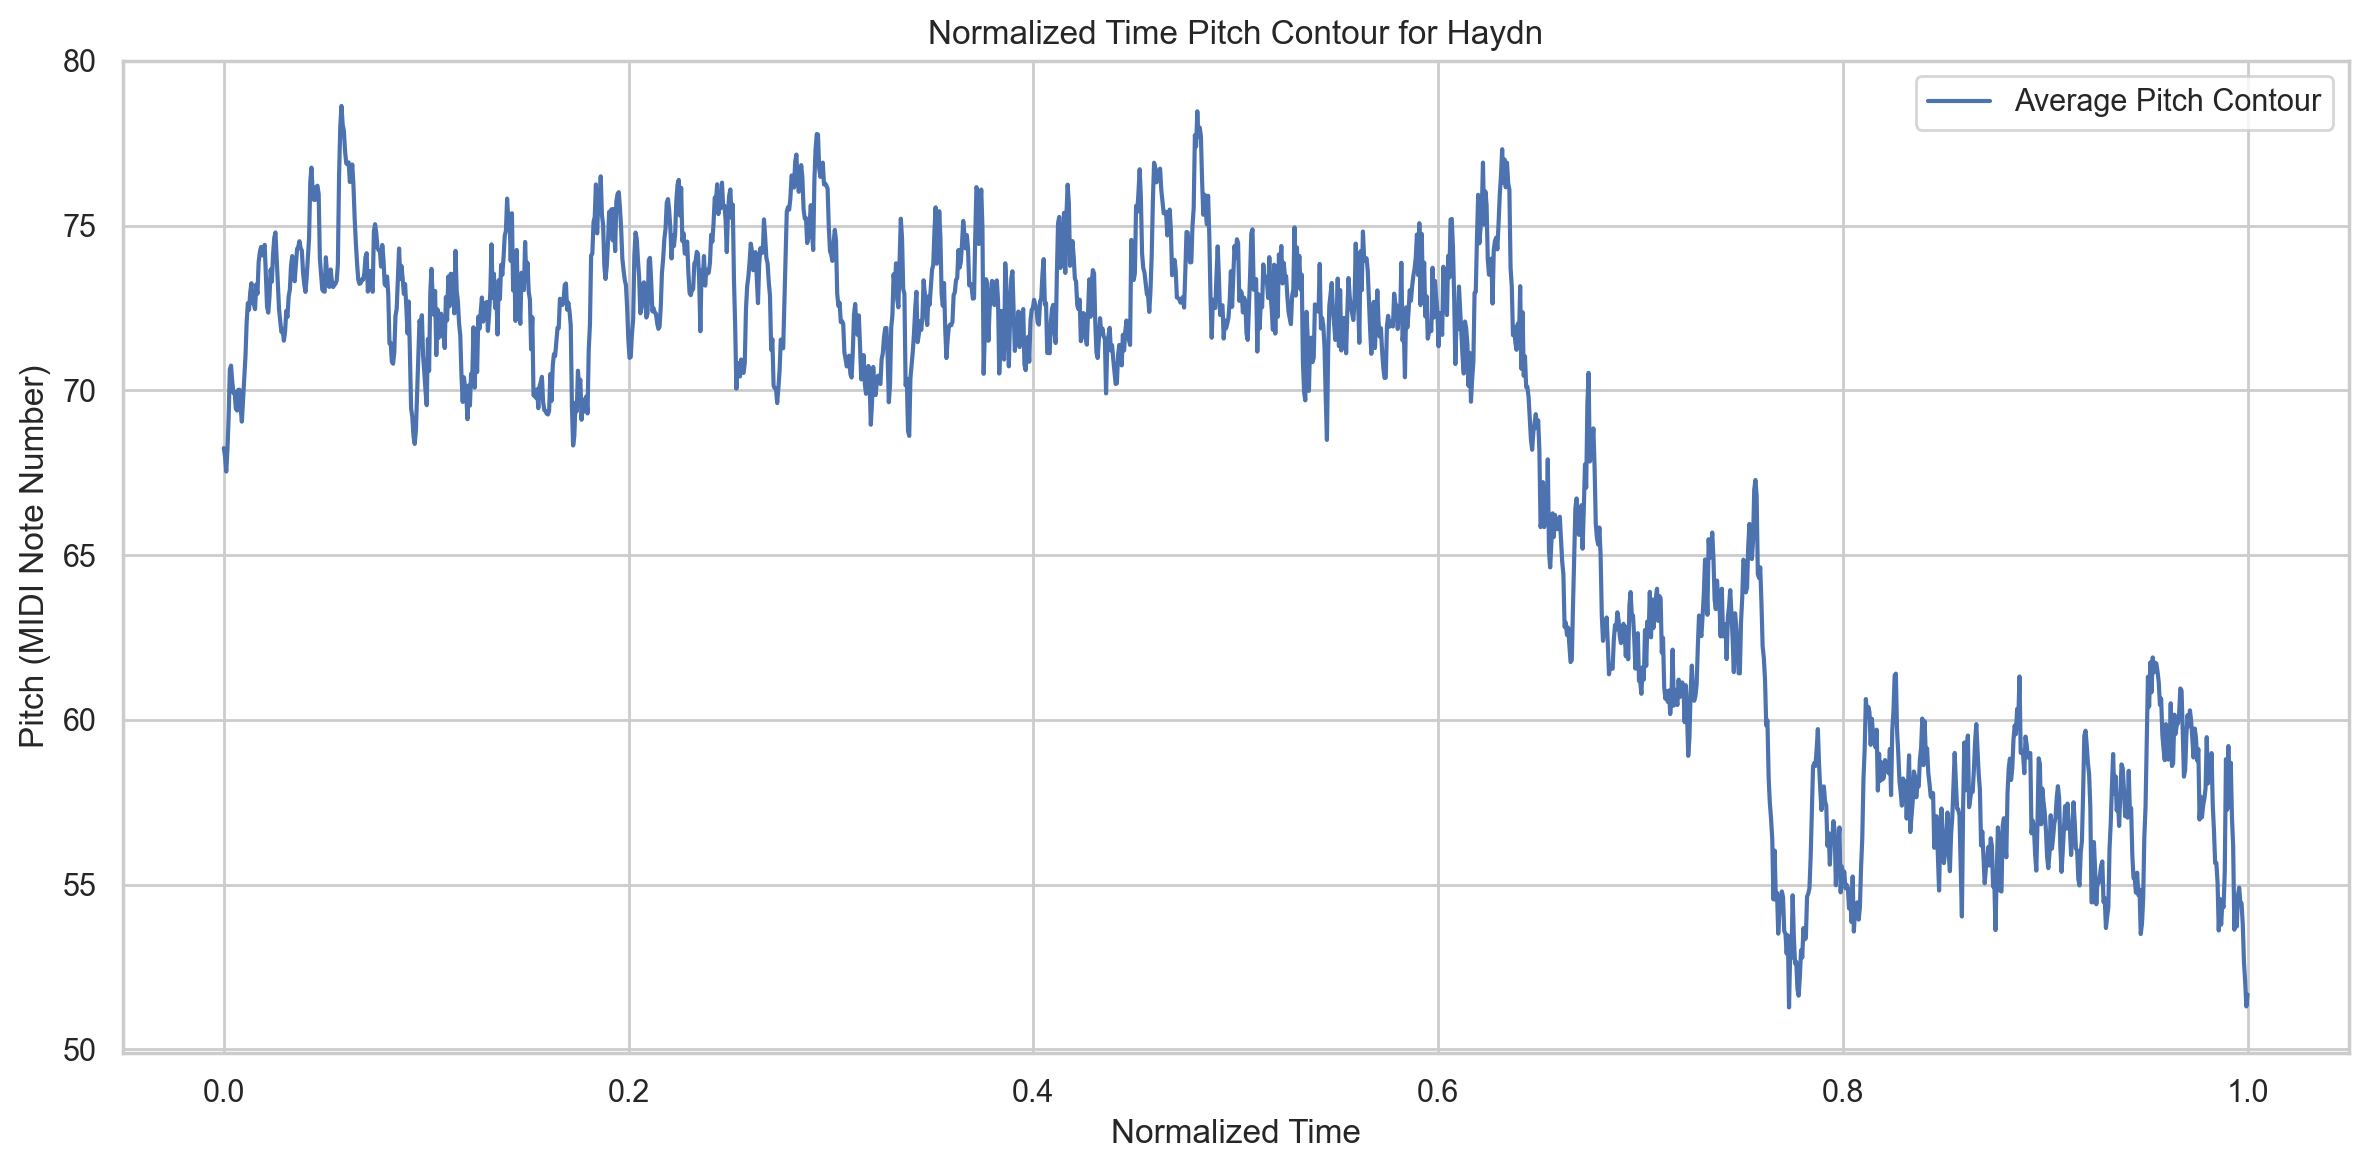

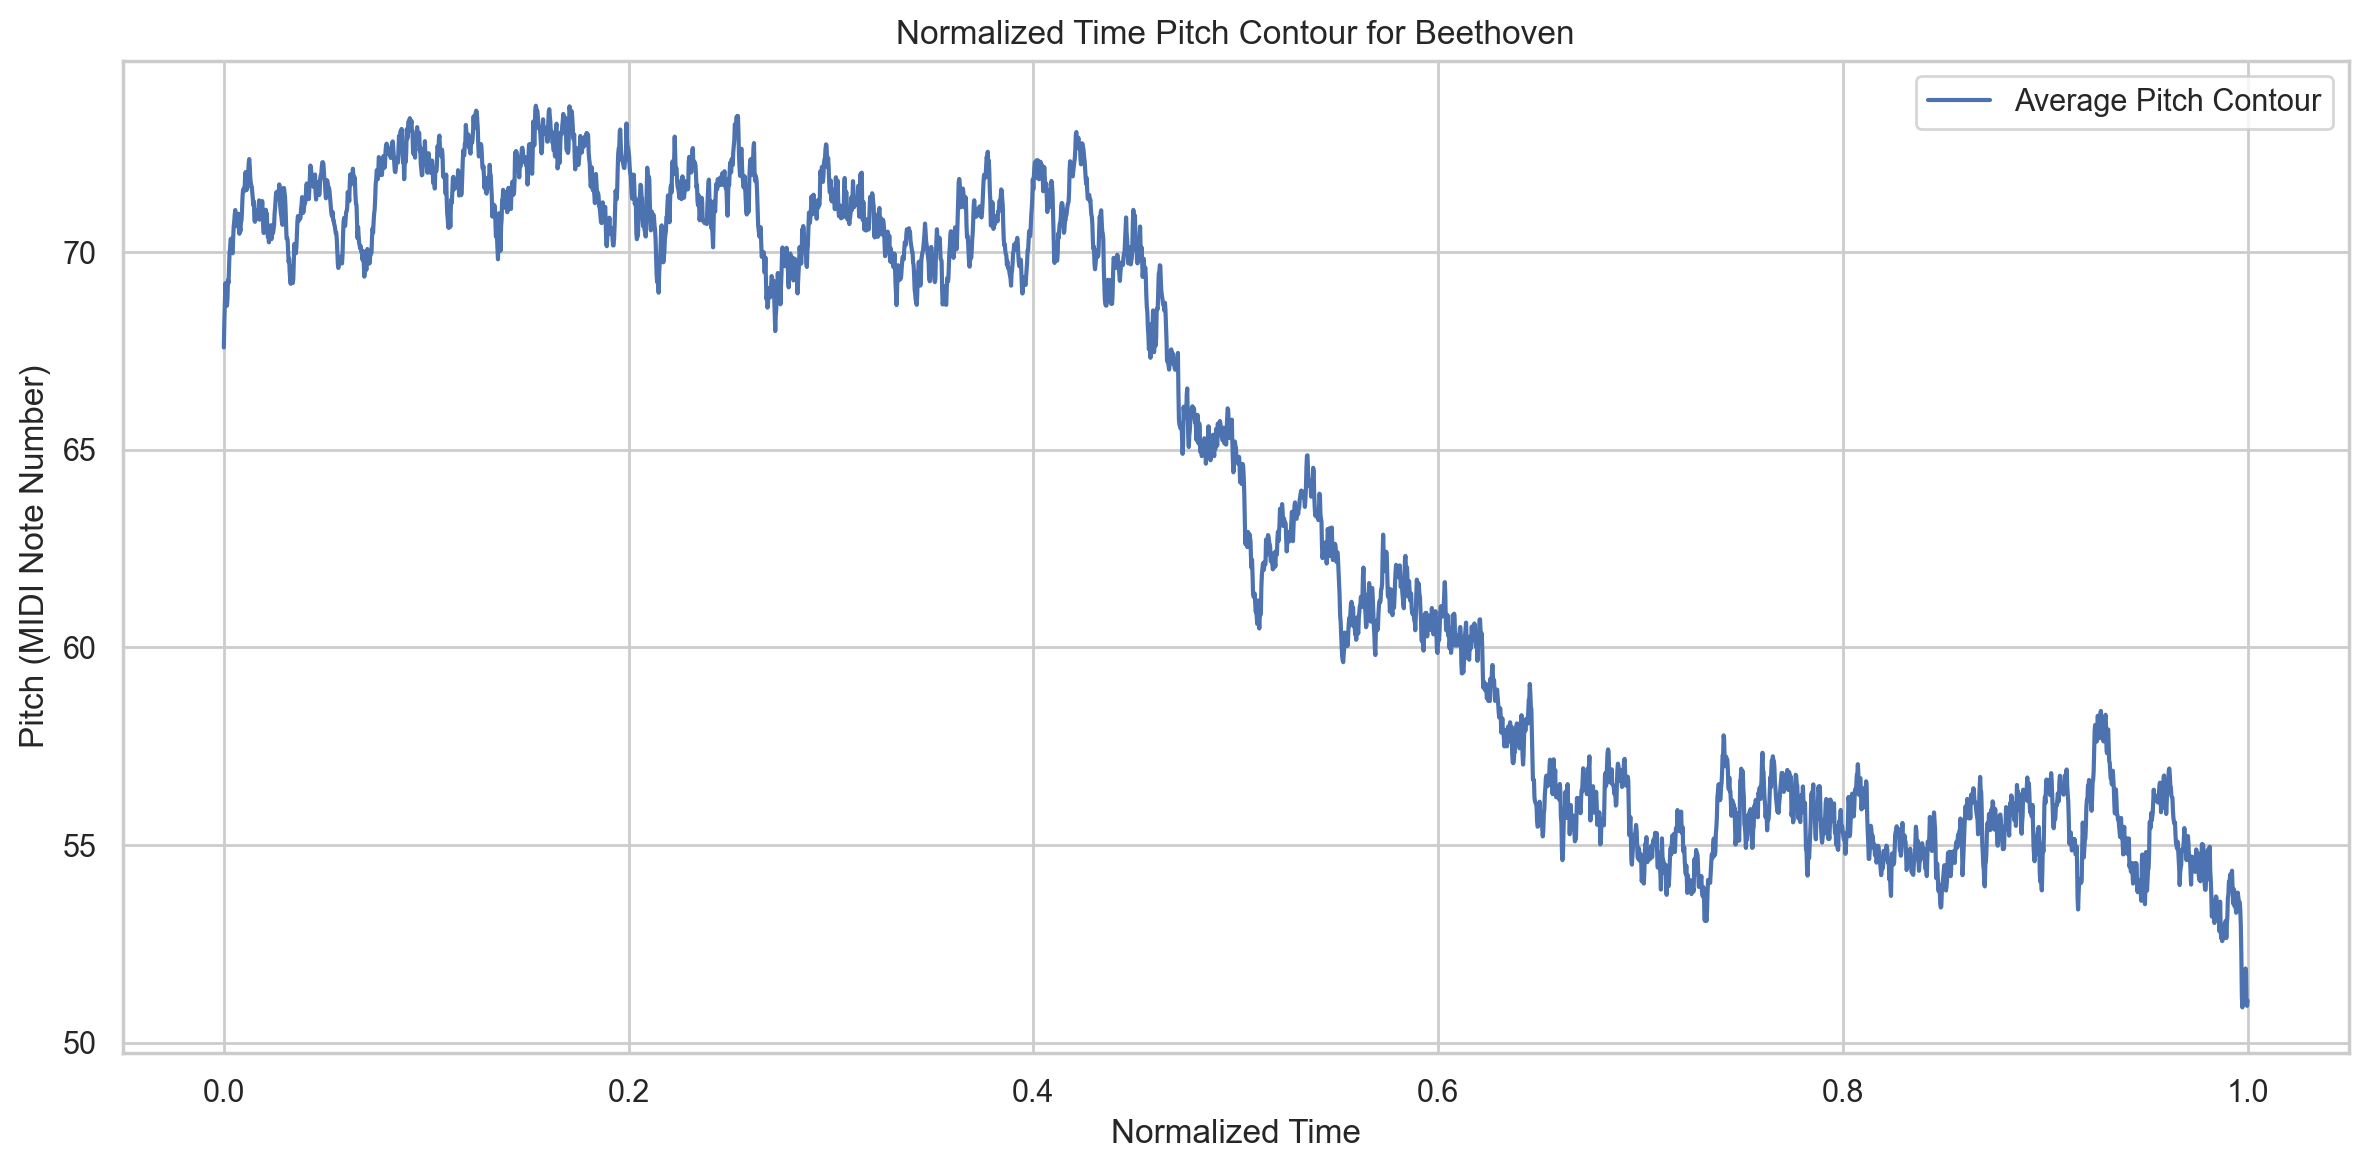

In [14]:
# 2.1 **Classical** (around1750-1820):
#    - **Haydn** & **Mozart**: Central figures in classical music, known for its clear forms and harmonious structures.
#    - **Beethoven**: His work transitioned from Classicism to Romanticism, especially his later works.

for musician, path in Classical_musician_paths.items():
    music_data = read_musicxml_and_normalize(path)
    title = f"Normalized Time Pitch Contour for {musician}"
    # plot_pitch_contours(music_data, title)
    plot_average_pitch_contours(music_data, title)
    # plot_cdf(music_data)

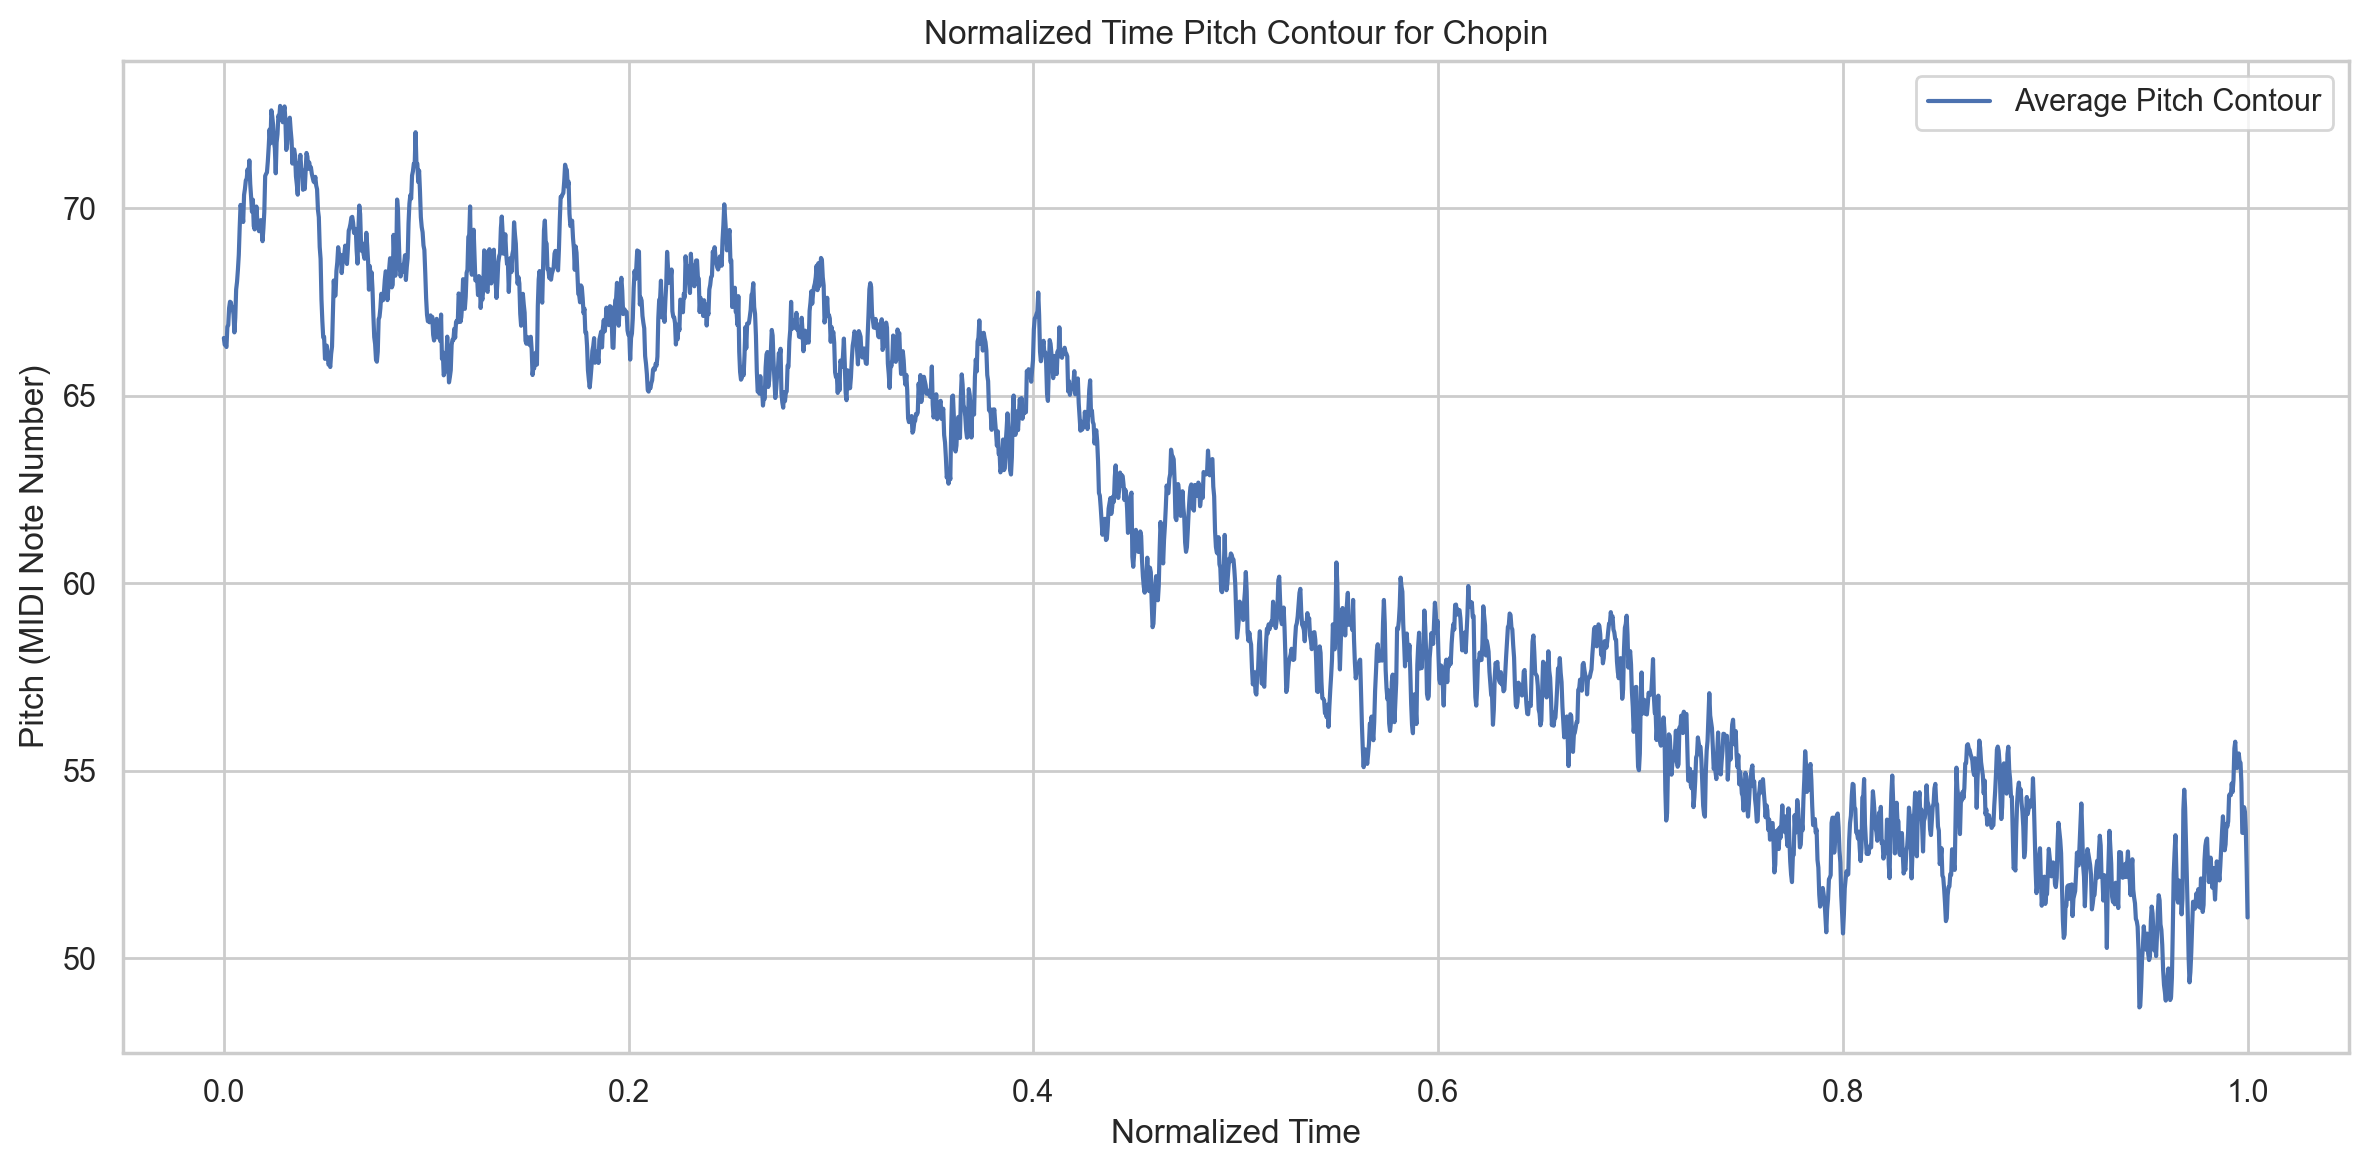

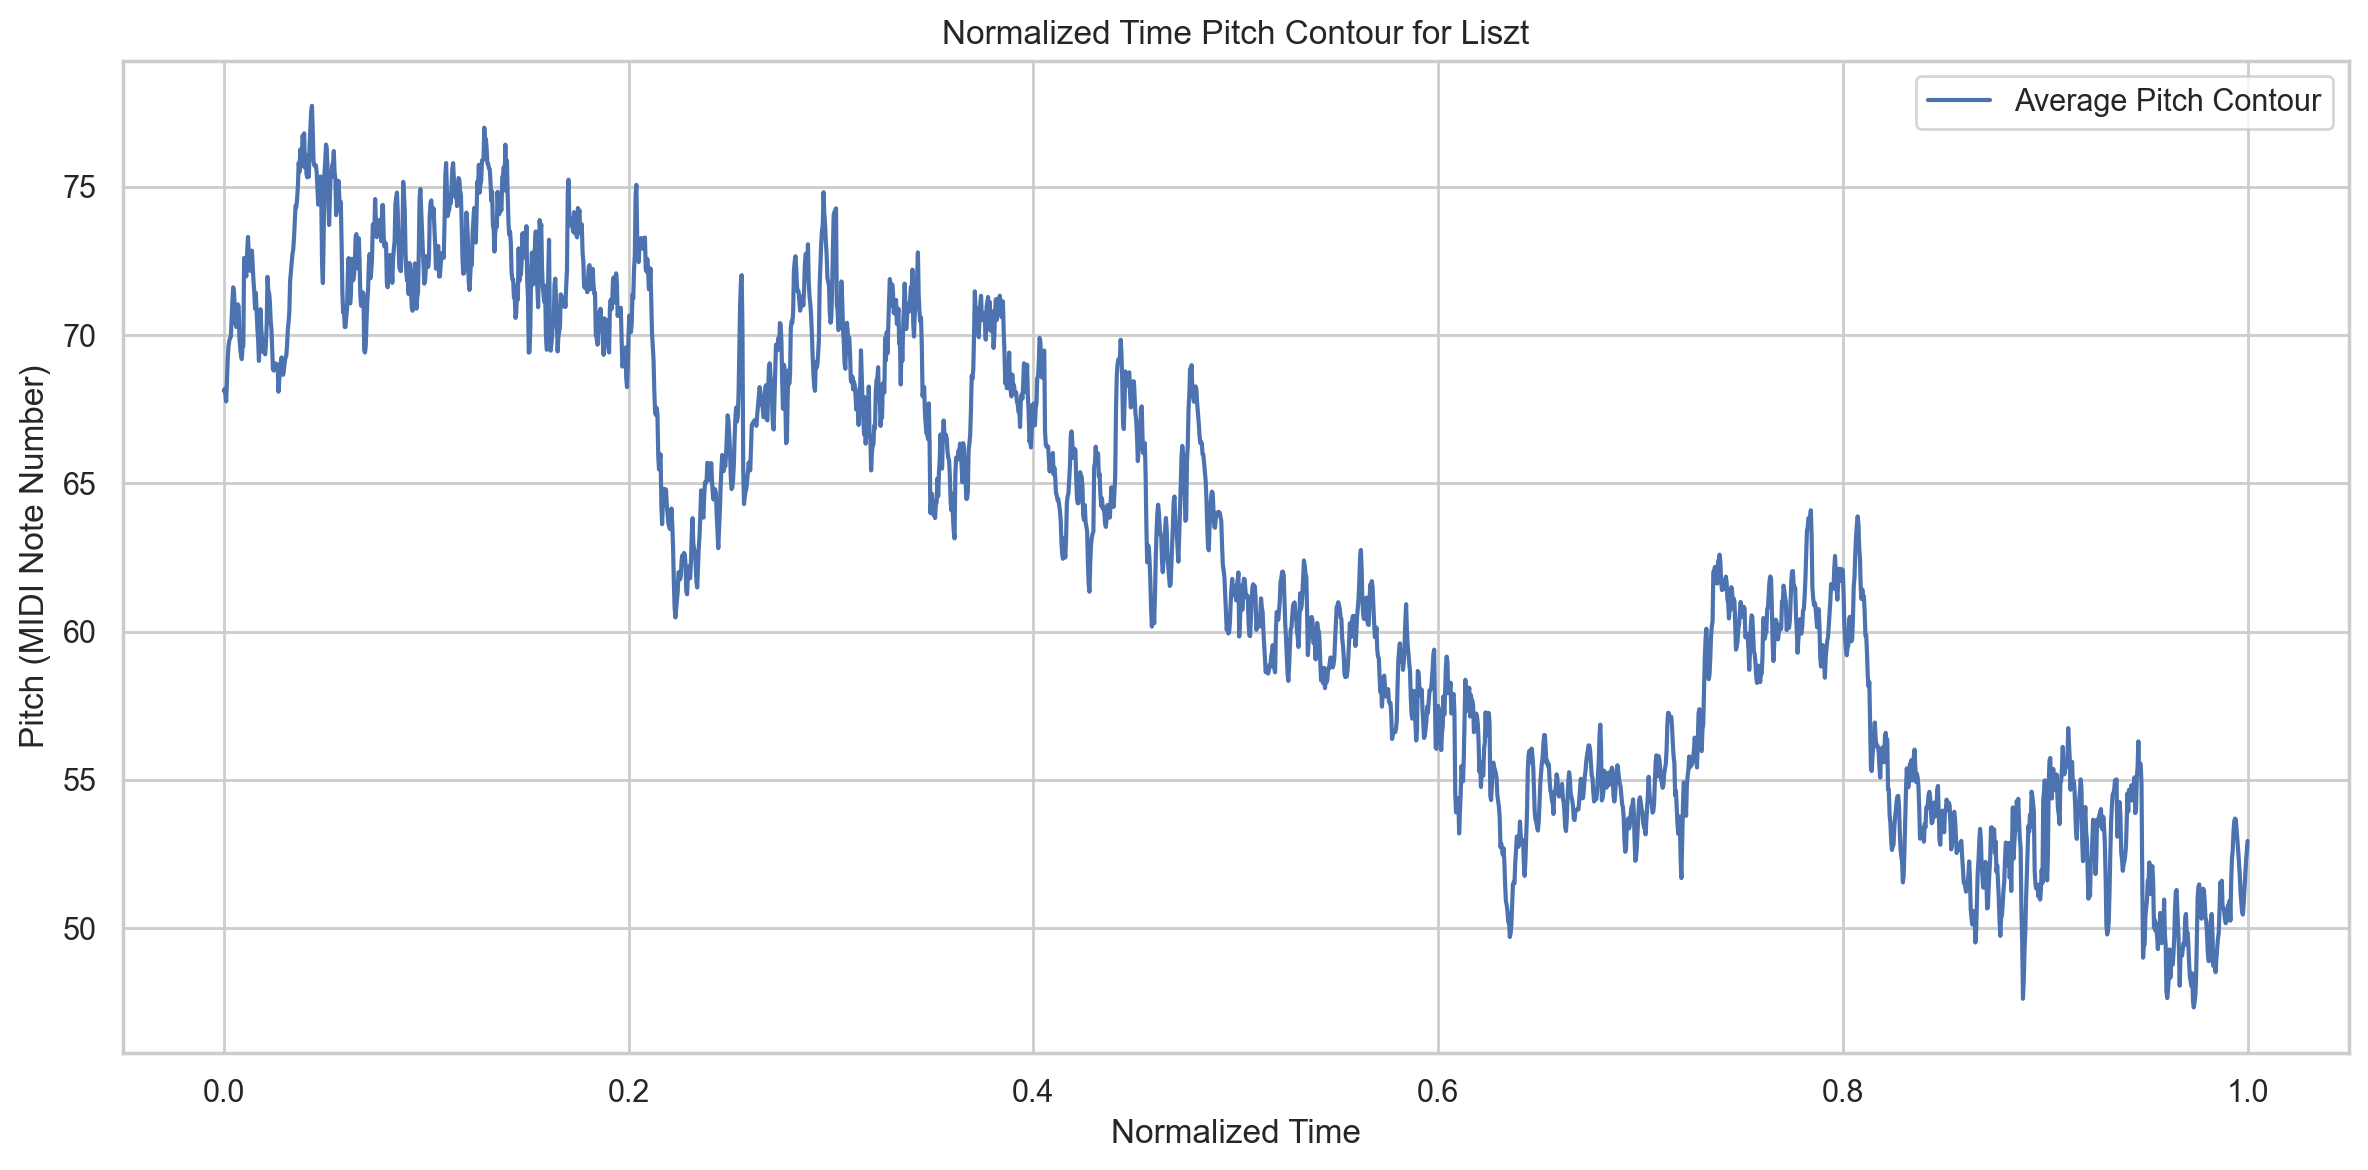

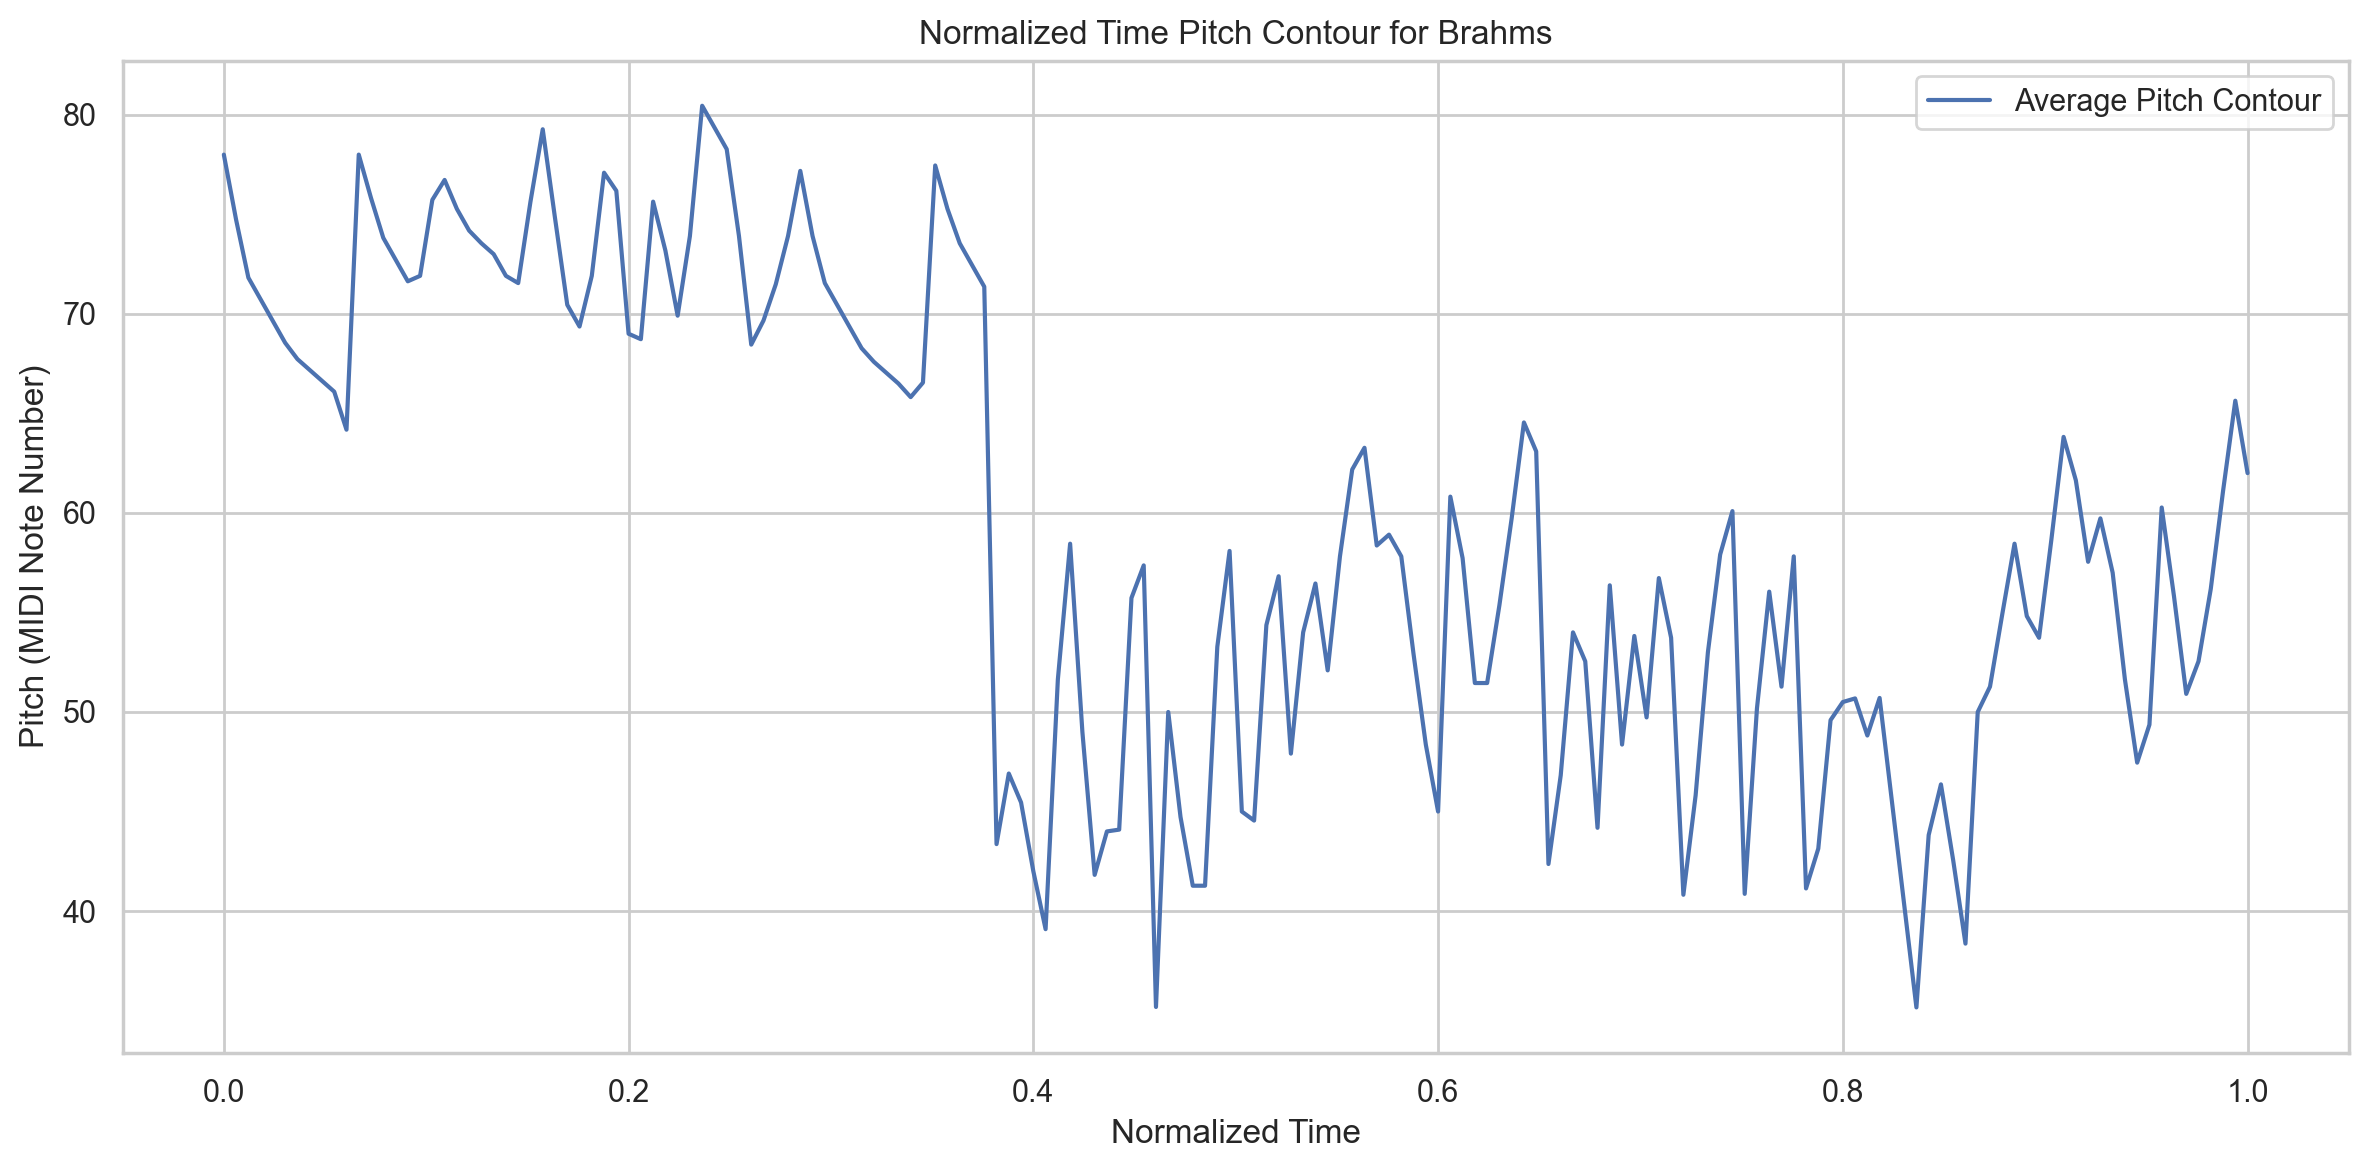

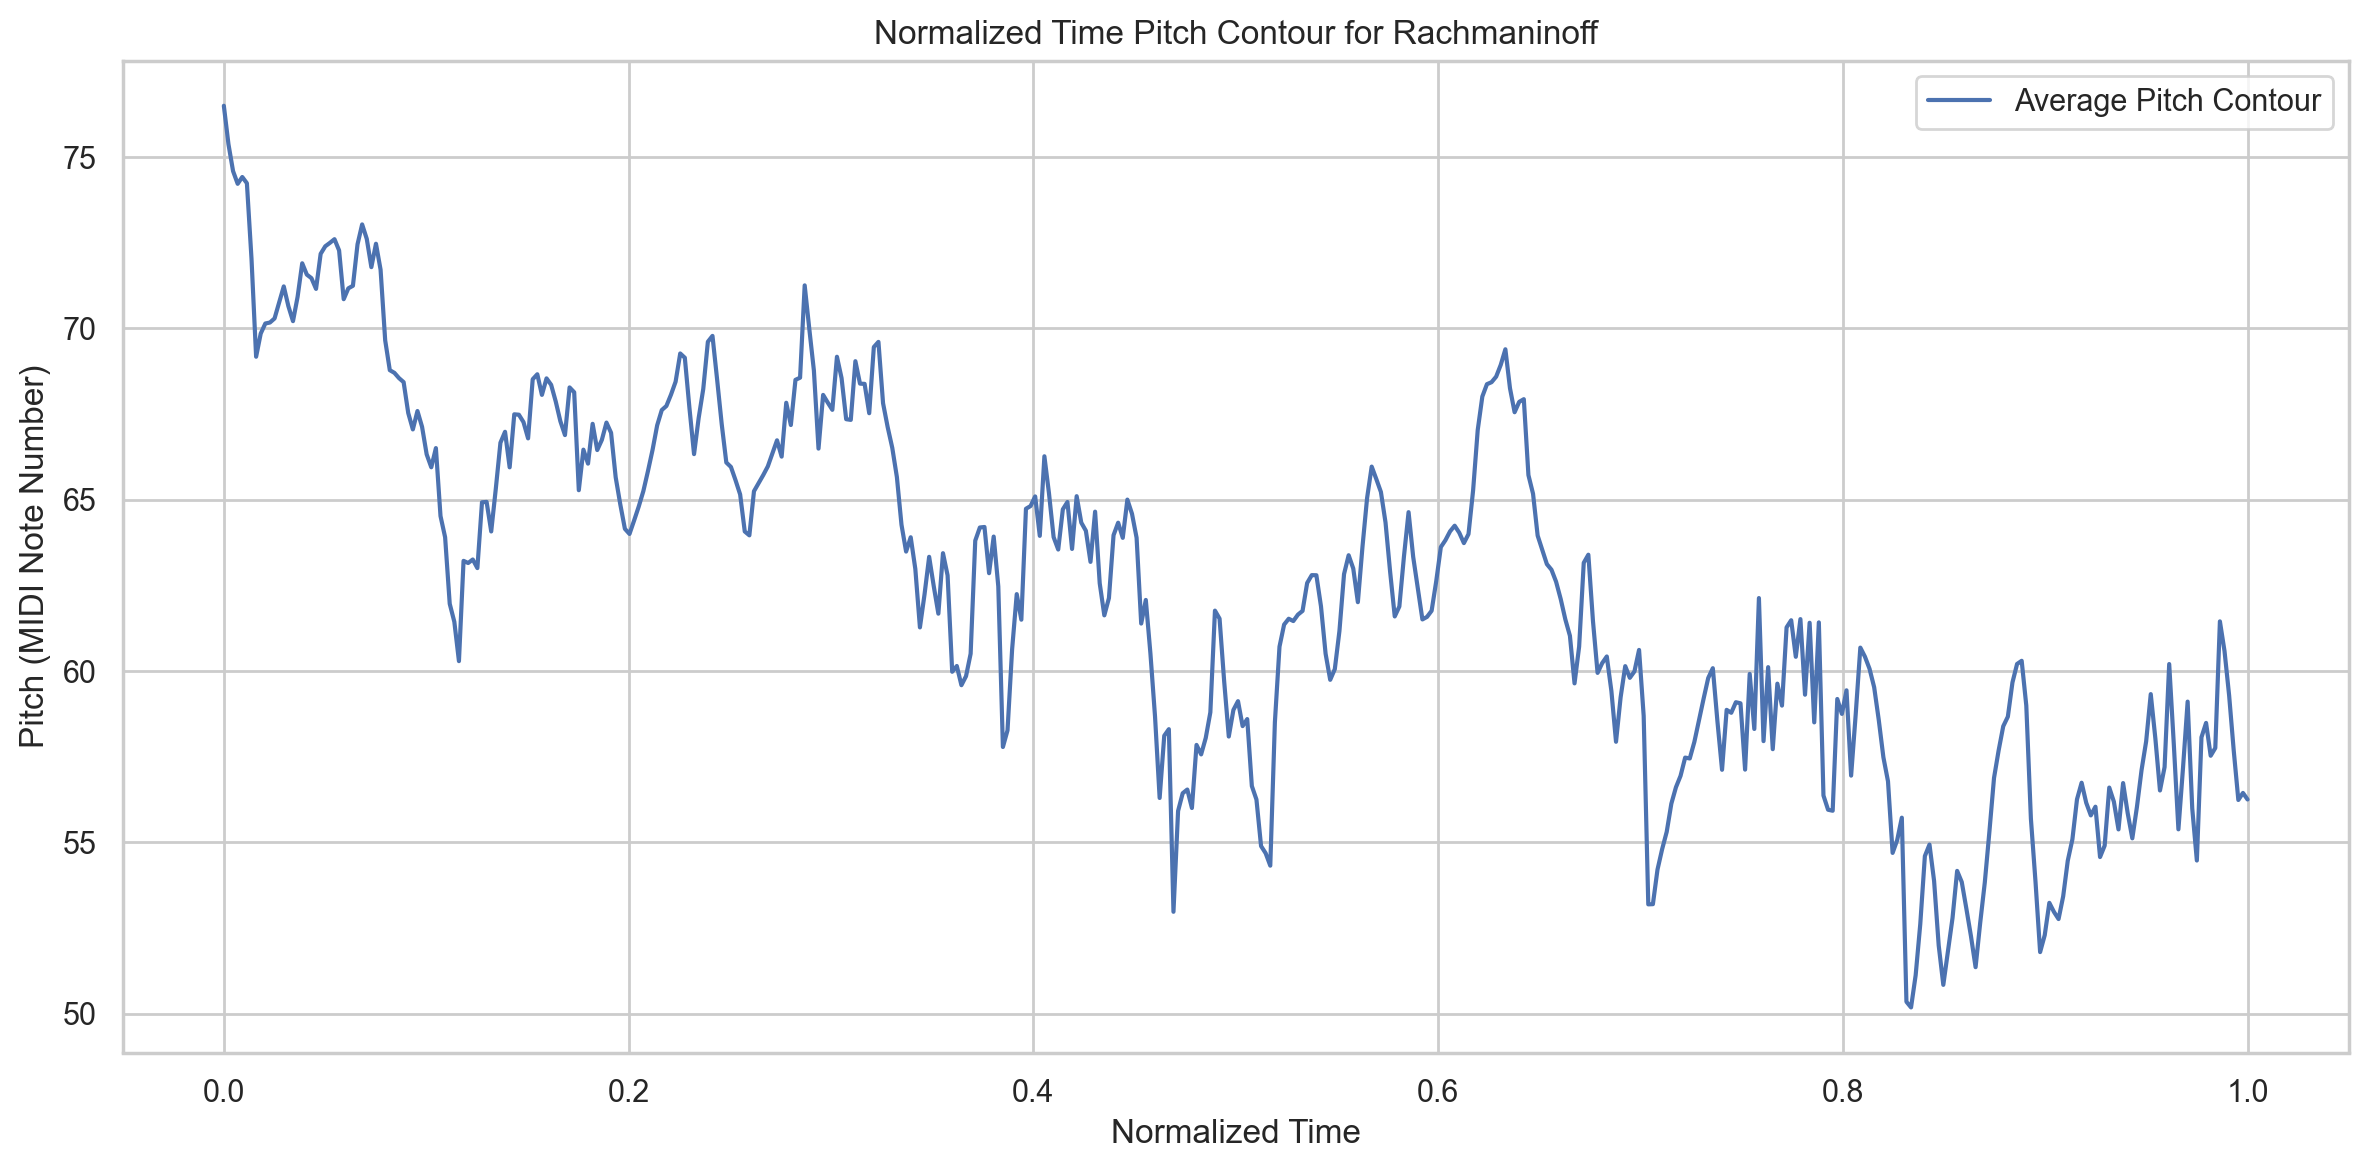

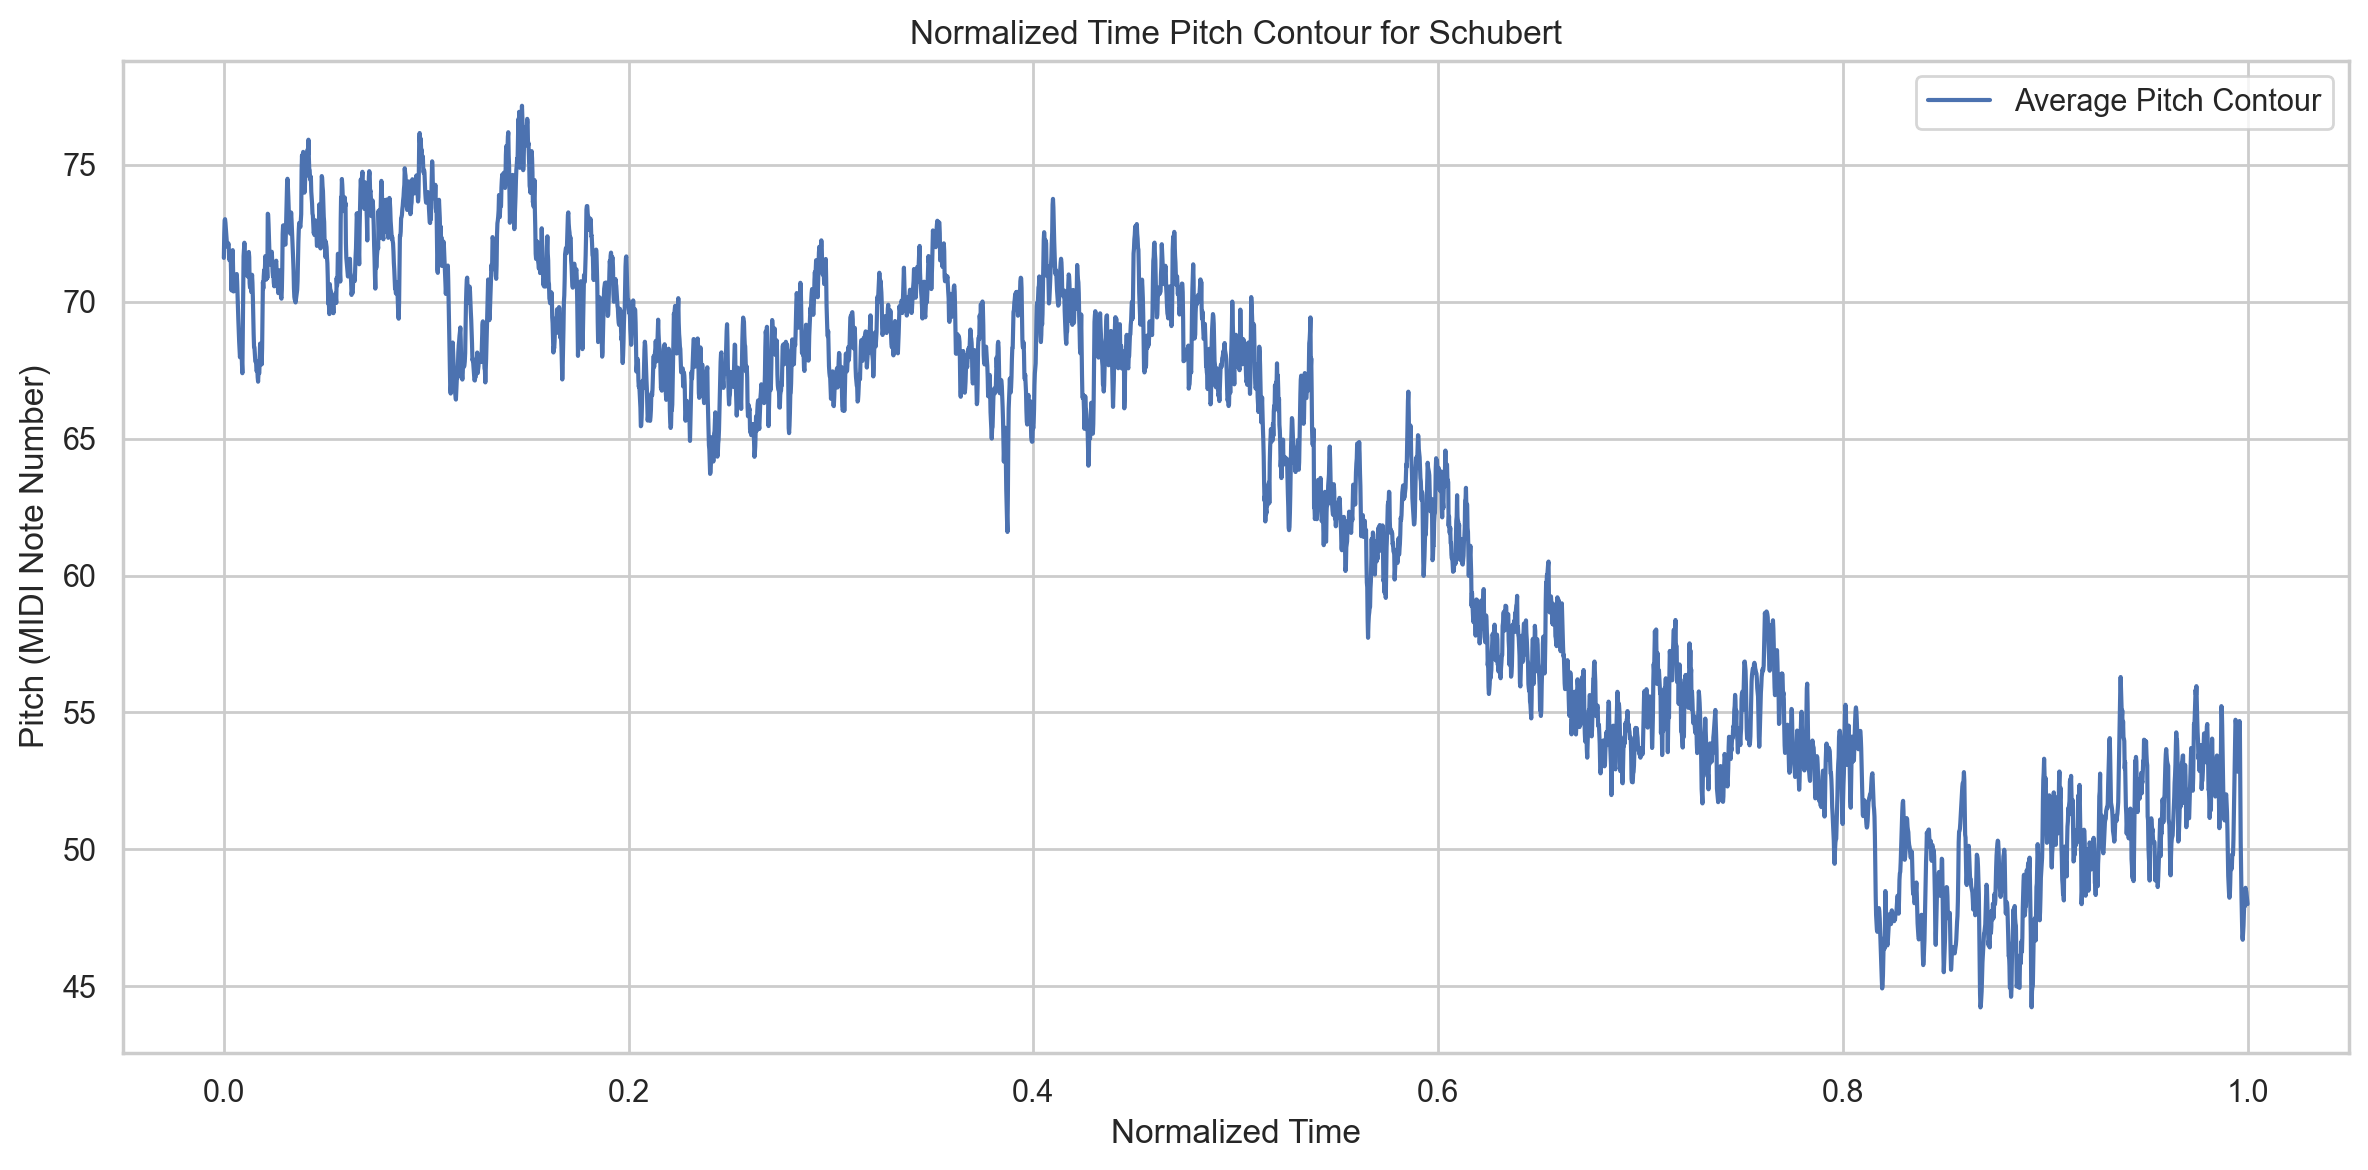

In [15]:
# 3. **Romantic** (around1820-1910):
#  Chopin, Liszt, Schumann, Brahms: Known for expressing personal emotions and musical innovation
#  Tchaikovsky, Rachmaninoff: Russian Romantic composer known for his richly melodic and deeply emotional music.
#  Schubert: Representative of early Romanticism, famous for his songs and piano music

Romantic_musician_paths = {
    'Chopin': './asap-dataset/Chopin/',
    'Liszt': './asap-dataset/Liszt/',
    # 'Schumann':'./asap-dataset/Schumann/', # There is a problem with some data
    'Brahms': './asap-dataset/Brahms',
    # 'Tchaikovsky':'./asap-dataset/Tchaikovsky/', # There is a problem with some data
    'Rachmaninoff': './asap-dataset/Rachmaninoff/',
    'Schubert': './asap-dataset/Schubert/'
}

for musician, path in Romantic_musician_paths.items():
    music_data = read_musicxml_and_normalize(path)
    title = f"Normalized Time Pitch Contour for {musician}"
    # plot_pitch_contours(music_data, title)
    plot_average_pitch_contours(music_data, title)
    # plot_cdf(music_data)

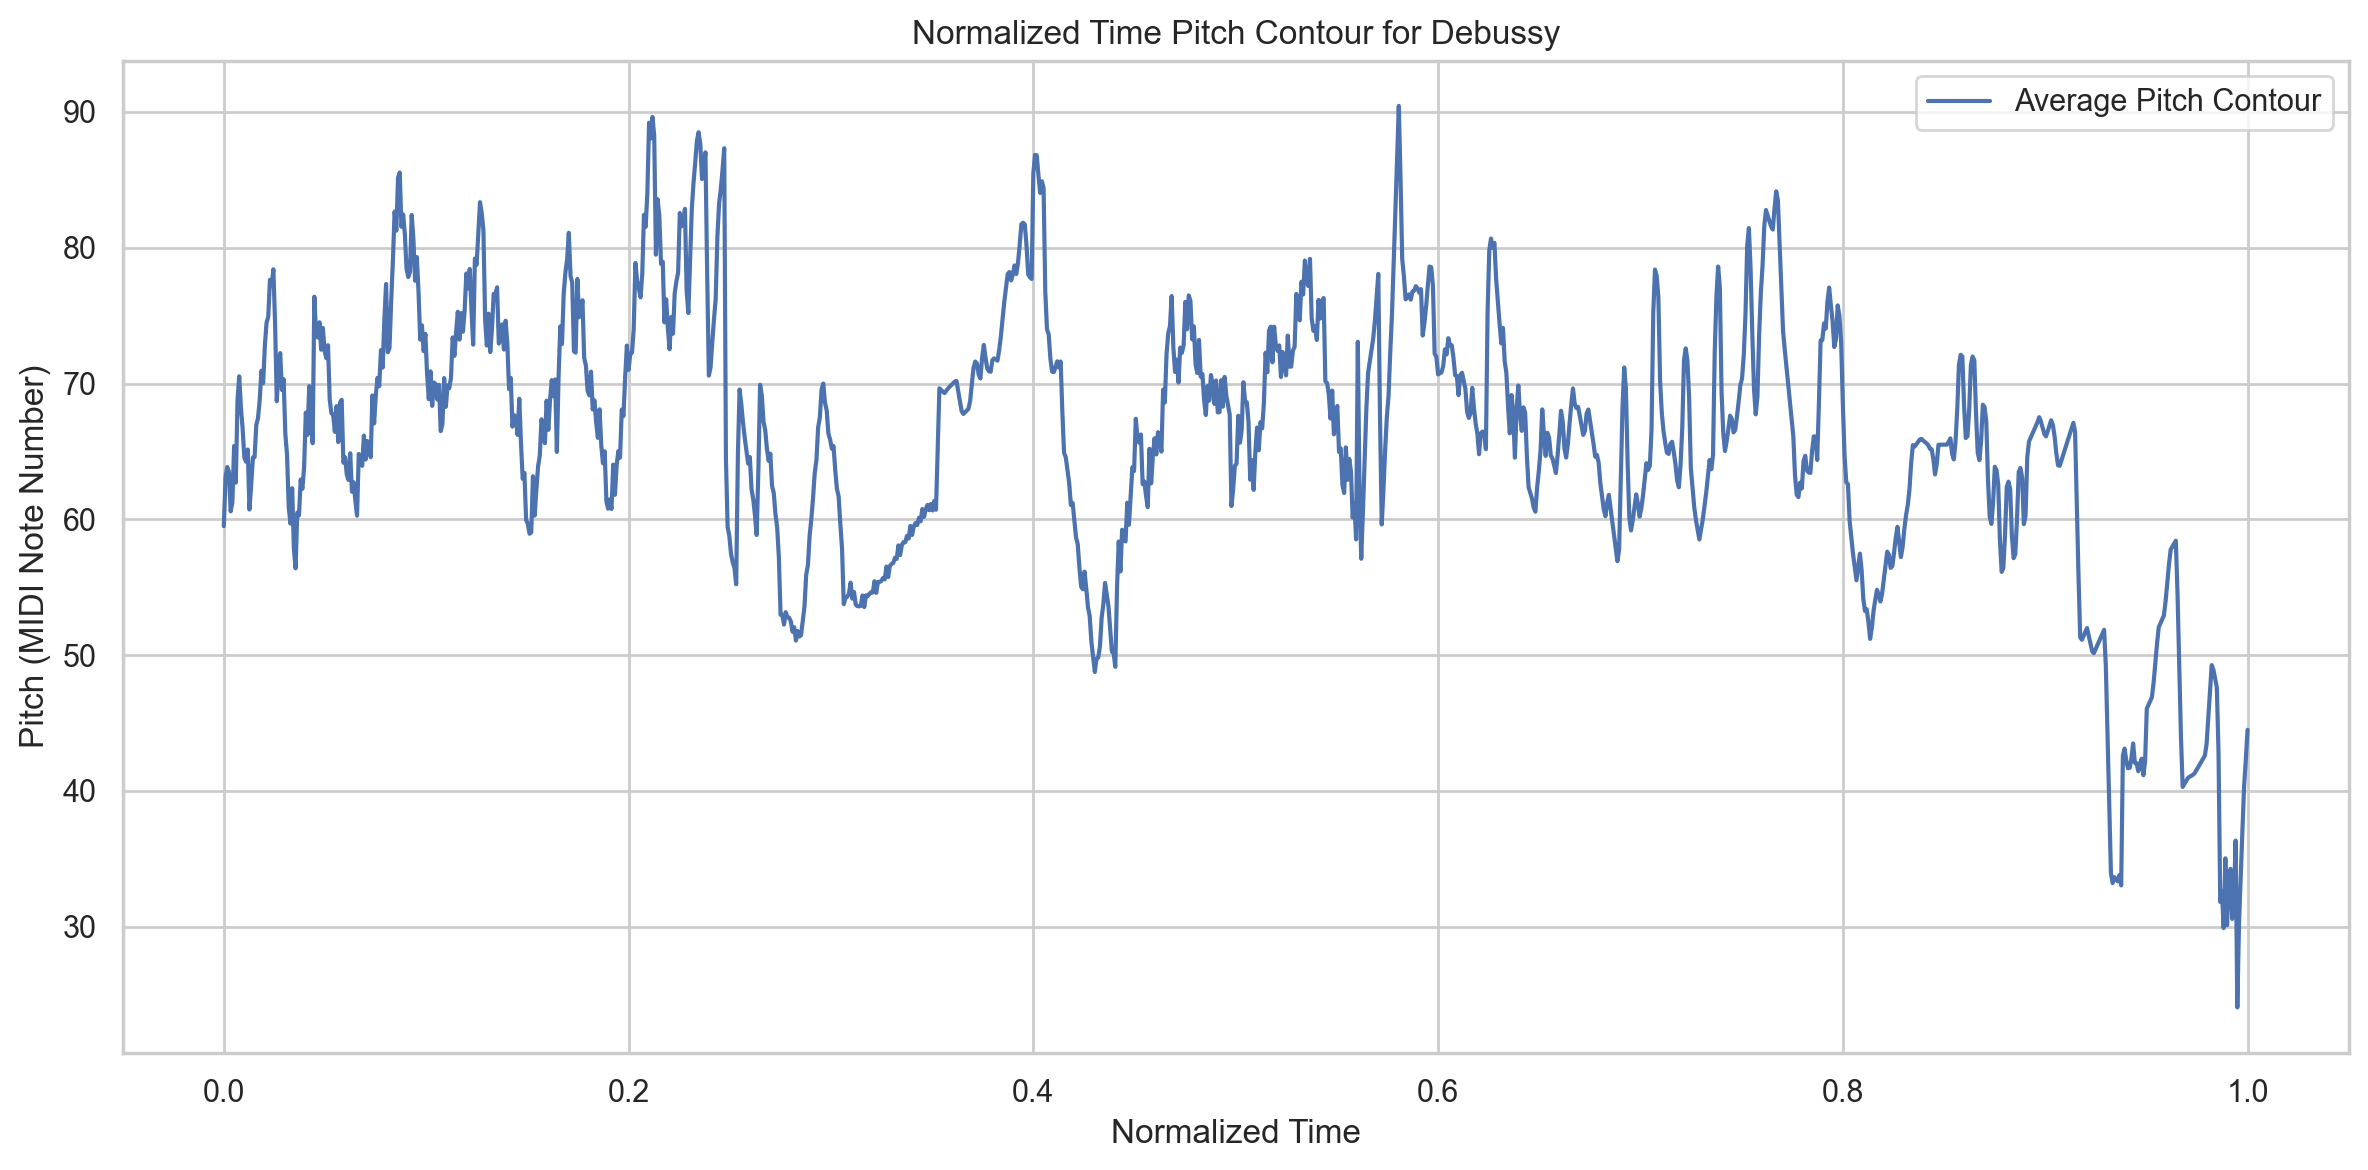

In [16]:
# 4. **Impressionist** (around1875-1925):
# Debussy: A pioneer of Impressionist music that emphasized timbre and bold harmonic innovation.

for musician, path in Impressionist_musician_paths.items():
    music_data = read_musicxml_and_normalize(path)
    title = f"Normalized Time Pitch Contour for {musician}"
    # plot_pitch_contours(music_data, title)
    plot_average_pitch_contours(music_data, title)
    # plot_cdf(music_data, title)

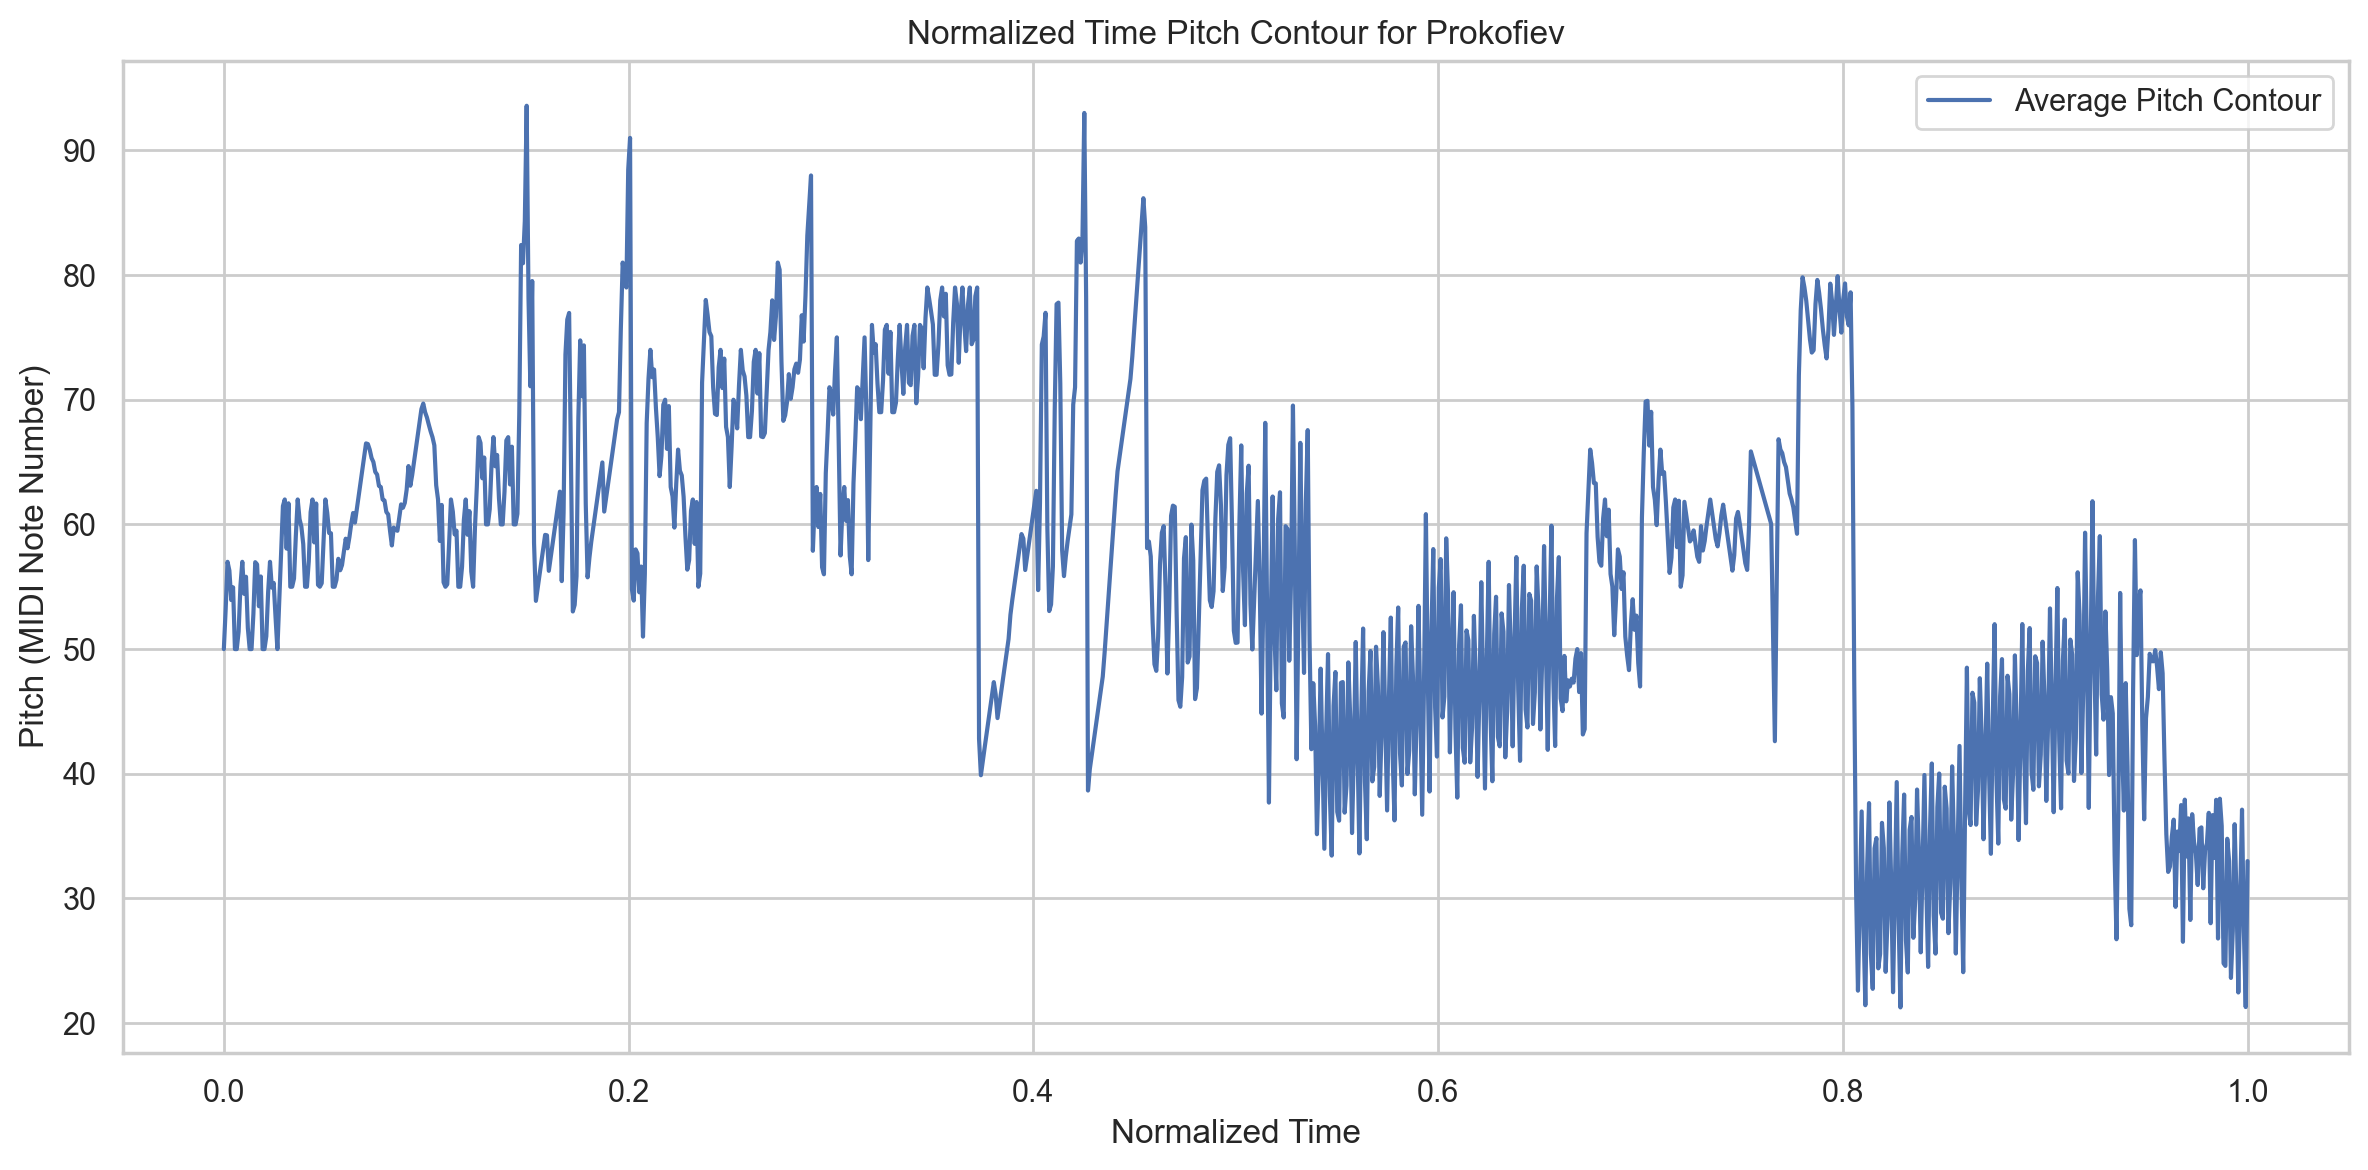

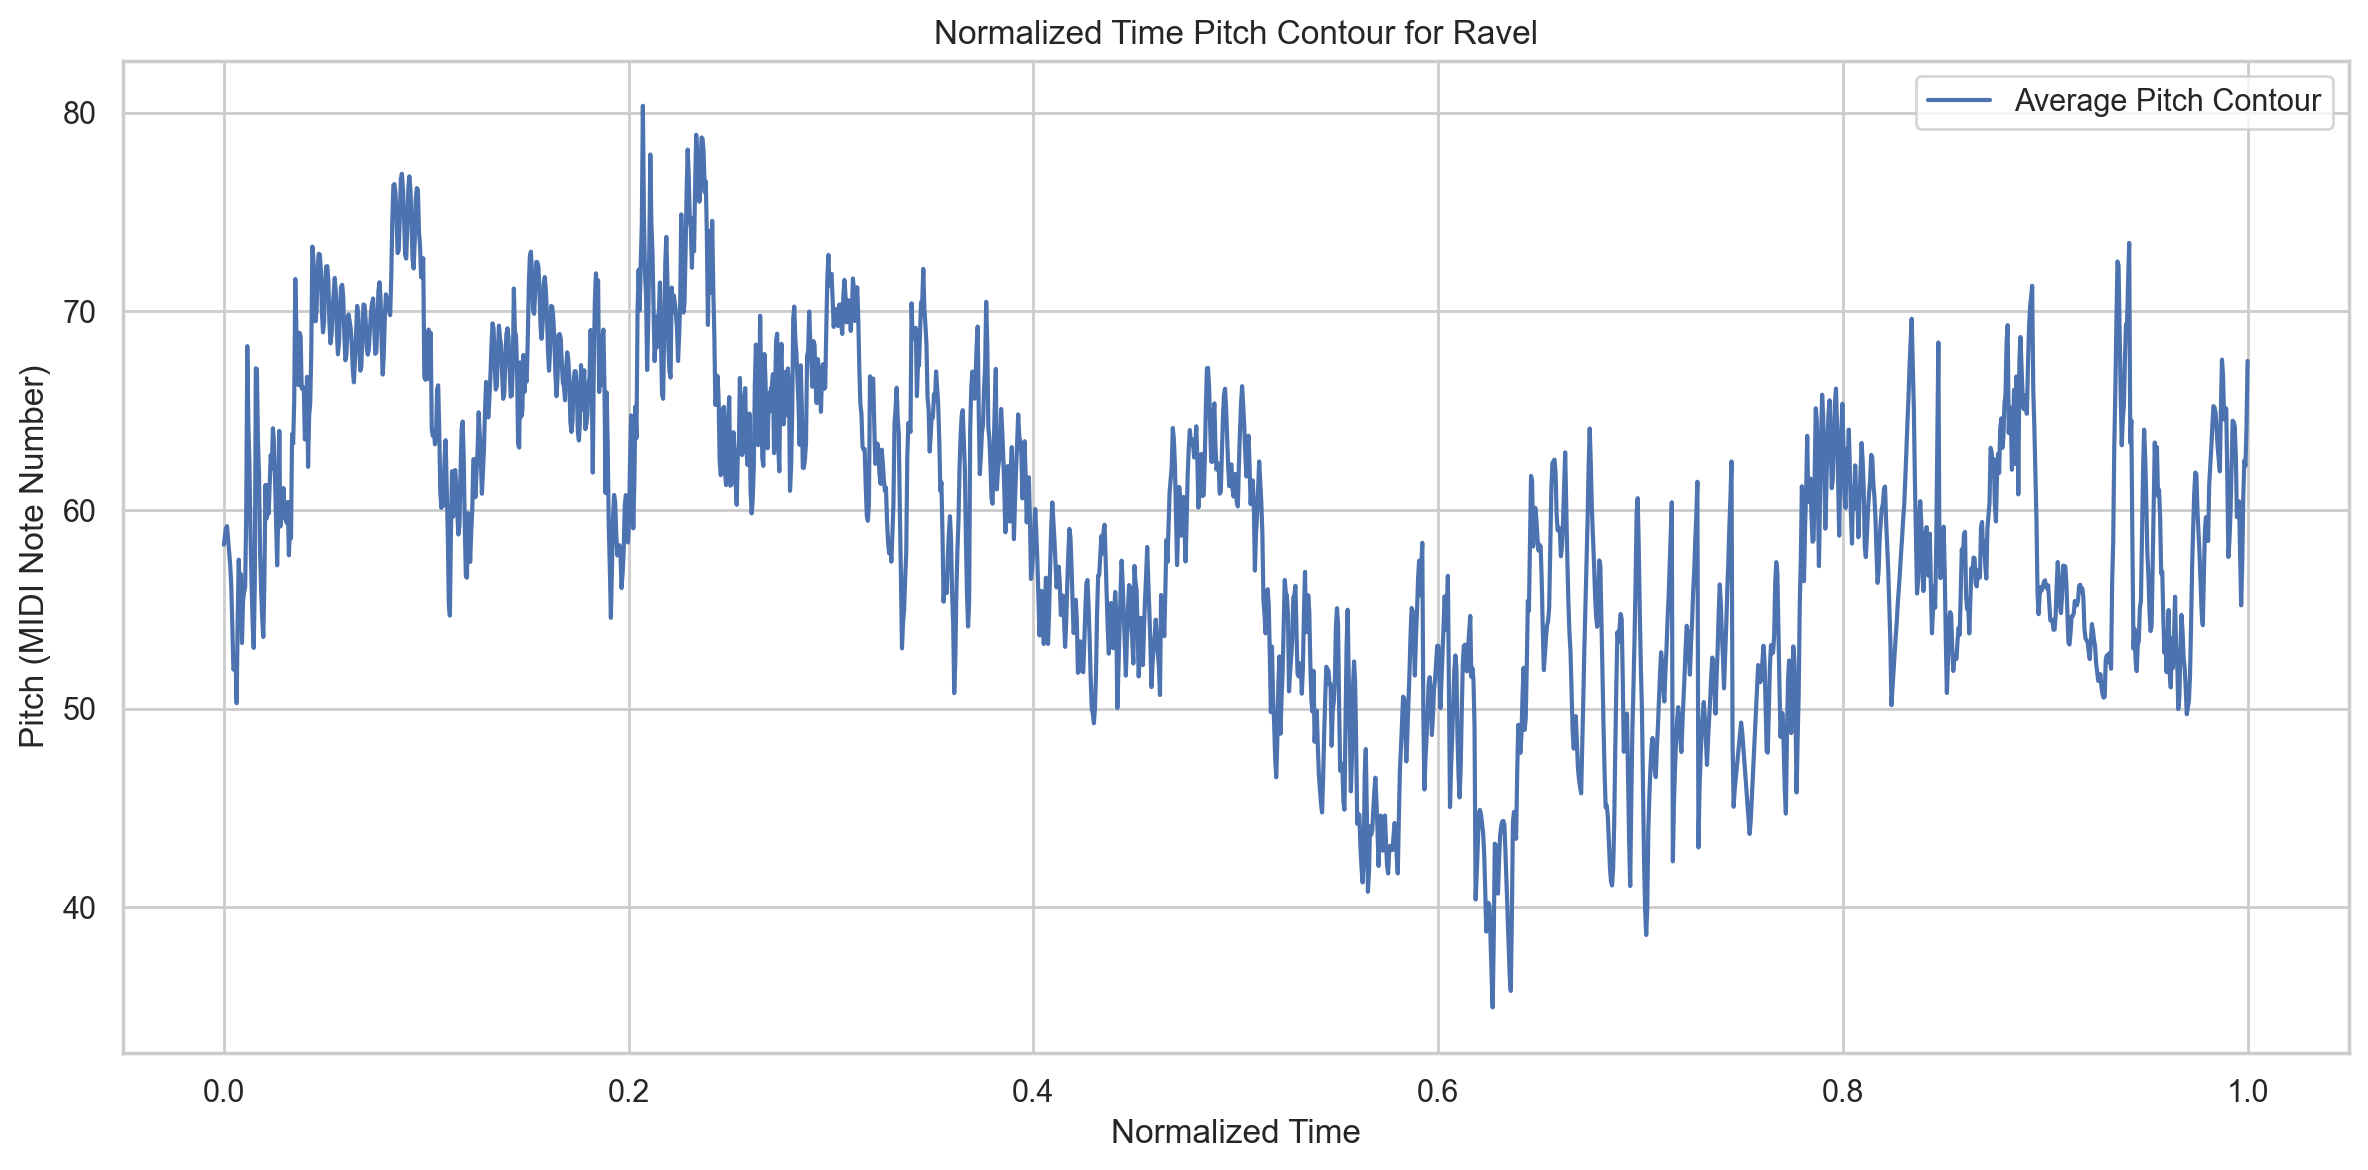

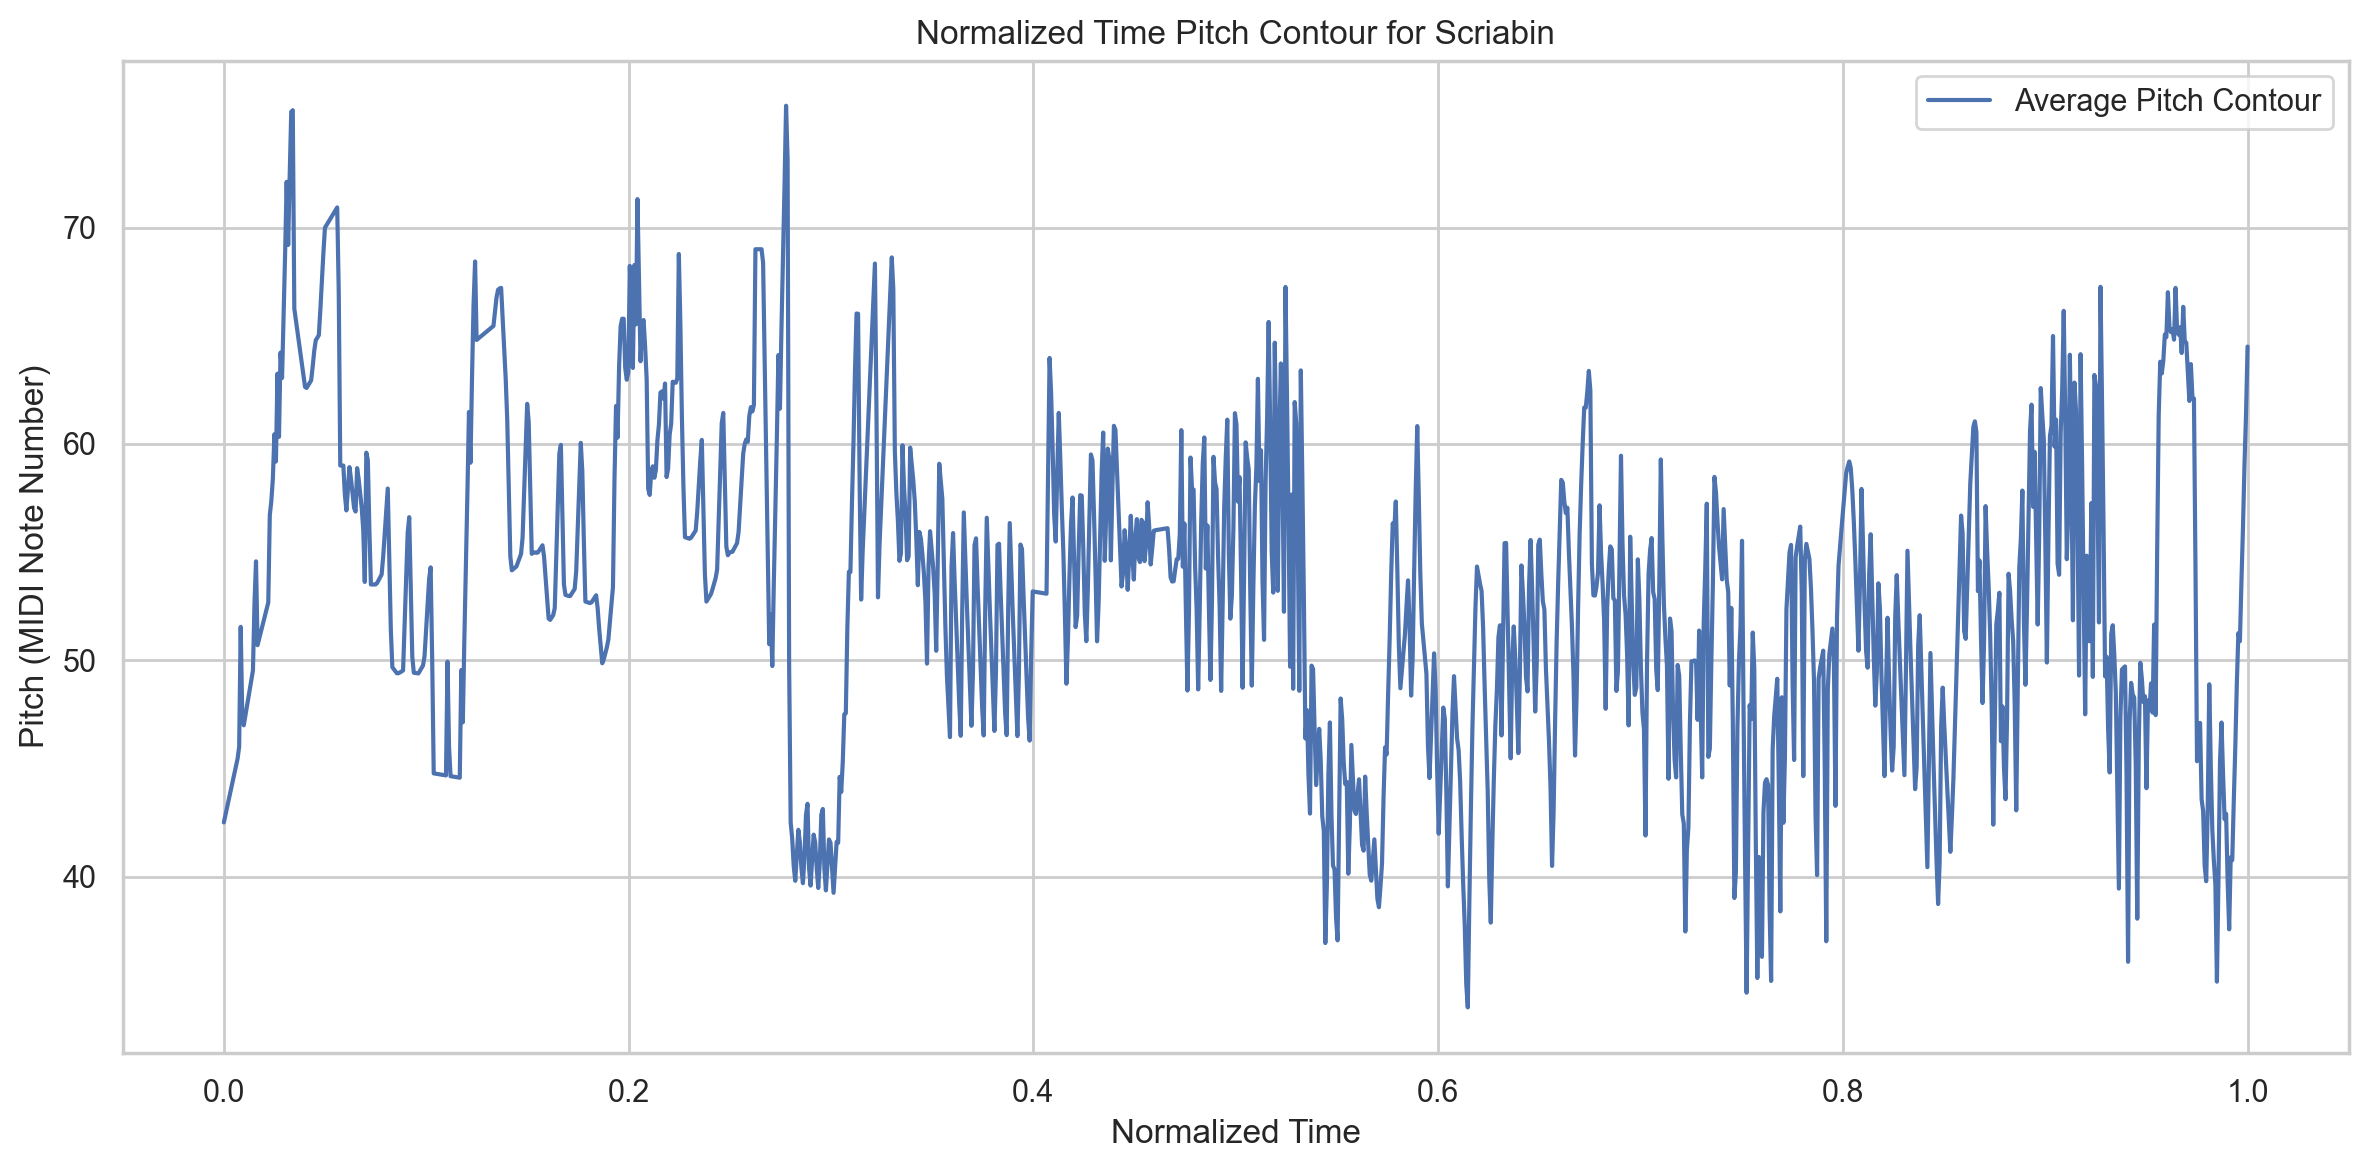

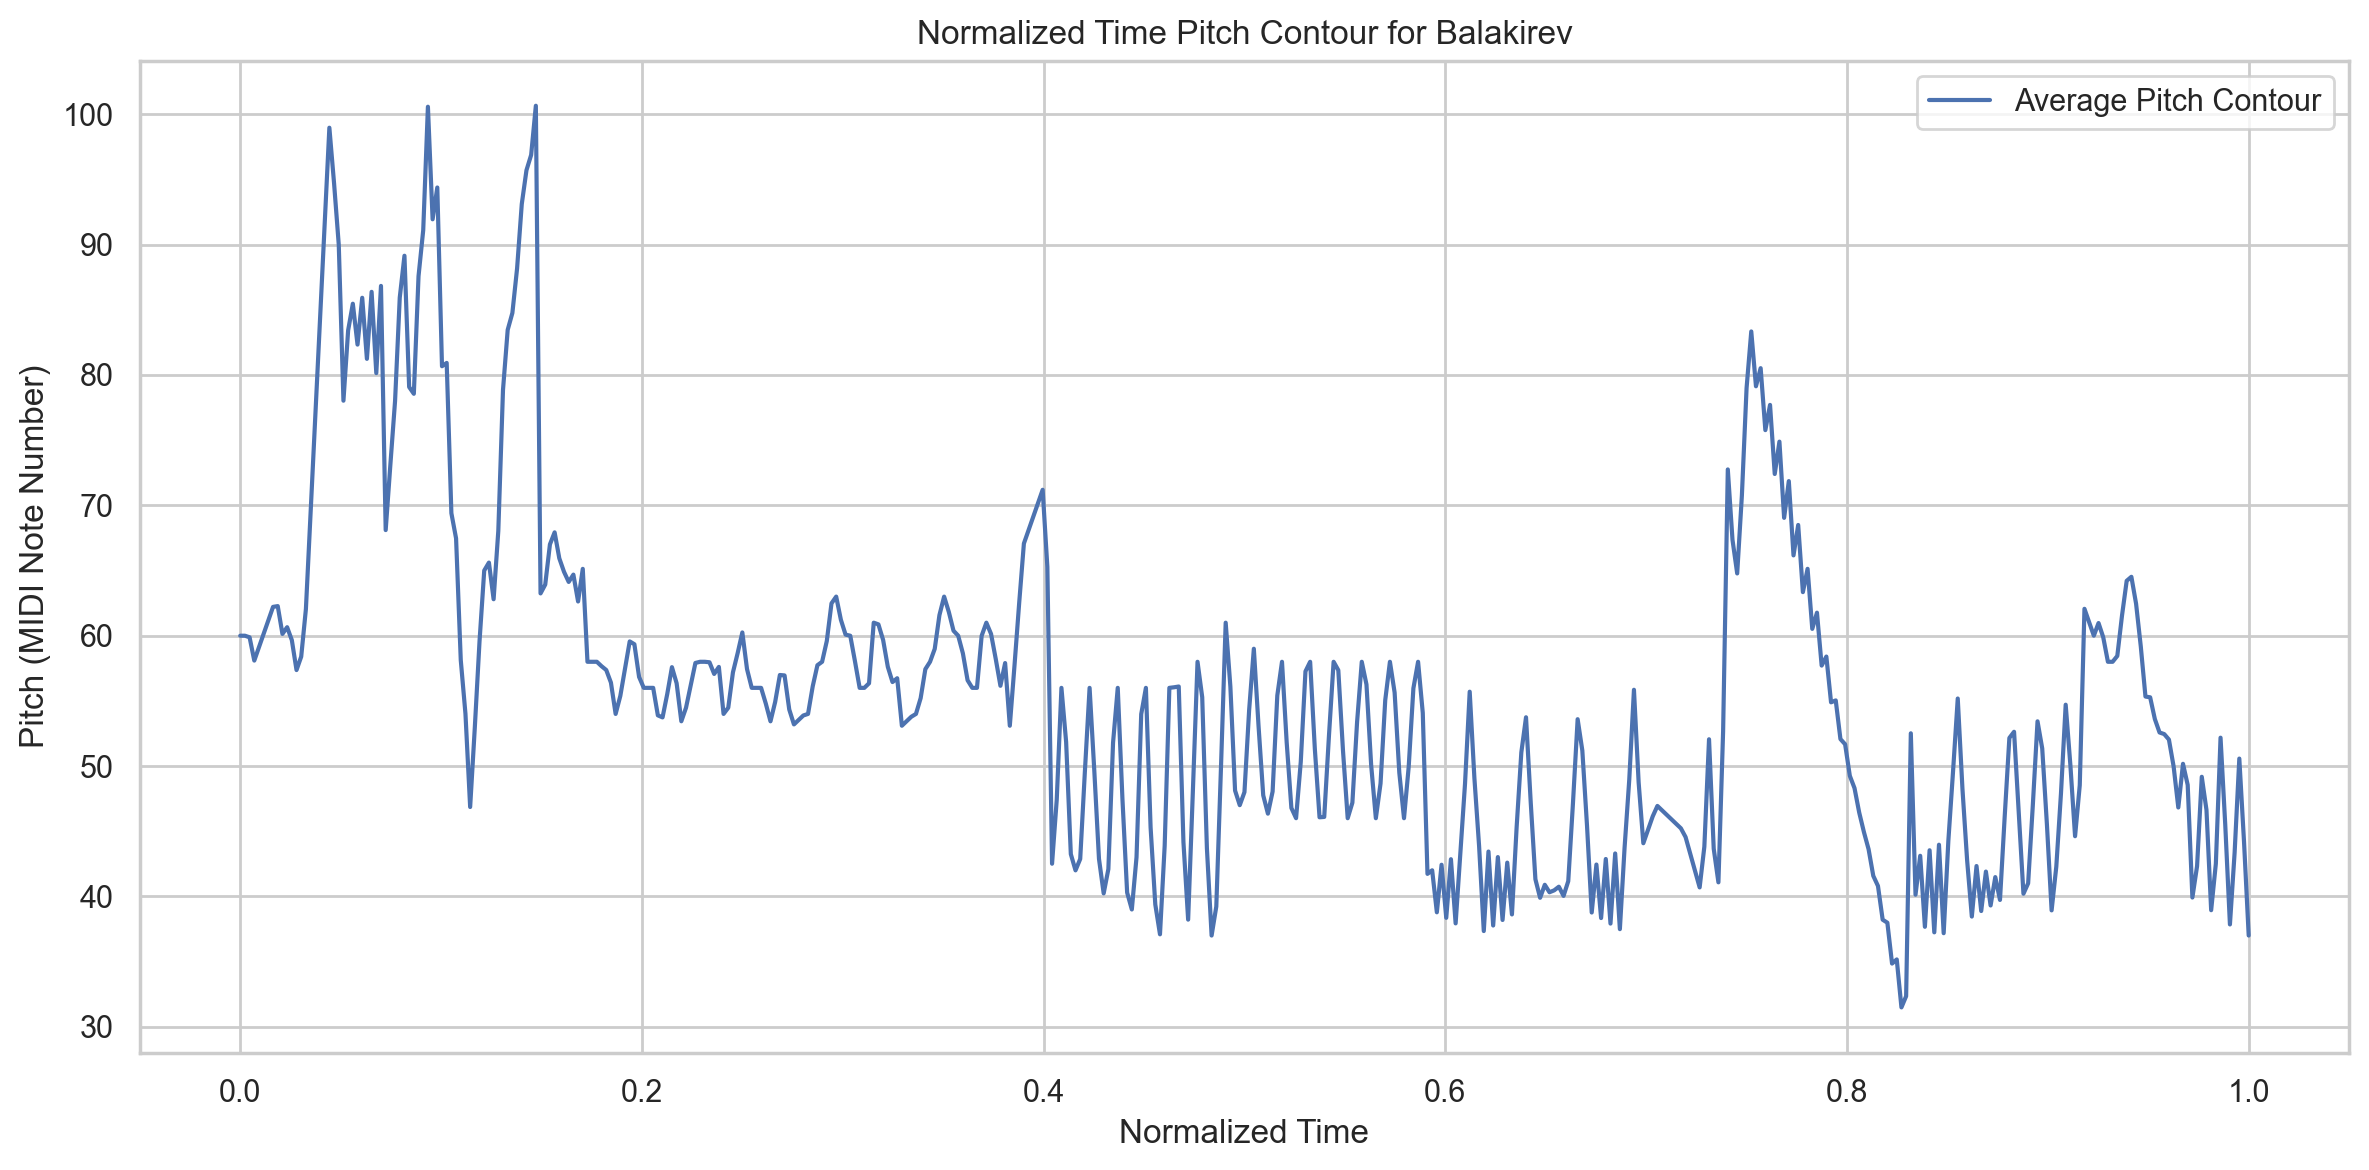

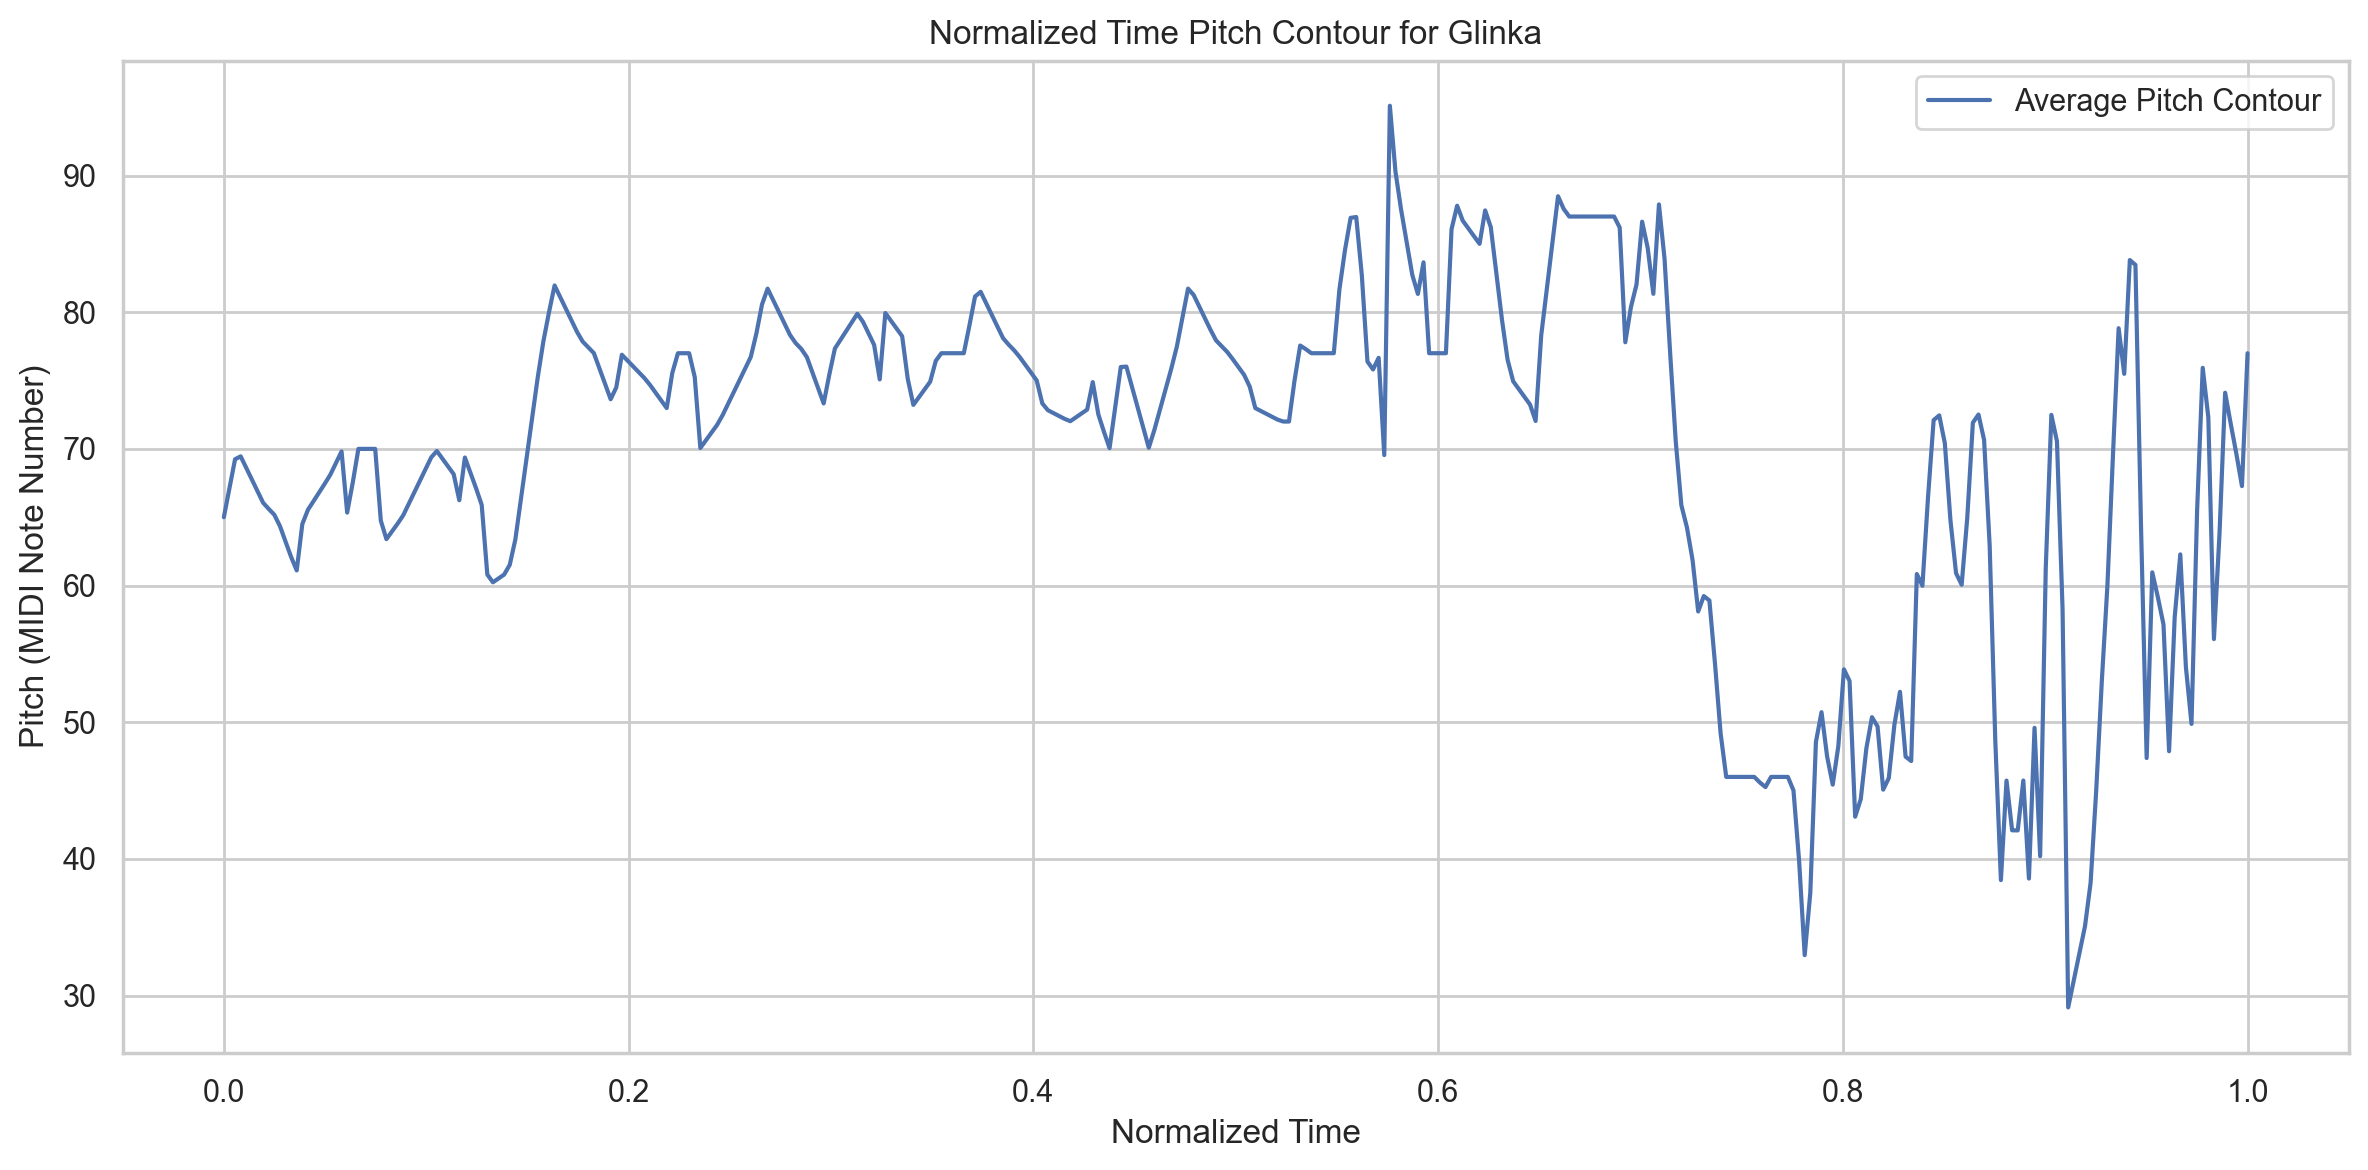

In [17]:
# 5. 20th century and modern music:
#  Prokofiev and Ravel: Their music often contains modernist features such as expanded harmonic and rhythmic complexity.
#  Scriabin: Innovative harmonic language and elements of mysticism.
#  Balakirev and Glinka : Important figure in Russian nationalist music.

for musician, path in Modern_musician_paths.items():
    music_data = read_musicxml_and_normalize(path)
    title = f"Normalized Time Pitch Contour for {musician}"
    # plot_pitch_contours(music_data, title)
    plot_average_pitch_contours(music_data, title)
    # plot_cdf(music_data, title)

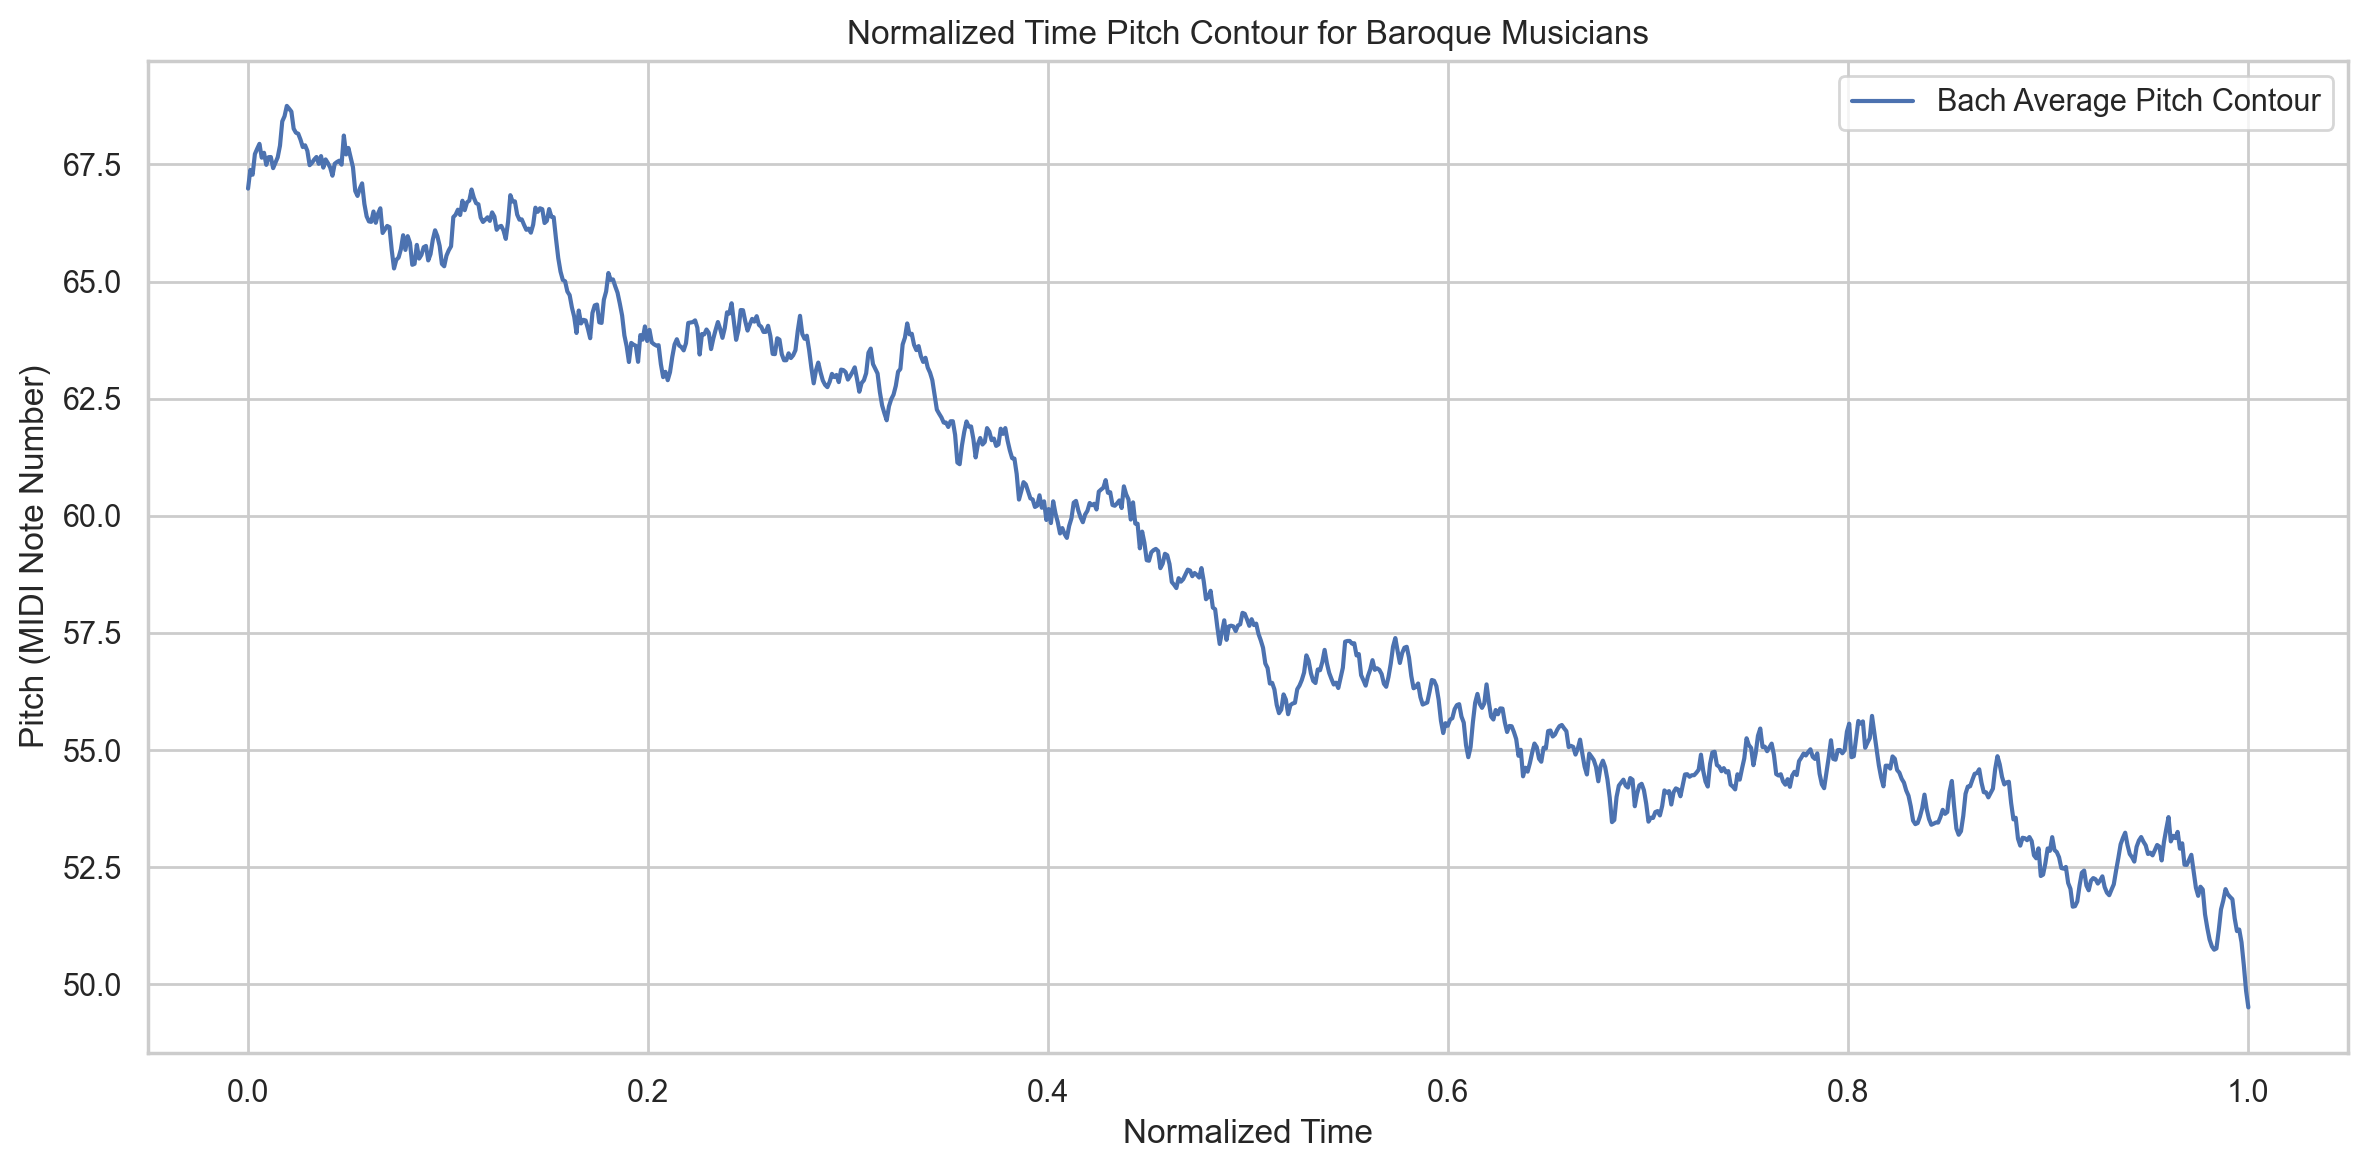

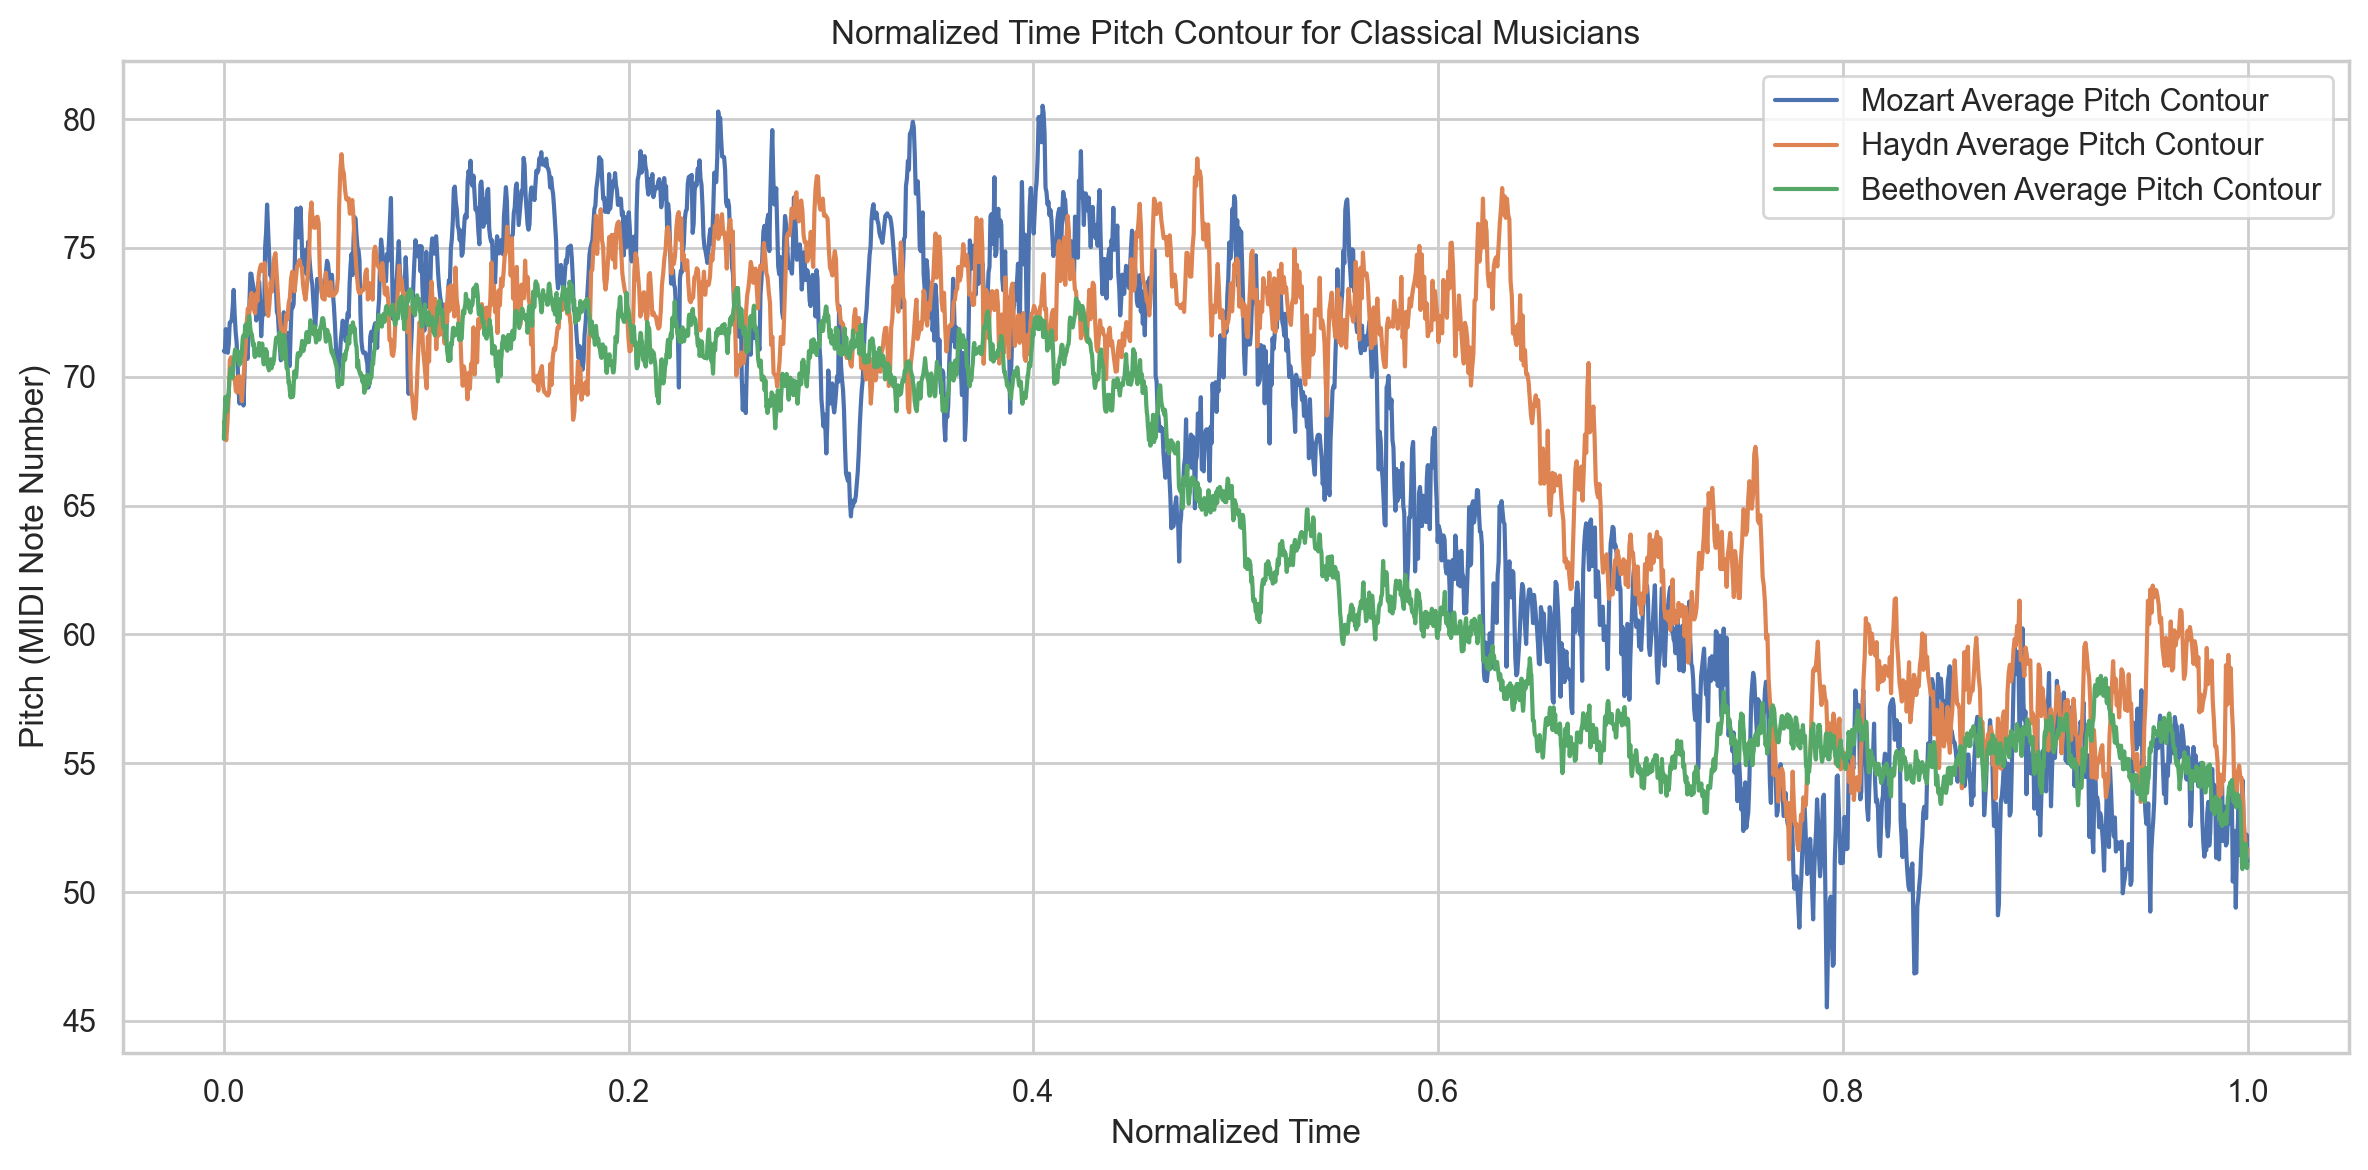

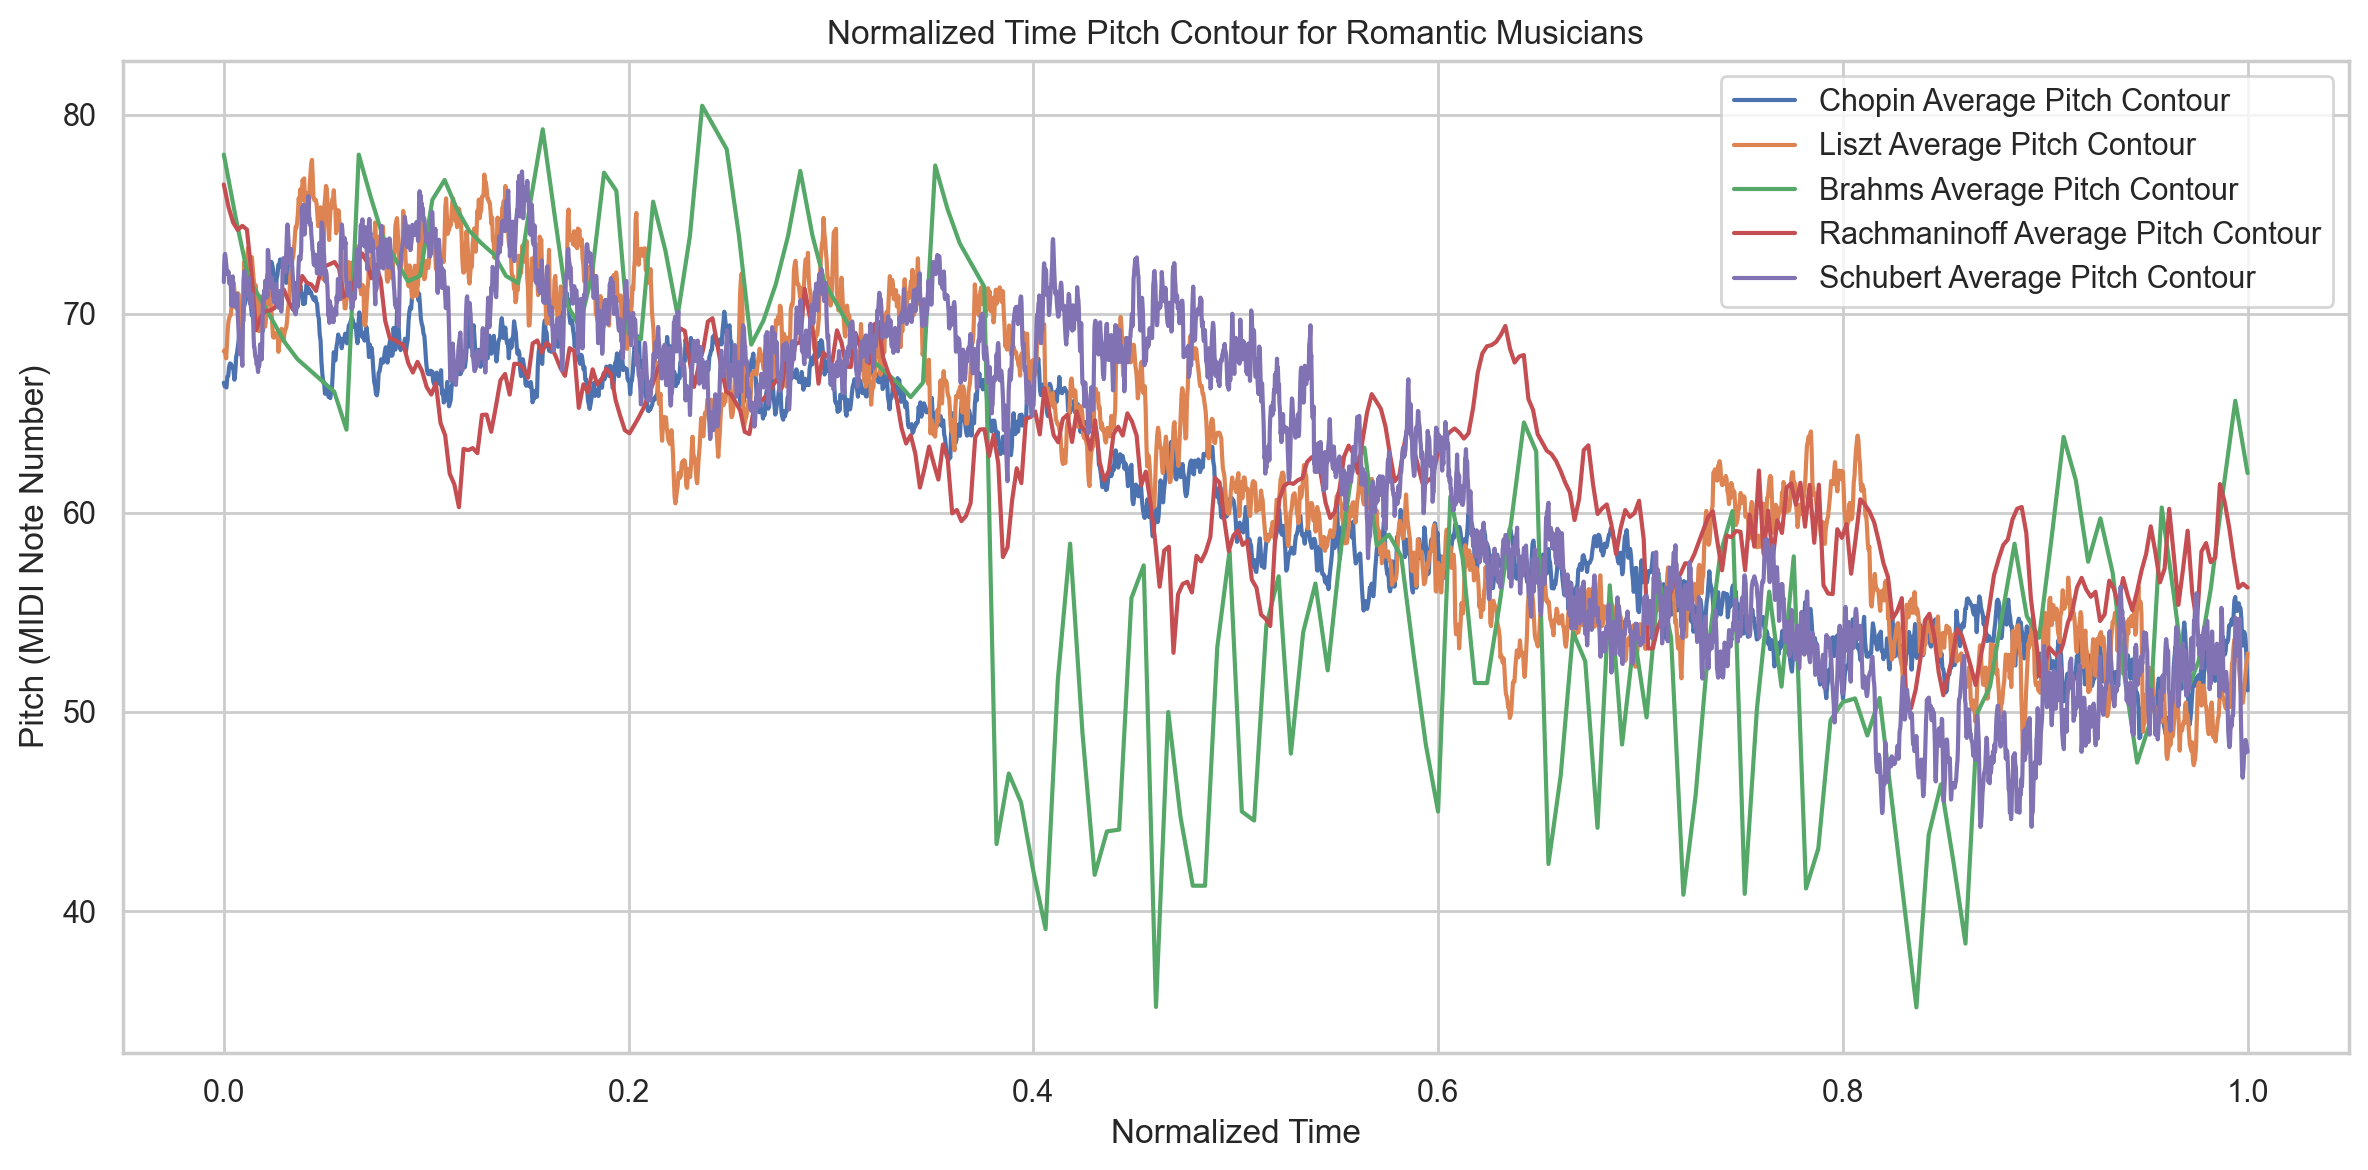

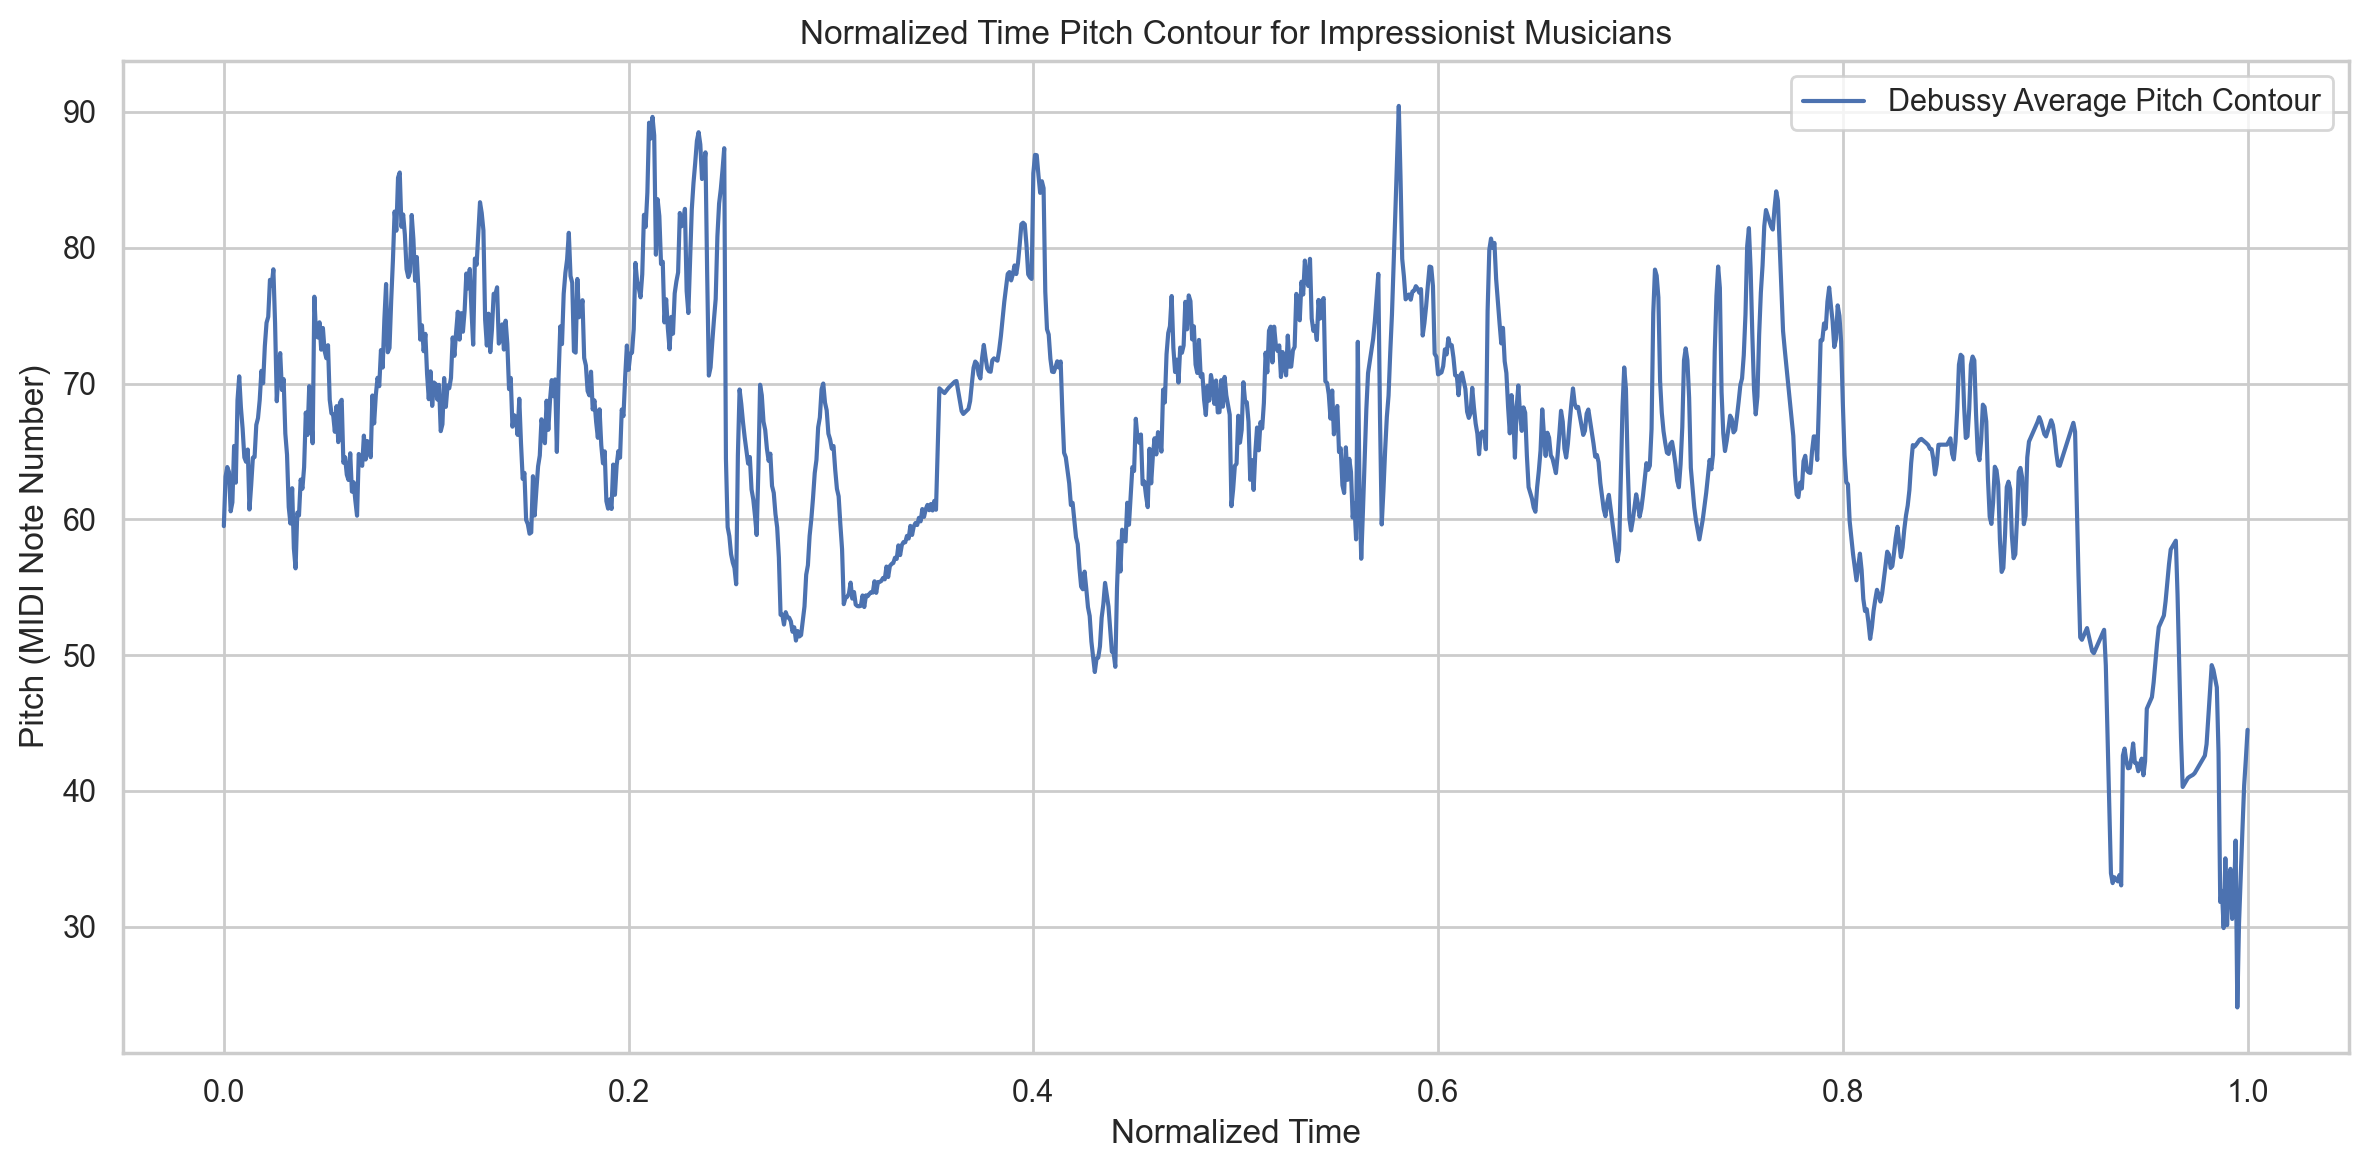

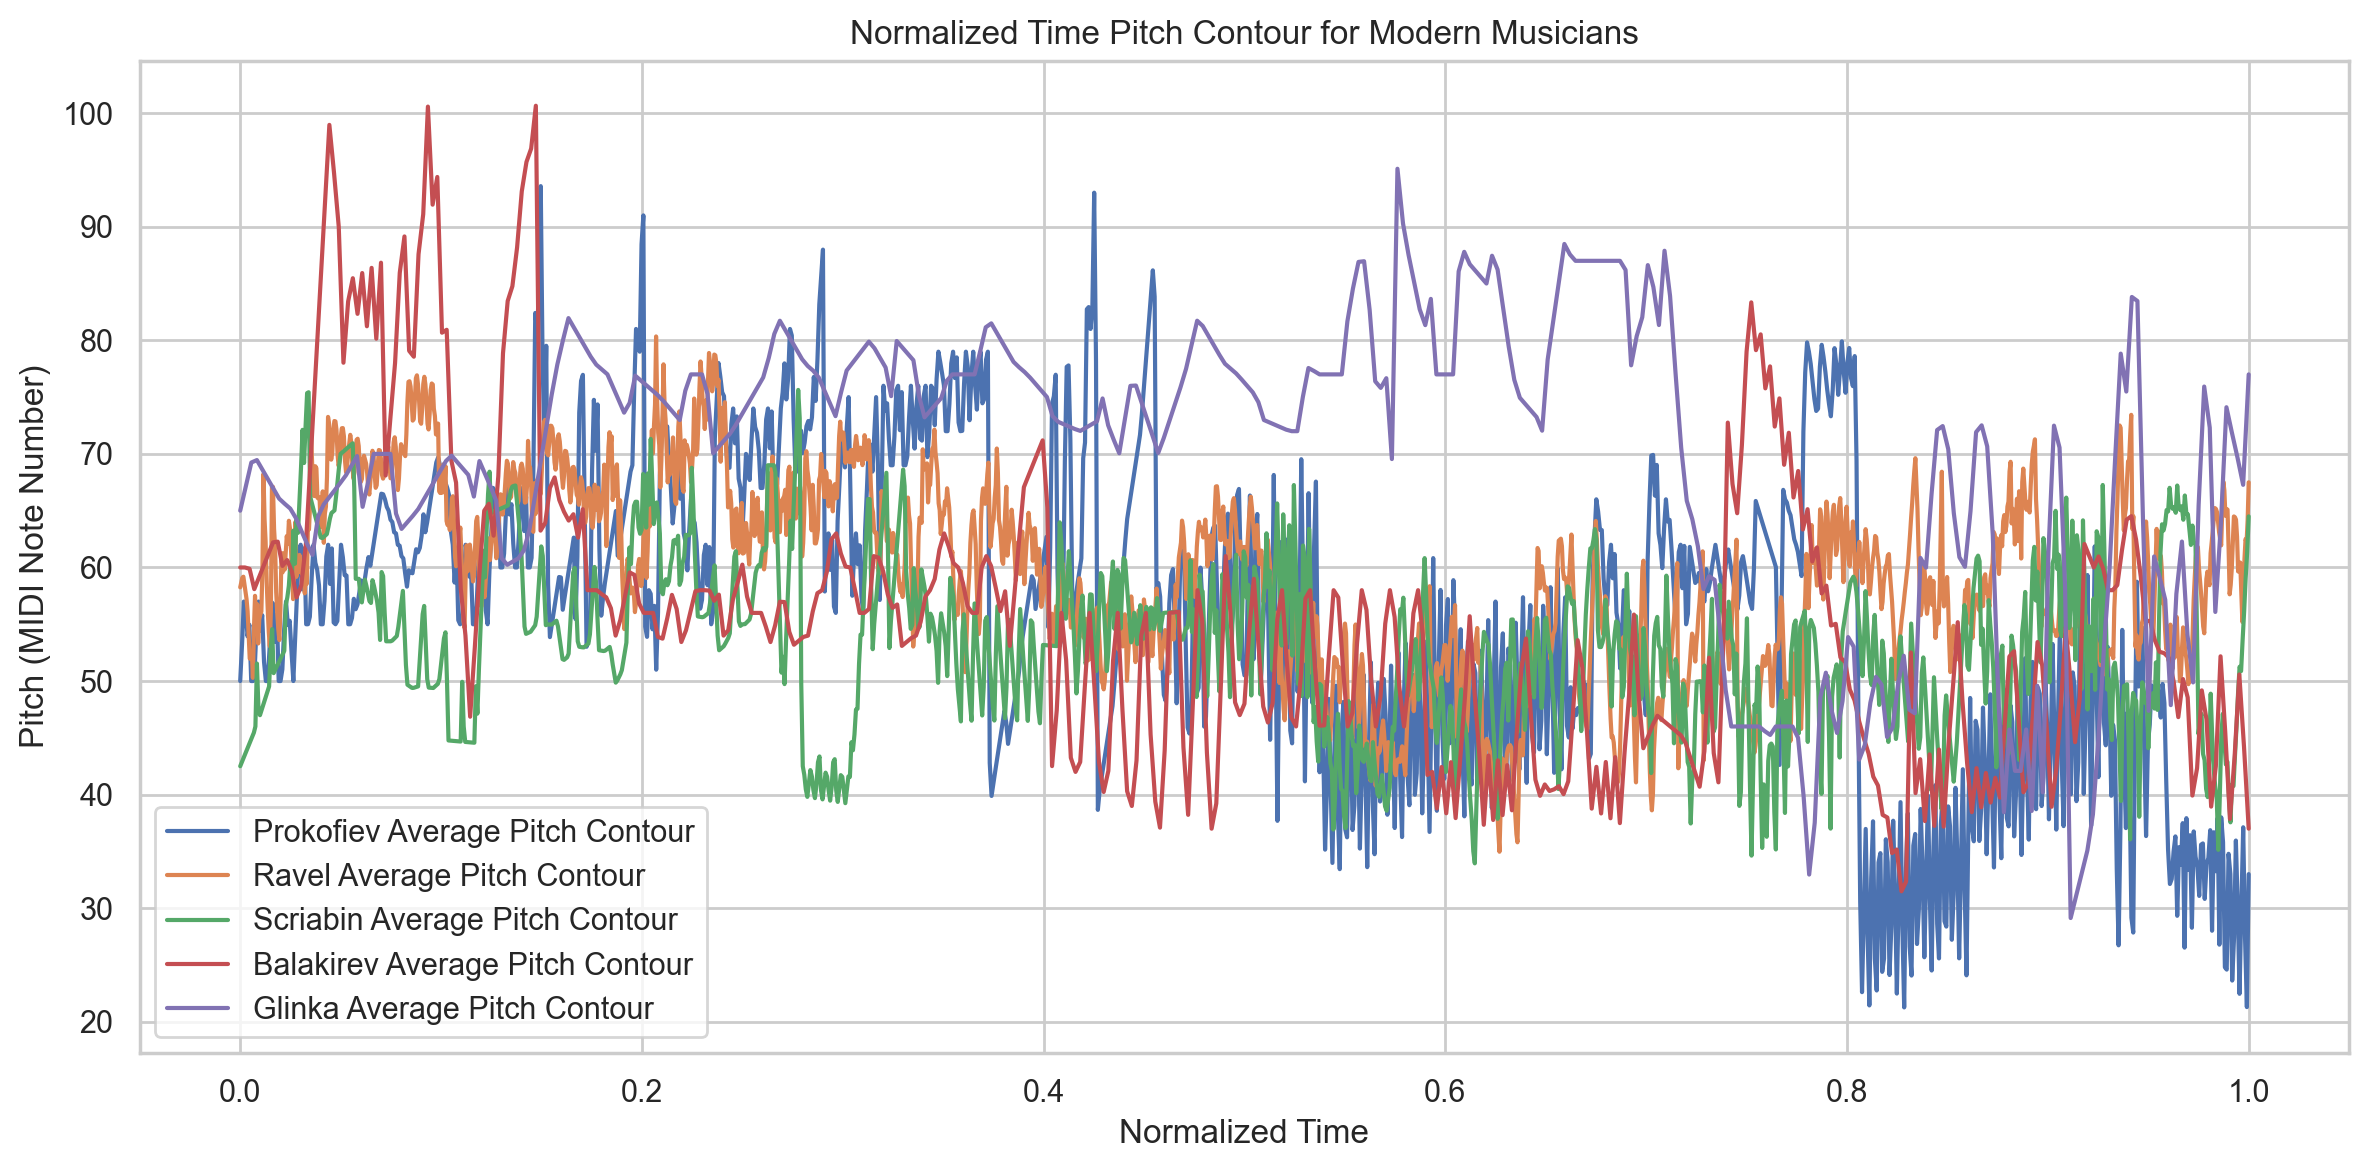

In [18]:
#  Draw an overall chart for each of the five periods
plot_musician_contours_for_era(Baroque_musician_paths, "Baroque")
plot_musician_contours_for_era(Classical_musician_paths, "Classical")
plot_musician_contours_for_era(Romantic_musician_paths, "Romantic")
plot_musician_contours_for_era(Impressionist_musician_paths, "Impressionist")
plot_musician_contours_for_era(Modern_musician_paths, "Modern")

In [19]:
# The tendency for pitches to go from high to low may be related to several musical theories and compositional practices:
# Musical form and structure: Many Western classical music works, especially longer works, often set a high-pitched theme at the beginning to attract the audience's attention. Subsequently, the concert gradually shifted to the mid-bass range to create a sense of ending, reflecting the overall "succession, transition, and integration" of the work.
# Melody tension and release: In classical music, melody is often constructed through tension in the high register and release in the mid-bass. This writing technique of starting on a high note and resolving to a lower range reflects the tension-relaxation principle common in Western music.
# Voice direction: According to Schenkerian analysis, many musical works follow a downward movement from treble to bass in deeper structure. This downward movement is regarded as the skeleton of music.
# Emotional trajectory of the piece: Many pieces follow a similar pattern in emotional expression, resulting in a melodic contour that rises and then falls, corresponding to the build-up and relief of emotional climaxes
# Quantitative analysis of different schools
# Information for entropy analysis: 
# Calculate the entropy value of pitch distribution to evaluate the predictability and diversity of pitch content in musical works. 
# Low entropy values may indicate a more homogeneous use of pitches
# while high entropy values may indicate more diverse pitches.


In [20]:
# For every musician
for musician, path in Baroque_musician_paths.items():
    music_data = read_musicxml_and_normalize(path)
    entropy_results, average_entropy = calculate_entropy(music_data)
    print('Baroque_musicians -', musician, ":", average_entropy)

for musician, path in Classical_musician_paths.items():
    music_data = read_musicxml_and_normalize(path)
    entropy_results, average_entropy = calculate_entropy(music_data)
    print('Classical_musician -', musician, ":", average_entropy)

for musician, path in Romantic_musician_paths.items():
    music_data = read_musicxml_and_normalize(path)
    entropy_results, average_entropy = calculate_entropy(music_data)
    print('Romantic_musician -', musician, ":", average_entropy)

for musician, path in Impressionist_musician_paths.items():
    music_data = read_musicxml_and_normalize(path)
    entropy_results, average_entropy = calculate_entropy(music_data)
    print('Impressionist_musician -', musician, ":", average_entropy)

for musician, path in Modern_musician_paths.items():
    music_data = read_musicxml_and_normalize(path)
    entropy_results, average_entropy = calculate_entropy(music_data)
    print('Modern_musician -', musician, ":", average_entropy)

Baroque_musicians - Bach : 4.327673069077242
Classical_musician - Mozart : 4.93992574458247
Classical_musician - Haydn : 4.851194155608867
Classical_musician - Beethoven : 5.037071295078586
Romantic_musician - Chopin : 4.8891210388451345
Romantic_musician - Liszt : 5.052926176673668
Romantic_musician - Brahms : 4.779974832070843
Romantic_musician - Rachmaninoff : 3.764945088633202
Romantic_musician - Schubert : 4.857104483689983
Impressionist_musician - Debussy : 5.199122685620789
Modern_musician - Prokofiev : 5.533239315404982
Modern_musician - Ravel : 5.084330680137579
Modern_musician - Scriabin : 5.044663931498461
Modern_musician - Balakirev : 4.828692927943339
Modern_musician - Glinka : 5.079302103803946


In [21]:
from task_b.constants import all_musician_paths, era_musician_paths

# Merge musician data(in the same period)
merged_music_data = merge_music_data_by_era(all_musician_paths, era_musician_paths)
print(merged_music_data.keys())

# Check entropy for different period
for era, data in merged_music_data.items():
    pitch_counts = np.bincount(data['pitches'])
    entropy_value = entropy(pitch_counts, base=2)
    print("entropy of ", era, ":", entropy_value)

dict_keys(['Baroque', 'Classical', 'Romantic', 'Impressionist', 'Modern'])
entropy of  Baroque : 5.312316589099355
entropy of  Classical : 5.709862310293095
entropy of  Romantic : 5.92592138262951
entropy of  Impressionist : 5.64704708945013
entropy of  Modern : 5.917682724322367


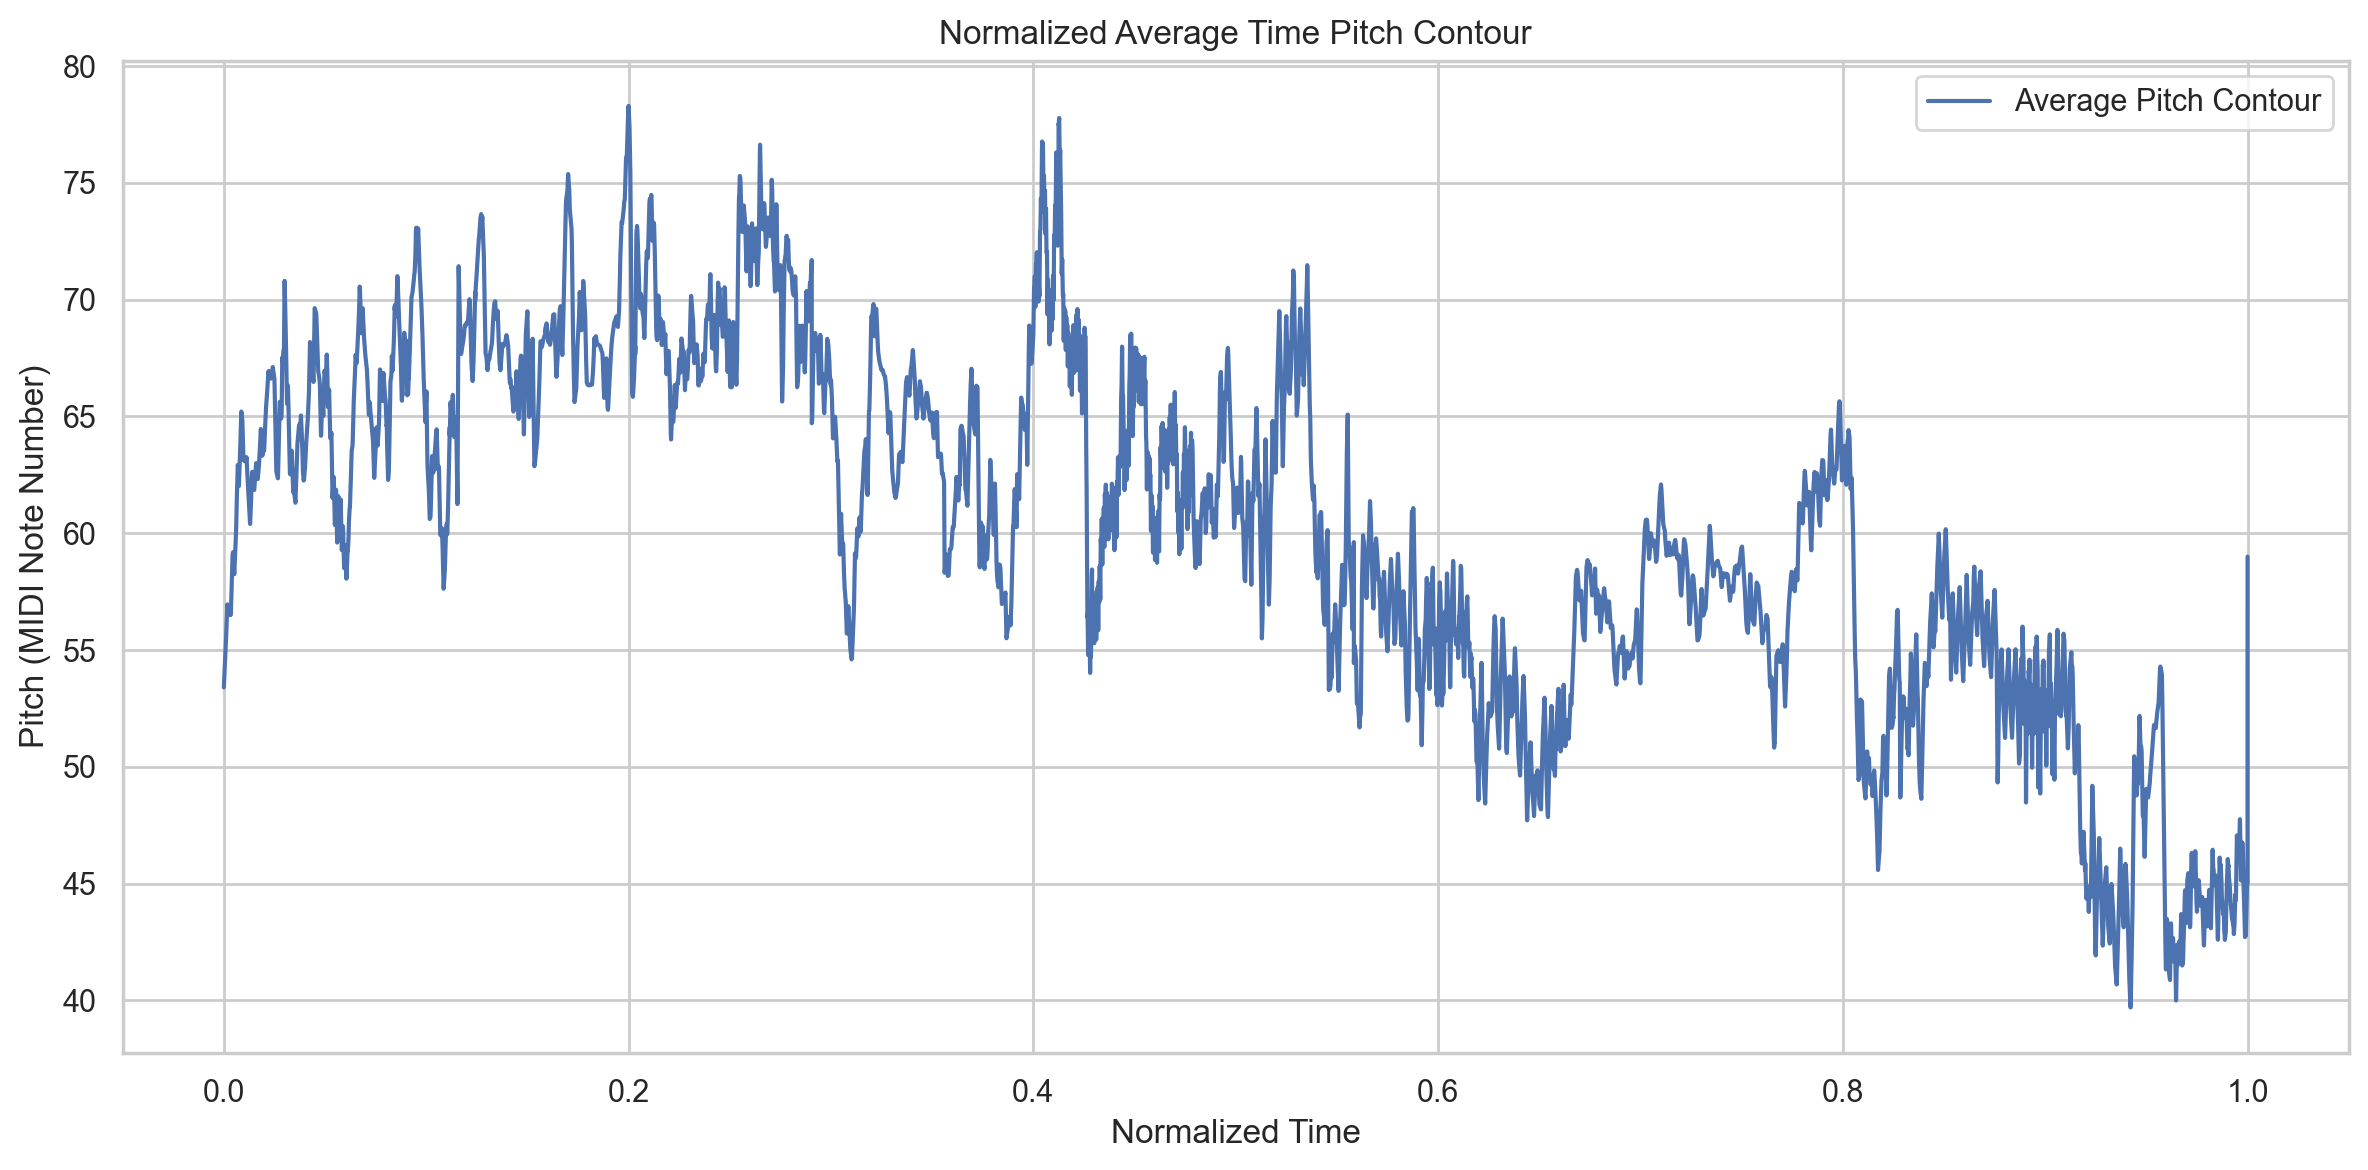

In [22]:
# Visualize the trends for all periods, seems it's not obvious now
plot_average_pitch_contours(merged_music_data)

In [23]:
entropy, average_entropy = calculate_entropy(merged_music_data)
print(entropy)

[5.312316589099355, 5.709862310293095, 5.92592138262951, 5.64704708945013, 5.917682724322367]


In [24]:
# T-Test for the period
t_test_results = perform_t_test(merged_music_data)
for key, value in t_test_results.items():
    print(key, value)

('Baroque', 'Classical') {'t-statistic': -54.02664650613127, 'p-value': 0.0}
('Baroque', 'Romantic') {'t-statistic': -51.09446993725708, 'p-value': 0.0}
('Baroque', 'Impressionist') {'t-statistic': -16.2898550169612, 'p-value': 6.925895918305678e-56}
('Baroque', 'Modern') {'t-statistic': -7.722661916603179, 'p-value': 1.2405500925465654e-14}
('Classical', 'Romantic') {'t-statistic': -1.59858986831734, 'p-value': 0.10991394454612025}
('Classical', 'Impressionist') {'t-statistic': -2.8872605809899894, 'p-value': 0.0039335541358369915}
('Classical', 'Modern') {'t-statistic': 16.998399559445044, 'p-value': 8.366108083950302e-64}
('Romantic', 'Impressionist') {'t-statistic': -2.5336117436722647, 'p-value': 0.011373611095996272}
('Romantic', 'Modern') {'t-statistic': 17.300521618252183, 'p-value': 4.5988708833962233e-66}
('Impressionist', 'Modern') {'t-statistic': 10.79707740496241, 'p-value': 1.2043147803856659e-26}


### The table based on the test results

| Group 1        | Group 2        | t-statistic       | p-value           |
|----------------|----------------|-------------------|-------------------|
| Baroque        | Classical      | -53.821604        | 0.0               |
| Baroque        | Romantic       | -50.674402        | 0.0               |
| Baroque        | Impressionist  | -9.526888         | 6.06e-21          |
| Baroque        | Modern         | -8.250351         | 1.77e-16          |
| Classical      | Romantic       | -1.427682         | **0.153**         |
| Classical      | Impressionist  | 3.386300          | 0.000727          |
| Classical      | Modern         | 16.212631         | 2.79e-58          |
| Romantic       | Impressionist  | 3.659086          | 0.000262          |
| Romantic       | Modern         | 16.457593         | 4.89e-60          |
| Impressionist  | Modern         | 4.589199          | 4.70e-06          |

### T-Statistic Matrix

|               | Baroque     | Classical  | Impressionist | Modern     | Romantic   |
|---------------|-------------|------------|---------------|------------|------------|
| **Baroque**       | 0.00        | -53.82     | -9.53         | -8.25      | -50.67     |
| **Classical**     | -53.82      | 0.00       | 3.39          | 16.21      | -1.43      |
| **Impressionist** | -9.53       | 3.39       | 0.00          | 4.59       | 3.66       |
| **Modern**        | -8.25       | 16.21      | 4.59          | 0.00       | 16.46      |
| **Romantic**      | -50.67      | -1.43      | 3.66          | 16.46      | 0.00       |

### P-Value Matrix

|               | Baroque     | Classical   | Impressionist | Modern        | Romantic     |
|---------------|-------------|-------------|---------------|---------------|--------------|
| **Baroque**       | 1.00        | 0.00        | 6.06e-21      | 1.77e-16      | 0.00         |
| **Classical**     | 0.00        | 1.00        | 7.27e-04      | 2.79e-58      | 1.53e-01     |
| **Impressionist** | 6.06e-21    | 7.27e-04    | 1.00          | 4.70e-06      | 2.62e-04     |
| **Modern**        | 1.77e-16    | 2.79e-58    | 4.70e-06      | 1.00          | 4.89e-60     |
| **Romantic**      | 0.00        | 1.53e-01    | 2.62e-04      | 4.89e-60      | 1.00         |